In [15]:
import os
import pandas as pd
## Import relevant libraries
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../../py_files/')
import quadrop as qd

# import gaussian filter
from scipy.ndimage import gaussian_filter1d
# qd.set_plotting_style()

This notebook starts by concatenating all the merged_expression_PIV.csv files
from the different experiments. These files combine expression data with PIV
data.


In [16]:
def concatenate_merged_expression_piv(data_paths, output_save_folder=None):
    """
    Concatenate the merged_expression_PIV.csv files from multiple data paths into one file.

    Parameters:
    - data_paths: List of paths where the merged_expression_PIV.csv files are located.
    - output_folder: Folder where the merged_expression_PIV.csv files are stored.
    - merged_file_name: Name of the merged expression PIV file to read.
    - output_file_name: Name of the output concatenated file to save.
    - output_save_folder: Folder where the concatenated file will be saved. If None, save in the first data path's output folder.
    
    The concatenated file will be saved in the specified `output_save_folder`, or the first path in `data_paths` if not provided.
    """
    
    output_folder="output_data"
    merged_file_name="merged_expression_PIV.csv"
    output_file_name="merged_expression_PIV.csv"
    
    # List to store DataFrames from each path
    dataframes = []

    # Loop over each data path
    for path in data_paths:
        merged_file_path = os.path.join(path, output_folder, merged_file_name)
        
        # Check if the merged file exists
        if os.path.exists(merged_file_path):
            # Read the merged_expression_PIV.csv file
            df = pd.read_csv(merged_file_path)
            dataframes.append(df)
            print(f"Loaded data from: {merged_file_path}")
        else:
            print(f"File not found: {merged_file_path}")

    if not dataframes:
        print("No valid files found to concatenate.")
        return

    # Concatenate all DataFrames
    concatenated_df = pd.concat(dataframes, ignore_index=True)

    # Determine the output directory
    if output_save_folder is None:
        output_save_folder = os.path.join(data_paths[0], output_folder)
    
    os.makedirs(output_save_folder, exist_ok=True)  # Ensure the output directory exists
    
    # Save the concatenated DataFrame to the output directory
    output_file_path = os.path.join(output_save_folder, output_folder, output_file_name)
    concatenated_df.to_csv(output_file_path, index=False)

    conditions = list(concatenated_df['condition'].unique())
    columns = list(concatenated_df.columns)

    print(f"Concatenated DataFrame saved to: {output_file_path}")

    return conditions, columns
    


k401 = "../../../../Thomson Lab Dropbox/David Larios/activedrops/main/101324-k401-titration-rt/2p5TMB-1ulDNA_/"
kif3 = "../../../../Thomson Lab Dropbox/David Larios/activedrops/main/100624-kif3-titration-RT/2p5ulTMB-1ulDNAXnM_/"
chimeraD = "../../../../Thomson Lab Dropbox/David Larios/activedrops/main/110324-D_titration-RT/2p5TMB-1ulDNA_1/"
chimerasCEG = "../../../../Thomson Lab Dropbox/David Larios/activedrops/main/111624-C-E-G-RT/2p5ulTMB-0p5MT-1ulDNA_/"

output_save_folder = "../../../../Thomson Lab Dropbox/David Larios/activedrops/main/all/"

# Example usage of the function:
conditions, columns = concatenate_merged_expression_piv(
    data_paths=[k401, kif3, chimeraD, chimerasCEG],
    output_save_folder = output_save_folder
)


Loaded data from: ../../../../Thomson Lab Dropbox/David Larios/activedrops/main/101324-k401-titration-rt/2p5TMB-1ulDNA_/output_data/merged_expression_PIV.csv
Loaded data from: ../../../../Thomson Lab Dropbox/David Larios/activedrops/main/100624-kif3-titration-RT/2p5ulTMB-1ulDNAXnM_/output_data/merged_expression_PIV.csv
Loaded data from: ../../../../Thomson Lab Dropbox/David Larios/activedrops/main/110324-D_titration-RT/2p5TMB-1ulDNA_1/output_data/merged_expression_PIV.csv
Loaded data from: ../../../../Thomson Lab Dropbox/David Larios/activedrops/main/111624-C-E-G-RT/2p5ulTMB-0p5MT-1ulDNA_/output_data/merged_expression_PIV.csv
Concatenated DataFrame saved to: ../../../../Thomson Lab Dropbox/David Larios/activedrops/main/all/output_data/merged_expression_PIV.csv


Now let's load the dataframe and make corrections.

In [17]:
output_save_folder = "../../../../Thomson Lab Dropbox/David Larios/activedrops/main/all/"

df = pd.read_csv(output_save_folder + "output_data/merged_expression_PIV.csv")
df.columns

Index(['condition', 'subcondition', 'time (s)', 'Time_min', 'Time_h',
       'Mean Intensity', 'Protein Concentration_ng_ul',
       'Protein Concentration_nM', 'Number of Protein Molecules',
       'Rate of Change of Protein Molecules per Second',
       'Translation Rate aa_s', 'Unnamed: 0', 'frame', 'x [m]_mean',
       'y [m]_mean', 'u [m/s]_mean', 'v [m/s]_mean', 'data type [-]_mean',
       'vorticity [1/s]_mean', 'velocity magnitude [m/s]_mean',
       'divergence [1/s]_mean', 'dcev [1]_mean', 'shear [1/s]_mean',
       'strain [1/s]_mean', 'vector direction [degrees]_mean',
       'correlation length [m]_mean', 'distance [m]_mean', 'power [W]_mean',
       'work [J]_mean', 'time (min)', 'time (h)'],
      dtype='object')

In [18]:
df['condition'].unique()

array(['K401_0p625nM-RT', 'K401_1p25nM-RT', 'K401_2p5nM-RT',
       'K401_5nM-RT', 'K401_10nM-RT', 'K401_20nM-RT', 'K401_40nM-RT',
       'K401_80nM-RT', 'K401_160nM-RT', 'negative', 'Kif3_0p625nM_1-RT',
       'Kif3_0p625nM_2-RT', 'Kif3_1p25nM_1-RT', 'Kif3_1p25nM_2-RT',
       'Kif3_2p5nM_1-RT', 'Kif3_2p5nM_2-RT', 'Kif3_5nM_1-RT',
       'Kif3_5nM_2-RT', 'Kif3_10nM_1-RT', 'Kif3_10nM_2-RT',
       'Kif3_20nM_1-RT', 'Kif3_20nM_2-RT', 'Kif3_40nM_1-RT',
       'Kif3_40nM_2-RT', 'Kif3_80nM_1-RT', 'Kif3_80nM_2-RT',
       'Kif3_160nM_1-RT', 'Kif3_160nM_2-RT', 'D_160nM', 'D_80nM',
       'D_40nM', 'D_20nM', 'D_10nM', 'D_5nM', 'D_2p5nM', 'D_1p25nM',
       'D_0p625nM', 'D_0p312nM', 'D_0p156nM', 'C_1p25nM', 'C_2p5nM',
       'C_5nM', 'C_10nM', 'C_20nM', 'C_40nM', 'C_80nM', 'C_160nM',
       'E_1p25nM', 'E_2p5nM', 'E_5nM', 'E_10nM', 'E_20nM', 'E_40nM',
       'E_80nM', 'E_160nM', 'G_1p25nM', 'G_2p5nM', 'G_5nM', 'G_10nM',
       'G_20nM', 'G_40nM', 'G_80nM', 'G_160nM'], dtype=object)

In [19]:
# Split condition column and extract components
df['protein'] = df['condition'].str.split('_').str[0]

# Replace protein names
df['protein'] = df['protein'].replace({'K401': 'A', 'Kif3': 'H'})

# Extract DNA concentration, removing -RT and handling different formats
df['DNA nM'] = df['condition'].str.split('_').str[1].str.replace('-RT', '').str.replace('p', '.').str.replace('nM', '')

# Eliminate Rep2 data
df = df[~df['condition'].str.contains('_2-RT')]
df

condition subcondition  time (s)  Time_min     Time_h  \
0       K401_0p625nM-RT         Rep1         0      0.00   0.000000   
1       K401_0p625nM-RT         Rep1        60      1.00   0.016667   
2       K401_0p625nM-RT         Rep1       120      2.00   0.033333   
3       K401_0p625nM-RT         Rep1       180      3.00   0.050000   
4       K401_0p625nM-RT         Rep1       240      4.00   0.066667   
...                 ...          ...       ...       ...        ...   
128080         negative         Rep1    111000   1850.00  30.833333   
128081         negative         Rep1    111075   1851.25  30.854167   
128082         negative         Rep1    111150   1852.50  30.875000   
128083         negative         Rep1    111225   1853.75  30.895833   
128084         negative         Rep1    111300   1855.00  30.916667   

        Mean Intensity  Protein Concentration_ng_ul  Protein Concentration_nM  \
0            10.795248                     1.376854                 30.630794   
1            10.763086                     1.372752                 30.539536   
2            10.526032                     1.342518                 29.866912   
3            10.755514                     1.371786                 30.518051   
4            10.683785                     1.362638                 30.314526   
...                ...                          ...                       ...   
128080        0.000000                     0.000000                  0.000000   
128081        0.000000                     0.000000                  0.000000   
128082        0.000000                     0.000000                  0.000000   
128083        0.000000                     0.000000                  0.000000   
128084        0.000000                     0.000000                  0.000000   

        Number of Protein Molecules  \
0                      3.675695e+10   
1                      3.664744e+10   
2                      3.584029e+10   
3                      3.662166e+10   
4                      3.637743e+10   
...                             ...   
128080                 0.000000e+00   
128081                 0.000000e+00   
128082                 0.000000e+00   
128083                 0.000000e+00   
128084                 0.000000e+00   

        Rate of Change of Protein Molecules per Second  ...  \
0                                                  NaN  ...   
1                                                  NaN  ...   
2                                                  NaN  ...   
3                                                  NaN  ...   
4                                                  NaN  ...   
...                                                ...  ...   
128080                                             0.0  ...   
128081                                             0.0  ...   
128082                                             0.0  ...   
128083                                             0.0  ...   
128084                                             0.0  ...   

        strain [1/s]_mean  vector direction [degrees]_mean  \
0                     NaN                              NaN   
1                     NaN                              NaN   
2                     NaN                              NaN   
3                     NaN                              NaN   
4                     NaN                              NaN   
...                   ...                              ...   
128080                NaN                              NaN   
128081                NaN                              NaN   
128082                NaN                              NaN   
128083                NaN                              NaN   
128084                NaN                              NaN   

        correlation length [m]_mean  distance [m]_mean  power [W]_mean  \
0                               NaN                NaN             NaN   
1                               NaN                NaN             Na

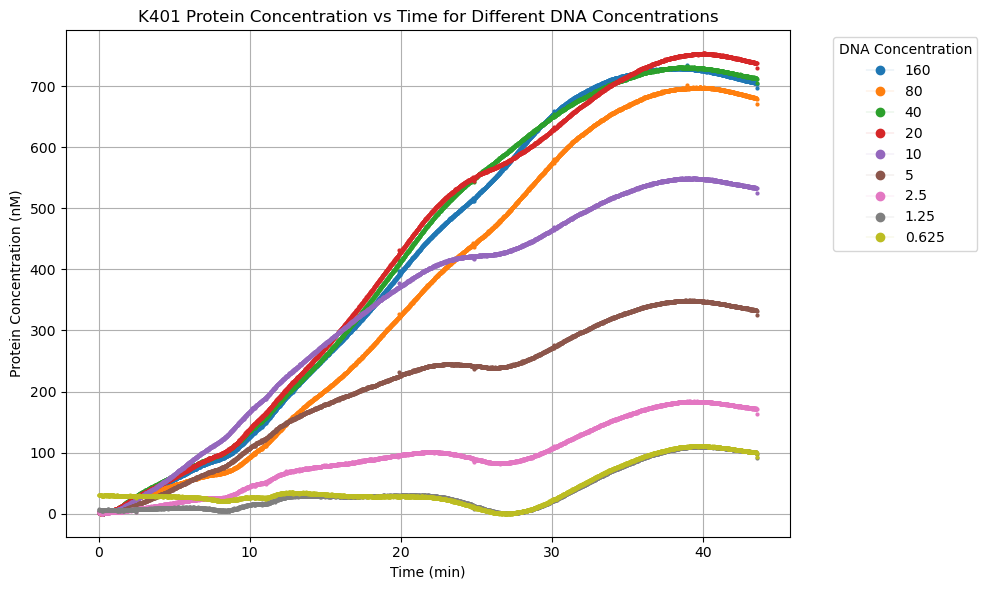

In [20]:
# Filter for K401 (protein A) data
k401_data = df[df['protein'] == 'A']

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each DNA concentration in ascending order
for dna_conc in sorted(k401_data['DNA nM'].unique(), key=float, reverse=True):  # Convert to float for proper numerical sorting
    subset = k401_data[k401_data['DNA nM'] == dna_conc]
    plt.plot(subset['Time_h'], subset['Protein Concentration_nM'], 
             label=f'{dna_conc}', marker='o', markersize=2, linewidth=0.1)

plt.xlabel('Time (min)')
plt.ylabel('Protein Concentration (nM)')
plt.title('K401 Protein Concentration vs Time for Different DNA Concentrations')
plt.legend(title='DNA Concentration', bbox_to_anchor=(1.05, 1), loc='upper left', 
          markerscale=3)  # Increase marker size in legend only
plt.grid(True)
plt.tight_layout() 
plt.show()


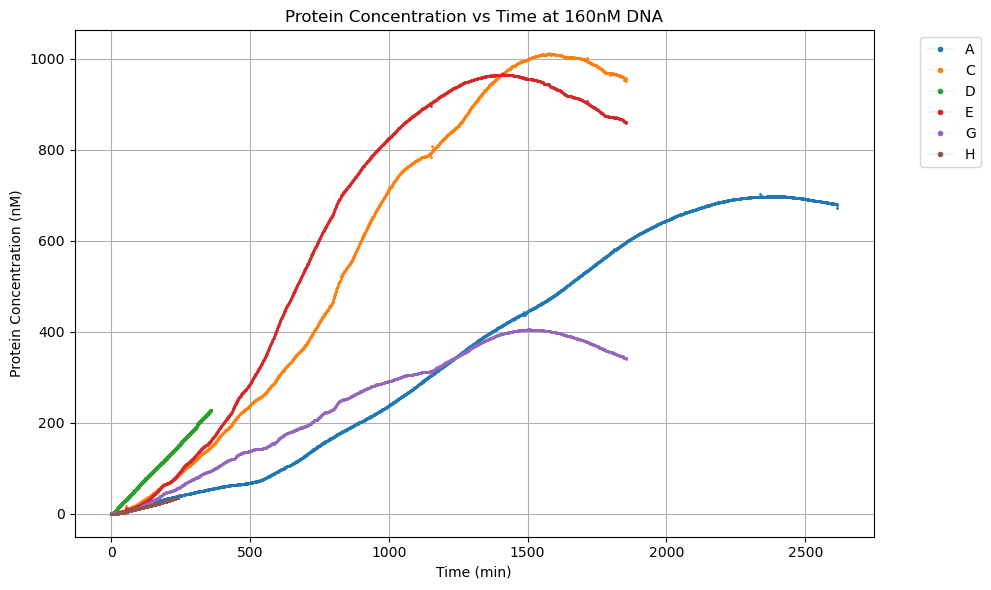

In [21]:
# Filter for 160nM DNA concentration data
high_conc_data = df[df['DNA nM'] == '80']

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each protein type
for protein in sorted(high_conc_data['protein'].unique()):
    subset = high_conc_data[high_conc_data['protein'] == protein]
    plt.plot(subset['Time_min'], subset['Protein Concentration_nM'],
             label=f'{protein}', marker='o', markersize=1, linewidth=0.1)

plt.xlabel('Time (min)')
plt.ylabel('Protein Concentration (nM)')
plt.title('Protein Concentration vs Time at 160nM DNA')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=3)
plt.grid(True)
plt.tight_layout()
plt.show()


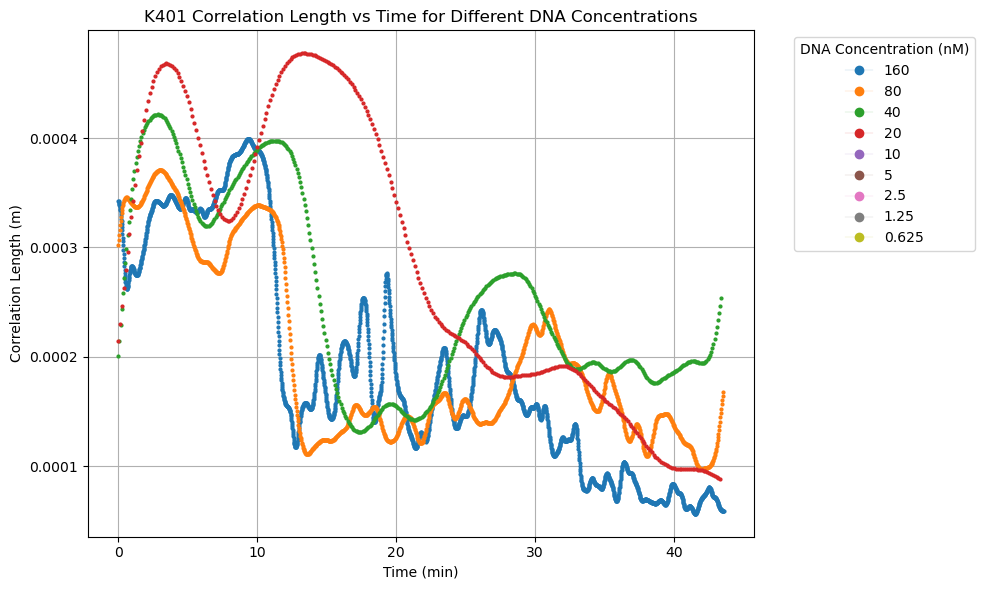

In [22]:
# Filter for K401 (protein A) data
k401_data = df[df['protein'] == 'A']

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each DNA concentration in ascending order
for dna_conc in sorted(k401_data['DNA nM'].unique(), key=float, reverse=True):  # Convert to float for proper numerical sorting
    subset = k401_data[k401_data['DNA nM'] == dna_conc]
    plt.plot(subset['Time_h'], subset['correlation length [m]_mean'], 
             label=f'{dna_conc}', marker='o', markersize=2, linewidth=0.1)

plt.xlabel('Time (min)')
plt.ylabel('Correlation Length (m)')
plt.title('K401 Correlation Length vs Time for Different DNA Concentrations')
plt.legend(title='DNA Concentration (nM)', bbox_to_anchor=(1.05, 1), loc='upper left', 
          markerscale=3)  # Increase marker size in legend only
plt.grid(True)
plt.tight_layout()
plt.show()


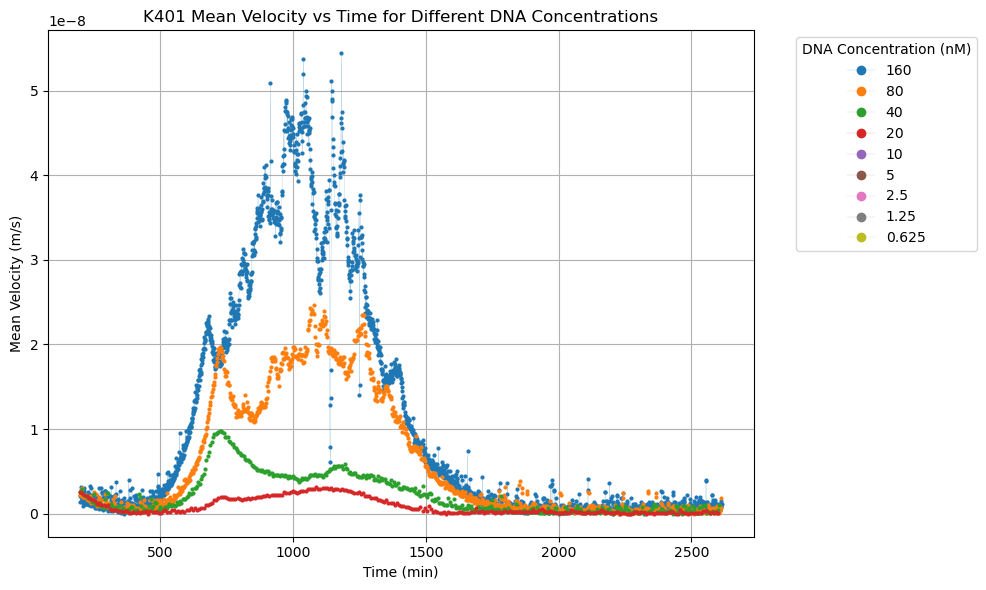

In [23]:
# Filter for K401 (protein A) data
k401_data = df[df['protein'] == 'A']

# Filter for time >= 200 minutes
k401_data = k401_data[k401_data['Time_min'] >= 200]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each DNA concentration in ascending order
for dna_conc in sorted(k401_data['DNA nM'].unique(), key=float, reverse=True):
    subset = k401_data[k401_data['DNA nM'] == dna_conc]
    plt.plot(subset['Time_min'], subset['velocity magnitude [m/s]_mean'],
             label=f'{dna_conc}', marker='o', markersize=2, linewidth=0.1)

plt.xlabel('Time (min)')
plt.ylabel('Mean Velocity (m/s)')
plt.title('K401 Mean Velocity vs Time for Different DNA Concentrations')
plt.legend(title='DNA Concentration (nM)', bbox_to_anchor=(1.05, 1), loc='upper left',
          markerscale=3)  # Increase marker size in legend only
plt.grid(True)
plt.tight_layout()
plt.show()


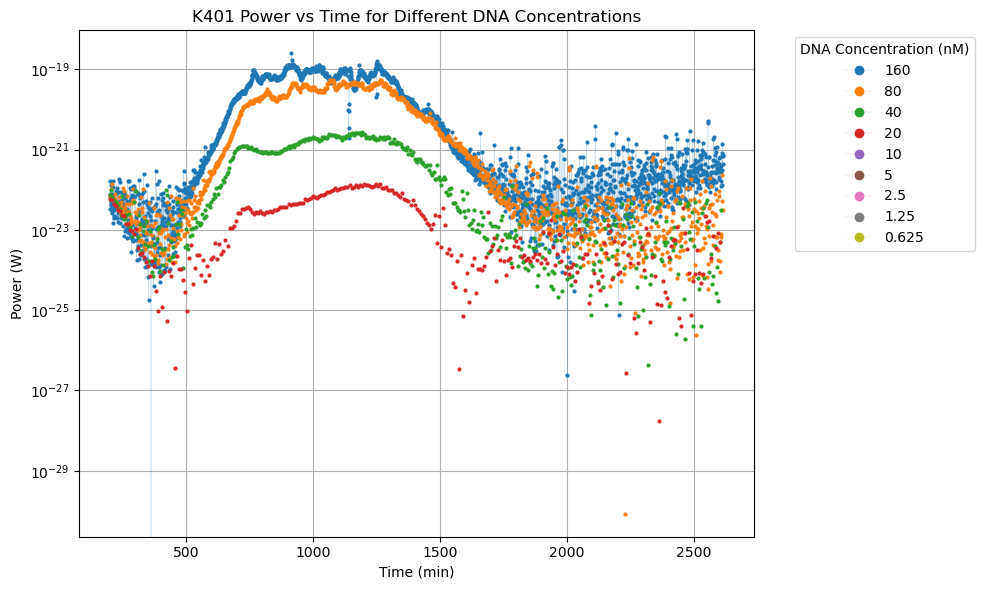

In [24]:
# Filter for K401 (protein A) data
k401_data = df[df['protein'] == 'A']

# Filter for time >= 200 minutes
k401_data = k401_data[k401_data['Time_min'] >= 200]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each DNA concentration in ascending order
for dna_conc in sorted(k401_data['DNA nM'].unique(), key=float, reverse=True):
    subset = k401_data[k401_data['DNA nM'] == dna_conc]
    plt.plot(subset['Time_min'], subset['power [W]_mean'],
             label=f'{dna_conc}', marker='o', markersize=2, linewidth=0.1)

plt.xlabel('Time (min)')
plt.ylabel('Power (W)')
plt.yscale('log')  # Set y-axis to log scale
plt.title('K401 Power vs Time for Different DNA Concentrations')
plt.legend(title='DNA Concentration (nM)', bbox_to_anchor=(1.05, 1), loc='upper left',
          markerscale=3)  # Increase marker size in legend only
plt.grid(True)
plt.tight_layout()
plt.show()


Unique DNA concentrations in K401 data: ['0.625' '1.25' '2.5' '5' '10' '20' '40' '80' '160']
Unique DNA concentrations in Kif3 Rep1 data: ['0.625' '1.25' '2.5' '5' '10' '20' '40' '80' '160']


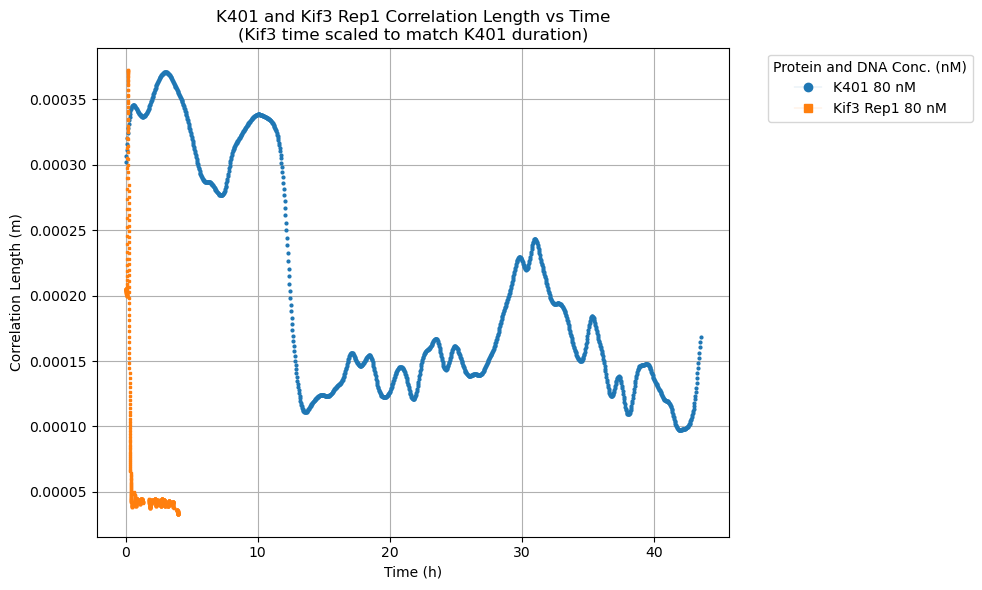

In [25]:
# Filter for K401 (protein A) data and Kif3 Rep1 data
k401_data = df[df['protein'] == 'A']
kif3_rep1_data = df[df['condition'].str.contains('Kif3.*_1-RT', regex=True, na=False)]

# Get max time for K401 data to use as reference
k401_max_time = k401_data['Time_h'].max()
kif3_max_time = kif3_rep1_data['Time_h'].max()
time_scale_factor = 1#k401_max_time / kif3_max_time

# Check unique values in 'DNA nM' to ensure correct filtering
print("Unique DNA concentrations in K401 data:", k401_data['DNA nM'].unique())
print("Unique DNA concentrations in Kif3 Rep1 data:", kif3_rep1_data['DNA nM'].unique())

# Create the plot
plt.figure(figsize=(10, 6))

# Plot K401 data for 80 nM DNA concentration
k401_80nm_data = k401_data[k401_data['DNA nM'] == '80']
if not k401_80nm_data.empty:
    plt.plot(k401_80nm_data['Time_h'], k401_80nm_data['correlation length [m]_mean'], 
             label='K401 80 nM', marker='o', markersize=2, linewidth=0.1)
else:
    print("No data found for K401 with 80 nM DNA concentration.")

# Plot Kif3 Rep1 data for 80 nM DNA concentration with scaled time
kif3_80nm_data = kif3_rep1_data[kif3_rep1_data['DNA nM'] == '80']
if not kif3_80nm_data.empty:
    scaled_time = kif3_80nm_data['Time_h'] * time_scale_factor
    plt.plot(scaled_time, kif3_80nm_data['correlation length [m]_mean'],
             label='Kif3 Rep1 80 nM', marker='s', markersize=2, linewidth=0.1)
else:
    print("No data found for Kif3 Rep1 with 80 nM DNA concentration.")

plt.xlabel('Time (h)')
plt.ylabel('Correlation Length (m)')
plt.title('K401 and Kif3 Rep1 Correlation Length vs Time\n(Kif3 time scaled to match K401 duration)')
plt.legend(title='Protein and DNA Conc. (nM)', bbox_to_anchor=(1.05, 1), loc='upper left',
          markerscale=3)  # Increase marker size in legend only
plt.grid(True)
plt.tight_layout()
plt.show()

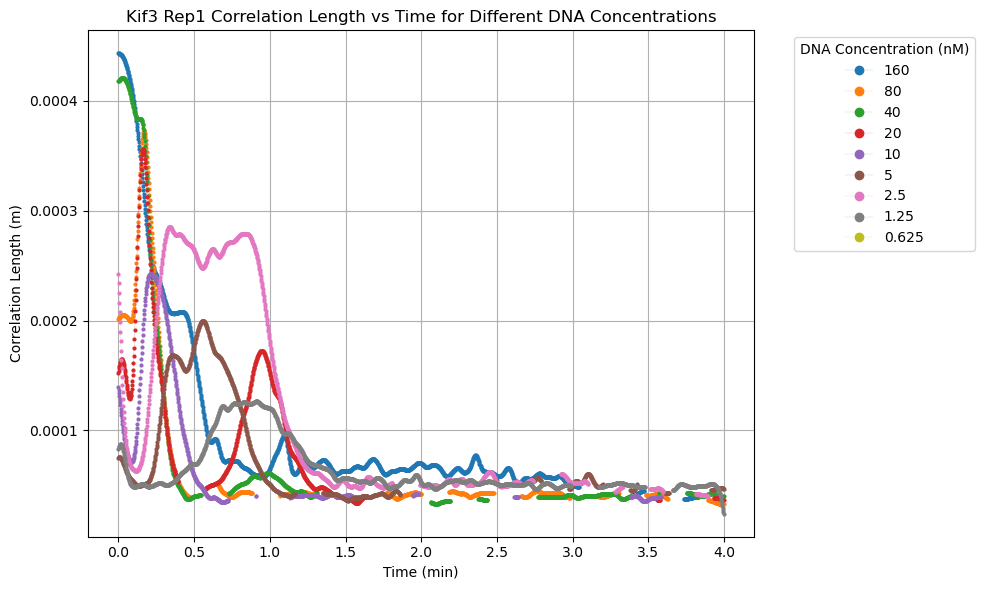

In [26]:
# Filter for Kif3 Rep1 data
kif3_data = df[df['condition'].str.contains('Kif3') & df['condition'].str.contains('_1-RT')]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each DNA concentration in ascending order
for dna_conc in sorted(kif3_data['DNA nM'].unique(), key=float, reverse=True):  # Convert to float for proper numerical sorting
    subset = kif3_data[kif3_data['DNA nM'] == dna_conc]
    plt.plot(subset['Time_h'], subset['correlation length [m]_mean'], 
             label=f'{dna_conc}', marker='o', markersize=2, linewidth=0.1)

plt.xlabel('Time (min)')
plt.ylabel('Correlation Length (m)')
plt.title('Kif3 Rep1 Correlation Length vs Time for Different DNA Concentrations')
plt.legend(title='DNA Concentration (nM)', bbox_to_anchor=(1.05, 1), loc='upper left', 
          markerscale=3)  # Increase marker size in legend only
plt.grid(True)
plt.tight_layout()
plt.show()


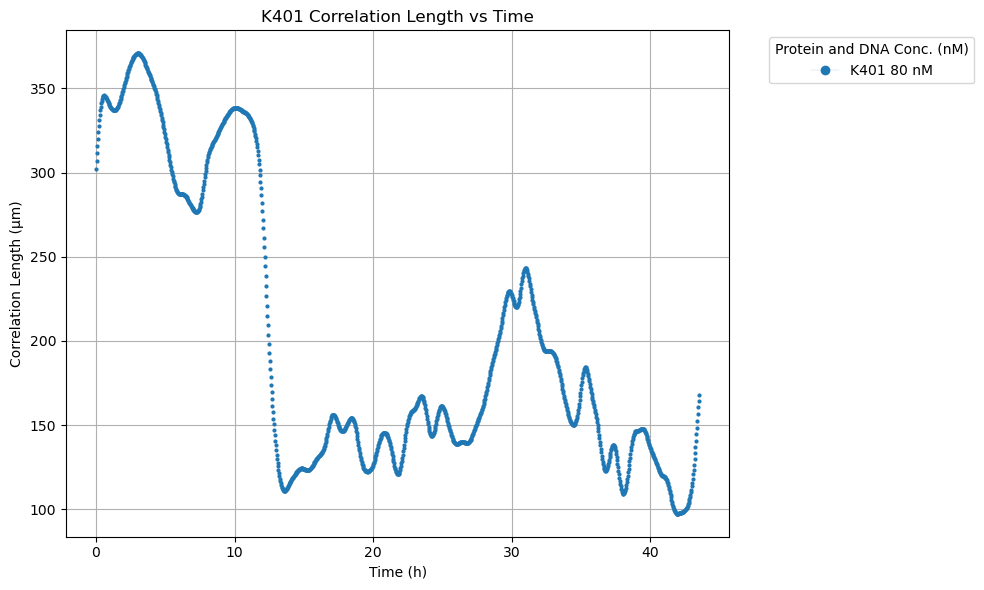

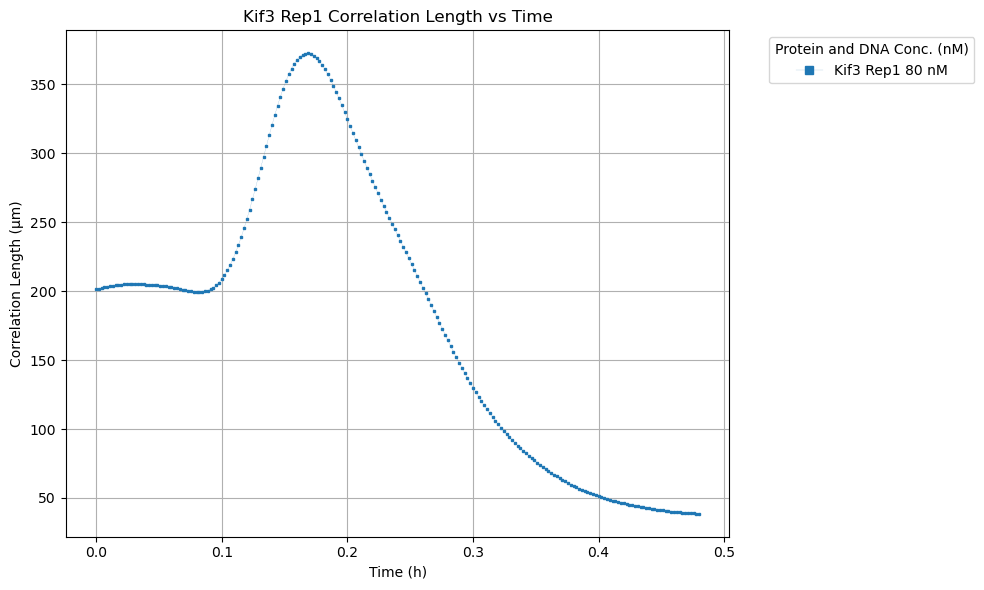

In [27]:
# Filter for K401 (protein A) data and Kif3 Rep1 data
k401_data = df[df['protein'] == 'A']
kif3_rep1_data = df[df['condition'].str.contains('Kif3.*_1-RT', regex=True, na=False)]

# Create plot for K401
plt.figure(figsize=(10, 6))

# Plot K401 data for 80 nM DNA concentration
k401_80nm_data = k401_data[k401_data['DNA nM'] == '80']
if not k401_80nm_data.empty:
    plt.plot(k401_80nm_data['Time_h'], k401_80nm_data['correlation length [m]_mean'] * 1e6, 
             label='K401 80 nM', marker='o', markersize=2, linewidth=0.1)
else:
    print("No data found for K401 with 80 nM DNA concentration.")

plt.xlabel('Time (h)')
plt.ylabel('Correlation Length (µm)')
plt.title('K401 Correlation Length vs Time')
plt.legend(title='Protein and DNA Conc. (nM)', bbox_to_anchor=(1.05, 1), loc='upper left',
          markerscale=3)  # Increase marker size in legend only
plt.grid(True)
plt.tight_layout()
plt.show()

# Create plot for Kif3
plt.figure(figsize=(10, 6))

# Plot Kif3 Rep1 data for 80 nM DNA concentration, limited to 0.5 hours
kif3_80nm_data = kif3_rep1_data[kif3_rep1_data['DNA nM'] == '80']
if not kif3_80nm_data.empty:
    # Filter data up to 0.5 hours
    kif3_80nm_data = kif3_80nm_data[kif3_80nm_data['Time_h'] <= 0.5]
    plt.plot(kif3_80nm_data['Time_h'], kif3_80nm_data['correlation length [m]_mean'] * 1e6,
             label='Kif3 Rep1 80 nM', marker='s', markersize=2, linewidth=0.1)
else:
    print("No data found for Kif3 Rep1 with 80 nM DNA concentration.")

plt.xlabel('Time (h)')
plt.ylabel('Correlation Length (µm)')
plt.title('Kif3 Rep1 Correlation Length vs Time')
plt.legend(title='Protein and DNA Conc. (nM)', bbox_to_anchor=(1.05, 1), loc='upper left',
          markerscale=3)  # Increase marker size in legend only
plt.grid(True)
plt.tight_layout()
plt.show()

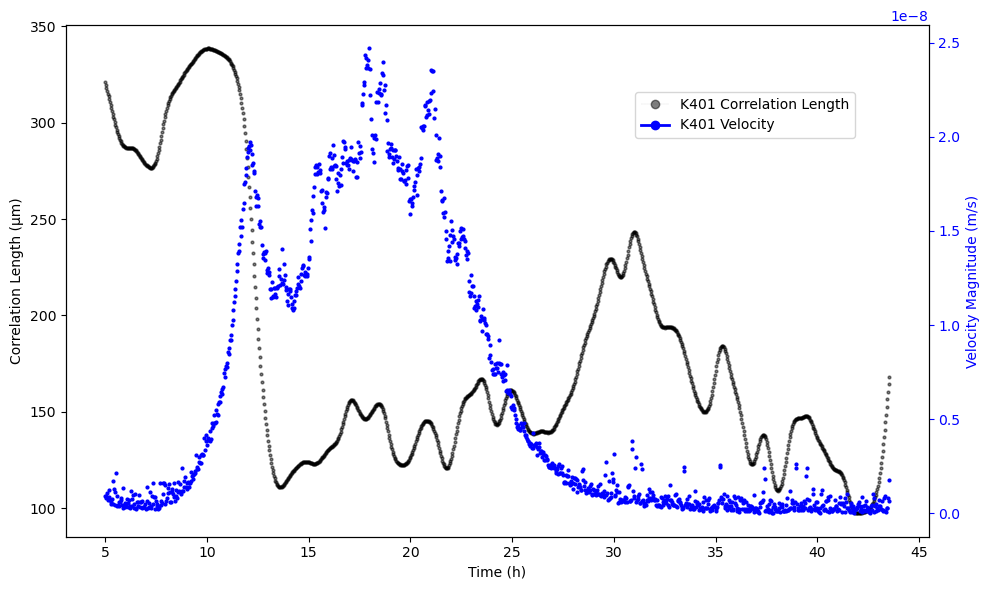

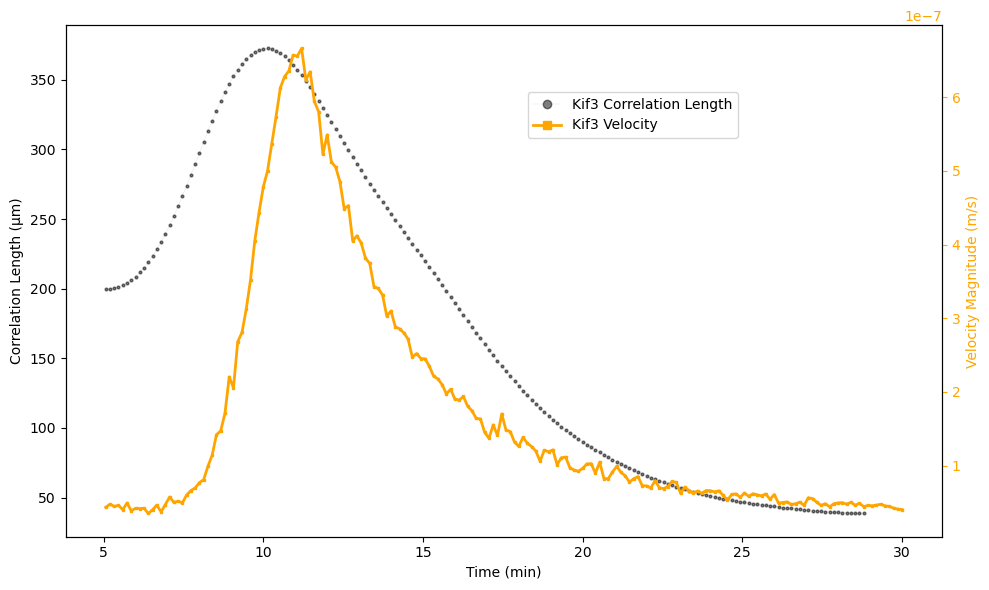

In [28]:
# Filter for K401 (protein A) data and Kif3 Rep1 data
k401_data = df[df['protein'] == 'A']
kif3_rep1_data = df[df['condition'].str.contains('Kif3.*_1-RT', regex=True, na=False)]

# Create plot for K401
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot K401 data for 80 nM DNA concentration, starting from hour 5
k401_80nm_data = k401_data[(k401_data['DNA nM'] == '80') & (k401_data['Time_h'] >= 5)]
if not k401_80nm_data.empty:
    ax1.plot(k401_80nm_data['Time_h'], k401_80nm_data['correlation length [m]_mean'] * 1e6, 
             label='K401 Correlation Length', color='black', linestyle='--', marker='o', markersize=2, linewidth=0.1, alpha=0.5)
else:
    print("No data found for K401 with 80 nM DNA concentration starting from hour 5.")

ax1.set_xlabel('Time (h)', color='black')
ax1.set_ylabel('Correlation Length (µm)', color='black')
ax1.tick_params(axis='y', colors='black')

# Add velocity magnitude data on the right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Velocity Magnitude (m/s)', color='blue')
ax2.tick_params(axis='y', colors='blue')  # Ensure all elements on the right y-axis are blue
if not k401_80nm_data.empty:
    ax2.plot(k401_80nm_data['Time_h'], k401_80nm_data['velocity magnitude [m/s]_mean'], 
             label='K401 Velocity', color='blue', marker='o', markersize=2, linewidth=2)

fig.legend(loc='upper center', bbox_to_anchor=(0.75, 0.85), markerscale=3)
plt.tight_layout()
plt.savefig('../../../../Downloads/timevsVelocityCorrelationK401.svg', format='svg')
plt.show()

# Create plot for Kif3
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Kif3 Rep1 data for 80 nM DNA concentration, starting from minute 5 and limited to 0.5 hours
kif3_80nm_data = kif3_rep1_data[(kif3_rep1_data['DNA nM'] == '80') & (kif3_rep1_data['Time_h'] * 60 >= 5)]
if not kif3_80nm_data.empty:
    # Filter data up to 0.5 hours
    kif3_80nm_data = kif3_80nm_data[kif3_80nm_data['Time_h'] <= 0.5]
    ax1.plot(kif3_80nm_data['Time_h'] * 60, kif3_80nm_data['correlation length [m]_mean'] * 1e6,
             label='Kif3 Correlation Length', color='black', linestyle='--', marker='o', markersize=2, linewidth=0.1, alpha=0.5)
else:
    print("No data found for Kif3 Rep1 with 80 nM DNA concentration starting from minute 5.")

ax1.set_xlabel('Time (min)', color='black')
ax1.set_ylabel('Correlation Length (µm)', color='black')
ax1.tick_params(axis='y', colors='black')

# Add velocity magnitude data on the right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Velocity Magnitude (m/s)', color='orange')
ax2.tick_params(axis='y', colors='orange')  # Ensure all elements on the right y-axis are blue
if not kif3_80nm_data.empty:
    ax2.plot(kif3_80nm_data['Time_h'] * 60, kif3_80nm_data['velocity magnitude [m/s]_mean'],
             label='Kif3 Velocity', color='orange', marker='s', markersize=2, linewidth=2)

fig.legend( bbox_to_anchor=(0.75, 0.85), markerscale=3)
plt.tight_layout()
plt.savefig('../../../../Downloads/timevsVelocityCorrelationKif3.svg', format='svg')
plt.show()

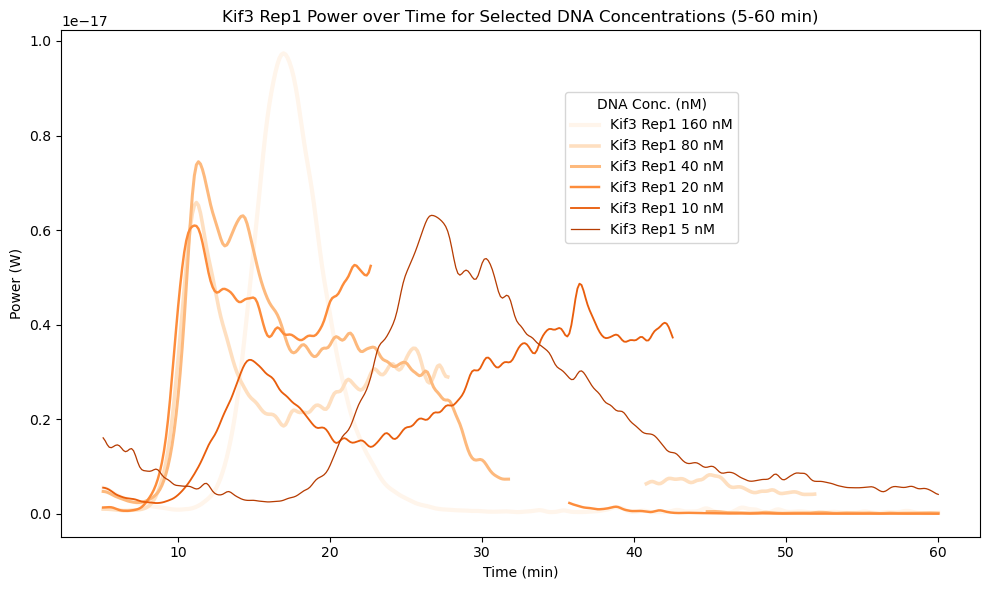

In [29]:
# Create plot for Kif3 Rep1 power over time excluding the last two DNA concentrations
fig, ax1 = plt.subplots(figsize=(10, 6))

# Define a descending gradient of line thickness and colors
line_widths = np.linspace(3, 0.5, len(kif3_rep1_data['DNA nM'].unique()) - 2)
colors = plt.cm.Oranges(np.linspace(0.001, 1, len(kif3_rep1_data['DNA nM'].unique()) - 2))

# Sort DNA concentrations numerically in descending order and exclude the last two
sorted_dna_concs = sorted(kif3_rep1_data['DNA nM'].unique(), key=lambda x: float(x), reverse=True)[:-3]

# Plot power over time for each DNA concentration, limited to 5 to 60 minutes
for i, dna_conc in enumerate(sorted_dna_concs):
    dna_data = kif3_rep1_data[(kif3_rep1_data['DNA nM'] == dna_conc) & (kif3_rep1_data['Time_h'] > 0.0833) & (kif3_rep1_data['Time_h'] <= 1)]
    if not dna_data.empty:
        # Apply Gaussian filter to smooth the power data
        smoothed_power = gaussian_filter1d(dna_data['power [W]_mean'], sigma=2)
        ax1.plot(dna_data['Time_h'] * 60, smoothed_power,
                 label=f'Kif3 Rep1 {dna_conc} nM', color=colors[i], linewidth=line_widths[i])

ax1.set_xlabel('Time (min)')
ax1.set_ylabel('Power (W)')
ax1.set_title('Kif3 Rep1 Power over Time for Selected DNA Concentrations (5-60 min)')

fig.legend(title='DNA Conc. (nM)', bbox_to_anchor=(0.75, 0.85), markerscale=3)
plt.tight_layout()
plt.savefig('../../../../Downloads/powerOverTimeKif3Rep1_5to60min.svg', format='svg')
plt.show()

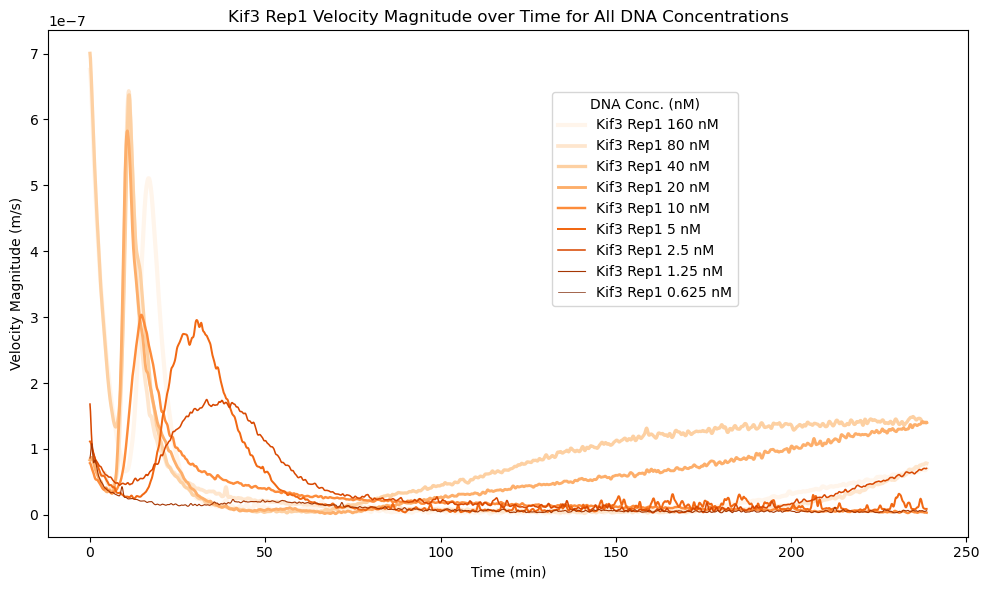

In [30]:
# Create plot for Kif3 Rep1 velocities over time for all DNA concentrations
fig, ax1 = plt.subplots(figsize=(10, 6))

# Define a gradient of line thickness and colors
line_widths = np.linspace(3, 0.5, len(kif3_rep1_data['DNA nM'].unique()))
colors = plt.cm.Oranges(np.linspace(0.001, 1, len(kif3_rep1_data['DNA nM'].unique())))

# Sort DNA concentrations numerically in descending order
sorted_dna_concs = sorted(kif3_rep1_data['DNA nM'].unique(), key=lambda x: float(x), reverse=True)

# Plot velocities over time for each DNA concentration
for i, dna_conc in enumerate(sorted_dna_concs):
    dna_data = kif3_rep1_data[kif3_rep1_data['DNA nM'] == dna_conc]
    if not dna_data.empty:
        # Apply Gaussian filter to smooth the velocity data
        smoothed_velocity = gaussian_filter1d(dna_data['velocity magnitude [m/s]_mean'], sigma=2)
        ax1.plot(dna_data['Time_h'] * 60, smoothed_velocity,
                 label=f'Kif3 Rep1 {dna_conc} nM', color=colors[i], linewidth=line_widths[i])

ax1.set_xlabel('Time (min)')
ax1.set_ylabel('Velocity Magnitude (m/s)')
ax1.set_title('Kif3 Rep1 Velocity Magnitude over Time for All DNA Concentrations')

fig.legend(title='DNA Conc. (nM)', bbox_to_anchor=(0.75, 0.85), markerscale=3)
plt.tight_layout()
plt.savefig('../../../../Downloads/velocityOverTimeKif3Rep1_allDNA.svg', format='svg')
plt.show()


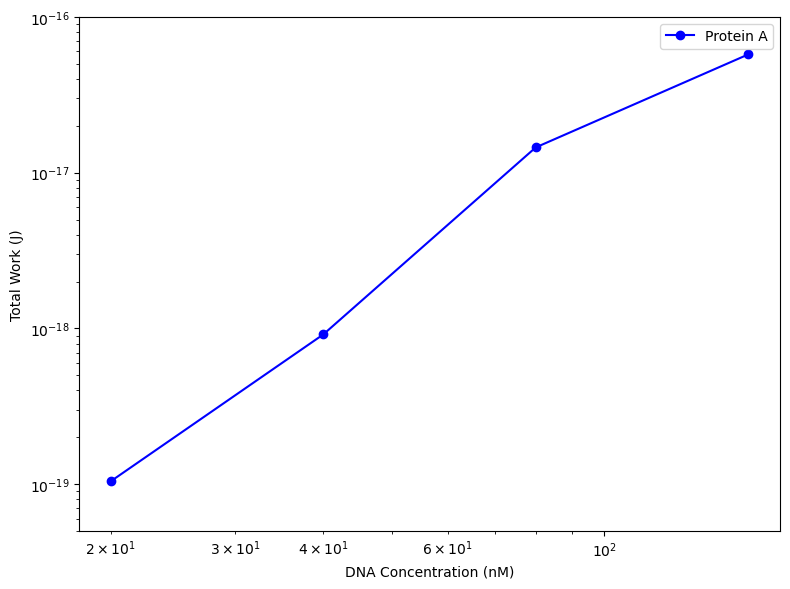

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simps

# Create plot for total work vs DNA concentration for protein A
fig, ax1 = plt.subplots(figsize=(8, 6))

# Define the color for protein A
protein_color = 'blue'

# Filter data for protein A without specifying a time range
protein_data = df[df['protein'] == 'A']

# Group by DNA concentration and take the last value of work for protein A
total_work_data = protein_data.groupby('DNA nM')['work [J]_mean'].last().reset_index()

# Convert DNA concentrations to float
total_work_data['DNA nM'] = total_work_data['DNA nM'].astype(float)

# Sort DNA concentrations numerically in ascending order
sorted_total_work_data = total_work_data.sort_values(by='DNA nM')

# Calculate work (integral of power over time)
# Assuming 'power_data' and 'time_data' are columns in your DataFrame
power_data = protein_data['power [W]_mean'].values
time_data = protein_data['time (s)'].values

# Calculate the time differences
time_diff = np.diff(time_data)

# Calculate the work using the trapezoidal rule
work = np.sum(power_data[:-1] * time_diff)

# Alternatively, using simps for numerical integration
# work = simps(power_data, time_data)

# Plot total work vs DNA concentration for protein A
ax1.plot(sorted_total_work_data['DNA nM'], sorted_total_work_data['work [J]_mean'], 
         marker='o', linestyle='-', color=protein_color, label='Protein A')

ax1.set_yscale('log')  # Set y-axis to log scale
ax1.set_xscale('log')  # Set x-axis to log scale

ax1.set_ylim(5e-20, 1e-16)  # Set y-axis limits from 10^-17 to 10^-12
ax1.set_xlabel('DNA Concentration (nM)')
ax1.set_ylabel('Total Work (J)')
ax1.legend()
plt.tight_layout()
plt.savefig('../../../../Downloads/totalWorkVsDNAConcentration_ProteinA.svg', format='svg')
plt.show()

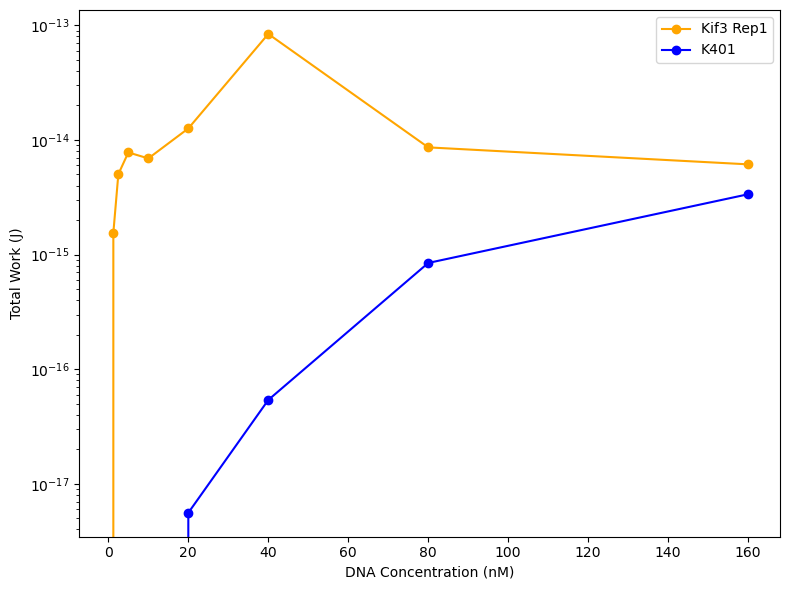

In [32]:
# Create plot for total work vs DNA concentration for Kif3 Rep1 and K401 over all data
fig, ax1 = plt.subplots(figsize=(8, 6))

# Group by DNA concentration and calculate the total work for Kif3 Rep1 by summing power over time
total_work_kif3_data = kif3_rep1_data.groupby('DNA nM').apply(
    lambda x: (x['power [W]_mean'] * (x['Time_min'].diff().fillna(0) * 60)).sum()
).reset_index(name='total_work')

# Convert DNA concentrations to float for Kif3 Rep1
total_work_kif3_data['DNA nM'] = total_work_kif3_data['DNA nM'].astype(float)

# Sort DNA concentrations numerically in ascending order for Kif3 Rep1
sorted_total_work_kif3_data = total_work_kif3_data.sort_values(by='DNA nM')

# Plot total work vs DNA concentration for Kif3 Rep1
ax1.plot(sorted_total_work_kif3_data['DNA nM'], sorted_total_work_kif3_data['total_work'], 
         marker='o', linestyle='-', color='orange', label='Kif3 Rep1')

# Group by DNA concentration and calculate the total work for K401 by summing power over time
total_work_k401_data = k401_data.groupby('DNA nM').apply(
    lambda x: (x['power [W]_mean'] * (x['Time_h'].diff().fillna(0) * 3600)).sum()
).reset_index(name='total_work')

# Convert DNA concentrations to float for K401
total_work_k401_data['DNA nM'] = total_work_k401_data['DNA nM'].astype(float)

# Sort DNA concentrations numerically in ascending order for K401
sorted_total_work_k401_data = total_work_k401_data.sort_values(by='DNA nM')

# Plot total work vs DNA concentration for K401
ax1.plot(sorted_total_work_k401_data['DNA nM'], sorted_total_work_k401_data['total_work'], 
         marker='o', linestyle='-', color='blue', label='K401')

ax1.set_yscale('log')  # Set y-axis to log scale
# ax1.set_xscale('log')  # Set x-axis to log scale

ax1.set_xlabel('DNA Concentration (nM)')
ax1.set_ylabel('Total Work (J)')

ax1.legend()
plt.tight_layout()
plt.savefig('../../../../Downloads/totalWorkVsDNAConcentrationKif3Rep1_K401_AllData.svg', format='svg')
plt.show()


Fig 3

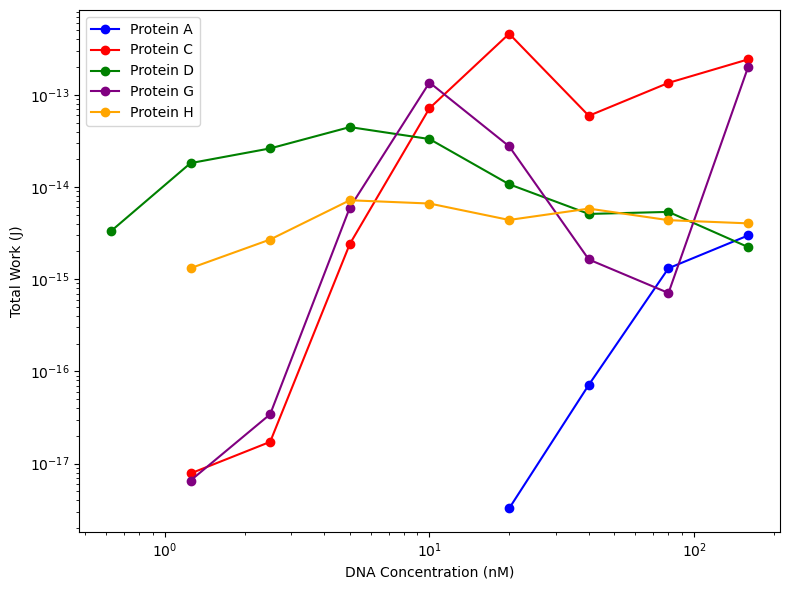

In [33]:
# Create plot for total work vs DNA concentration for proteins A, C, D, G, and H
fig, ax1 = plt.subplots(figsize=(8, 6))

# Define the proteins and their respective colors
proteins_colors = {
    'A': 'blue',
    'C': 'red',
    'D': 'green',
    'G': 'purple',
    'H': 'orange'
}

# Define the time intervals for each protein
time_intervals = {
    'D': (0, 1.5),
    'H': (0, 1.5),
    'A': (10, 30),
    'C': (1.5, 26),
    'G': (0.6, 20)
}

# Iterate over each protein to filter data, calculate total work, and plot
for protein, color in proteins_colors.items():
    start_time, end_time = time_intervals[protein]
    # Filter data for the current protein and time range
    protein_data = df[(df['protein'] == protein) & (df['time (h)'] >= start_time) & (df['time (h)'] <= end_time)]
    
    # Group by DNA concentration and calculate the total work by summing power over time
    total_work_data = protein_data.groupby('DNA nM').apply(lambda x: (x['power [W]_mean'] * (x['time (h)'].diff().fillna(0) * 3600)).sum()).reset_index(name='total_work')
    
    # Convert DNA concentrations to float
    total_work_data['DNA nM'] = total_work_data['DNA nM'].astype(float)
    
    # Sort DNA concentrations numerically in ascending order
    sorted_total_work_data = total_work_data.sort_values(by='DNA nM')
    
    # Plot total work vs DNA concentration for the current protein
    ax1.plot(sorted_total_work_data['DNA nM'], sorted_total_work_data['total_work'], 
             marker='o', linestyle='-', color=color, label=f'Protein {protein}')

ax1.set_yscale('log')  # Set y-axis to log scale
ax1.set_xscale('log')  # Set x-axis to log scale

# ax1.set_ylim(5e-18, 1e-11)  # Set y-axis limits from 10^-17 to 10^-12
ax1.set_xlabel('DNA Concentration (nM)')
ax1.set_ylabel('Total Work (J)')

ax1.legend()
plt.tight_layout()
plt.savefig('../../../../Downloads/totalWorkVsDNAConcentration_Proteins.svg', format='svg')
plt.show()


Figure 3

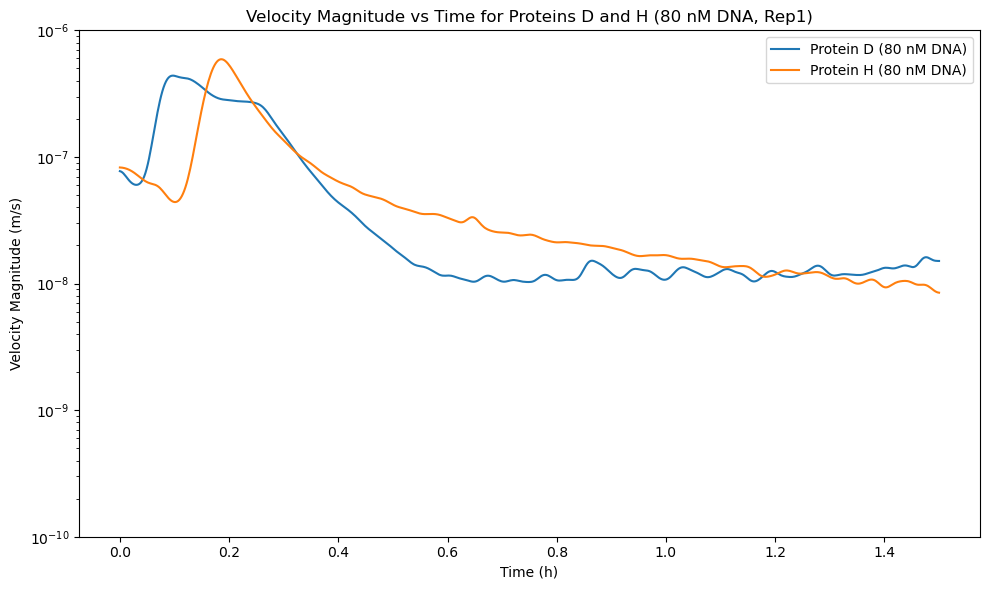

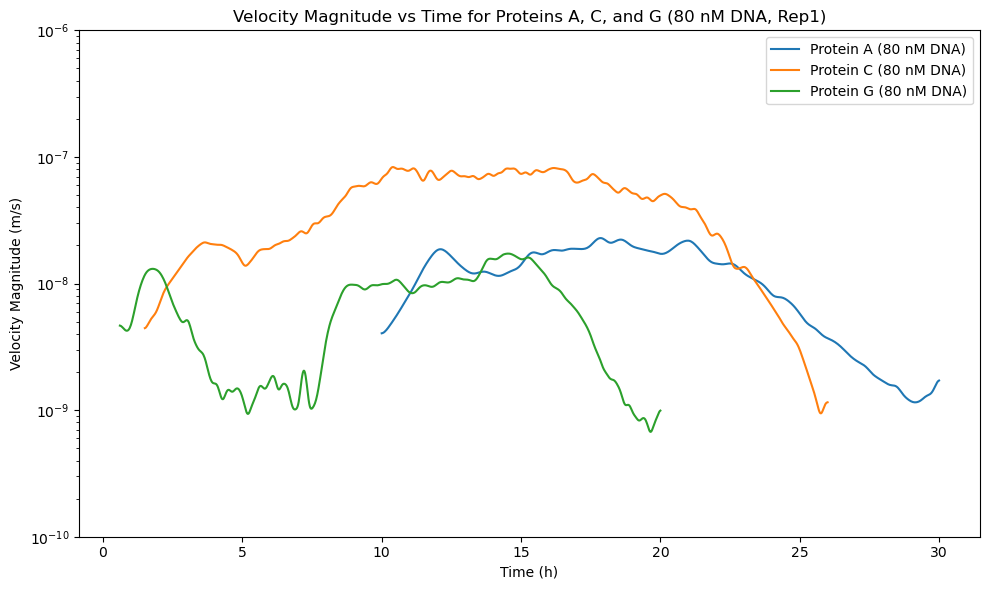

In [34]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Define the proteins to analyze
proteins_group1 = ['D', 'H']
proteins_group2 = ['A', 'C', 'G']

# Create a plot for proteins D and H
plt.figure(figsize=(10, 6))
for protein in proteins_group1:
    # Filter data for the current protein, 80 nM DNA, Rep1 subcondition, and time range 0 to 1.5 hours (90 min)
    protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0) & (df['time (h)'] <= 1.5)]
    
    # Apply Gaussian filter to the velocity magnitude data
    smoothed_velocity = gaussian_filter1d(protein_80nm_data['velocity magnitude [m/s]_mean'], sigma=5)
    
    # Plot smoothed velocity magnitude vs time for the current protein with 80 nM DNA
    plt.plot(protein_80nm_data['Time_h'], smoothed_velocity, linestyle='-', label=f'Protein {protein} (80 nM DNA)')

plt.xlabel('Time (h)')
plt.ylabel('Velocity Magnitude (m/s)')
plt.title('Velocity Magnitude vs Time for Proteins D and H (80 nM DNA, Rep1)')
plt.legend()
plt.yscale('log')  # Set y-axis to log scale
plt.ylim(1e-10, 1e-6)  # Set y-axis limits from 10^-9 to 10^-6
plt.tight_layout()
plt.show()

# Create a plot for proteins A, C, and G
plt.figure(figsize=(10, 6))
for protein in proteins_group2:
    if protein == 'A':
        # Filter data for protein A, 80 nM DNA, Rep1 subcondition, and time range 1 to 5 hours
        protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 10) & (df['time (h)'] <= 30)]
    elif protein == 'C':
        # Filter data for protein C, 80 nM DNA, Rep1 subcondition, and time range 1.5 to 5 hours
        protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 1.5) & (df['time (h)'] <= 26)]
    elif protein == 'G':
        # Filter data for protein G, 80 nM DNA, Rep1 subcondition, and time range 1.5 to 20 hours
        protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0.6) & (df['time (h)'] <= 20)]
    
    # Apply Gaussian filter to the velocity magnitude data
    smoothed_velocity = gaussian_filter1d(protein_80nm_data['velocity magnitude [m/s]_mean'], sigma=5)
    
    # Plot smoothed velocity magnitude vs time for the current protein with 80 nM DNA
    plt.plot(protein_80nm_data['Time_h'], smoothed_velocity, linestyle='-', label=f'Protein {protein} (80 nM DNA)')

plt.xlabel('Time (h)')
plt.ylabel('Velocity Magnitude (m/s)')
plt.title('Velocity Magnitude vs Time for Proteins A, C, and G (80 nM DNA, Rep1)')
plt.legend()
plt.yscale('log')  # Set y-axis to log scale
plt.ylim(1e-10, 1e-6)  # Set y-axis limits from 10^-9 to 10^-6
plt.tight_layout()
plt.show()


In [35]:
df

condition subcondition  time (s)  Time_min     Time_h  \
0       K401_0p625nM-RT         Rep1         0      0.00   0.000000   
1       K401_0p625nM-RT         Rep1        60      1.00   0.016667   
2       K401_0p625nM-RT         Rep1       120      2.00   0.033333   
3       K401_0p625nM-RT         Rep1       180      3.00   0.050000   
4       K401_0p625nM-RT         Rep1       240      4.00   0.066667   
...                 ...          ...       ...       ...        ...   
128080         negative         Rep1    111000   1850.00  30.833333   
128081         negative         Rep1    111075   1851.25  30.854167   
128082         negative         Rep1    111150   1852.50  30.875000   
128083         negative         Rep1    111225   1853.75  30.895833   
128084         negative         Rep1    111300   1855.00  30.916667   

        Mean Intensity  Protein Concentration_ng_ul  Protein Concentration_nM  \
0            10.795248                     1.376854                 30.630794   
1            10.763086                     1.372752                 30.539536   
2            10.526032                     1.342518                 29.866912   
3            10.755514                     1.371786                 30.518051   
4            10.683785                     1.362638                 30.314526   
...                ...                          ...                       ...   
128080        0.000000                     0.000000                  0.000000   
128081        0.000000                     0.000000                  0.000000   
128082        0.000000                     0.000000                  0.000000   
128083        0.000000                     0.000000                  0.000000   
128084        0.000000                     0.000000                  0.000000   

        Number of Protein Molecules  \
0                      3.675695e+10   
1                      3.664744e+10   
2                      3.584029e+10   
3                      3.662166e+10   
4                      3.637743e+10   
...                             ...   
128080                 0.000000e+00   
128081                 0.000000e+00   
128082                 0.000000e+00   
128083                 0.000000e+00   
128084                 0.000000e+00   

        Rate of Change of Protein Molecules per Second  ...  \
0                                                  NaN  ...   
1                                                  NaN  ...   
2                                                  NaN  ...   
3                                                  NaN  ...   
4                                                  NaN  ...   
...                                                ...  ...   
128080                                             0.0  ...   
128081                                             0.0  ...   
128082                                             0.0  ...   
128083                                             0.0  ...   
128084                                             0.0  ...   

        strain [1/s]_mean  vector direction [degrees]_mean  \
0                     NaN                              NaN   
1                     NaN                              NaN   
2                     NaN                              NaN   
3                     NaN                              NaN   
4                     NaN                              NaN   
...                   ...                              ...   
128080                NaN                              NaN   
128081                NaN                              NaN   
128082                NaN                              NaN   
128083                NaN                              NaN   
128084                NaN                              NaN   

        correlation length [m]_mean  distance [m]_mean  power [W]_mean  \
0                               NaN                NaN             NaN   
1                               NaN                NaN             Na

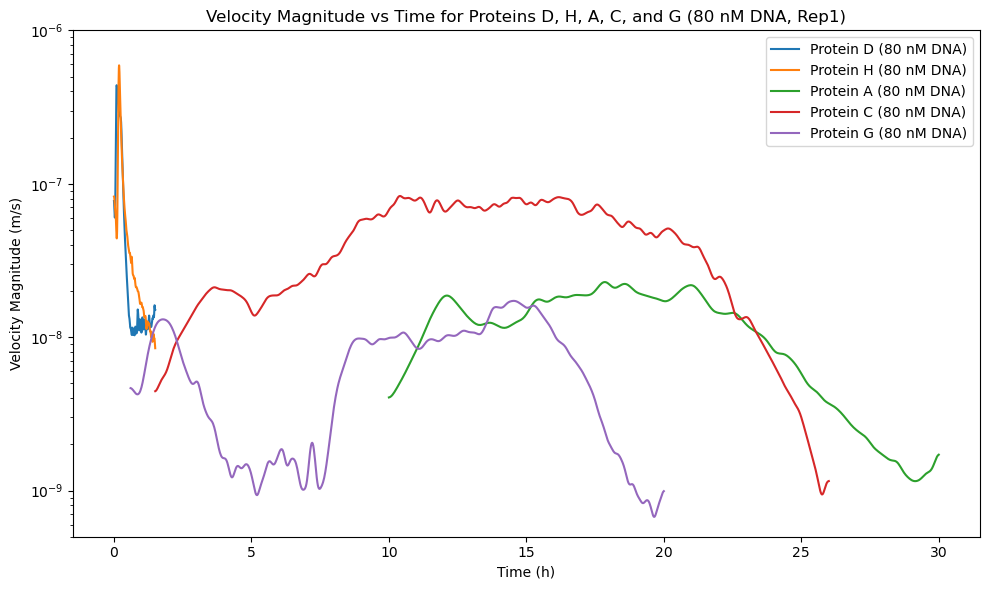

In [36]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Define the proteins to analyze
proteins_group1 = ['D', 'H']
proteins_group2 = ['A', 'C', 'G']

# Combine plots for proteins D, H, A, C, and G
plt.figure(figsize=(10, 6))

# Plot for proteins D and H
for protein in proteins_group1:
    # Filter data for the current protein, 80 nM DNA, Rep1 subcondition, and time range 0 to 1.5 hours (90 min)
    protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0) & (df['time (h)'] <= 1.5)]
    
    # Apply Gaussian filter to the velocity magnitude data
    smoothed_velocity = gaussian_filter1d(protein_80nm_data['velocity magnitude [m/s]_mean'], sigma=5)
    
    # Plot smoothed velocity magnitude vs time for the current protein with 80 nM DNA
    plt.plot(protein_80nm_data['Time_h'], smoothed_velocity, linestyle='-', label=f'Protein {protein} (80 nM DNA)')

# Plot for proteins A, C, and G
for protein in proteins_group2:
    if protein == 'A':
        # Filter data for protein A, 80 nM DNA, Rep1 subcondition, and time range 1 to 5 hours
        protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 10) & (df['time (h)'] <= 30)]
    elif protein == 'C':
        # Filter data for protein C, 80 nM DNA, Rep1 subcondition, and time range 1.5 to 5 hours
        protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 1.5) & (df['time (h)'] <= 26)]
    elif protein == 'G':
        # Filter data for protein G, 80 nM DNA, Rep1 subcondition, and time range 1.5 to 20 hours
        protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0.6) & (df['time (h)'] <= 20)]
    
    # Apply Gaussian filter to the velocity magnitude data
    smoothed_velocity = gaussian_filter1d(protein_80nm_data['velocity magnitude [m/s]_mean'], sigma=5)
    
    # Plot smoothed velocity magnitude vs time for the current protein with 80 nM DNA
    plt.plot(protein_80nm_data['Time_h'], smoothed_velocity, linestyle='-', label=f'Protein {protein} (80 nM DNA)')

plt.xlabel('Time (h)')
plt.ylabel('Velocity Magnitude (m/s)')
plt.title('Velocity Magnitude vs Time for Proteins D, H, A, C, and G (80 nM DNA, Rep1)')
plt.legend()
plt.yscale('log')  # Set y-axis to log scale
plt.ylim(5e-10, 1e-6)  # Set y-axis limits from 10^-9 to 10^-6
plt.tight_layout()
plt.show()


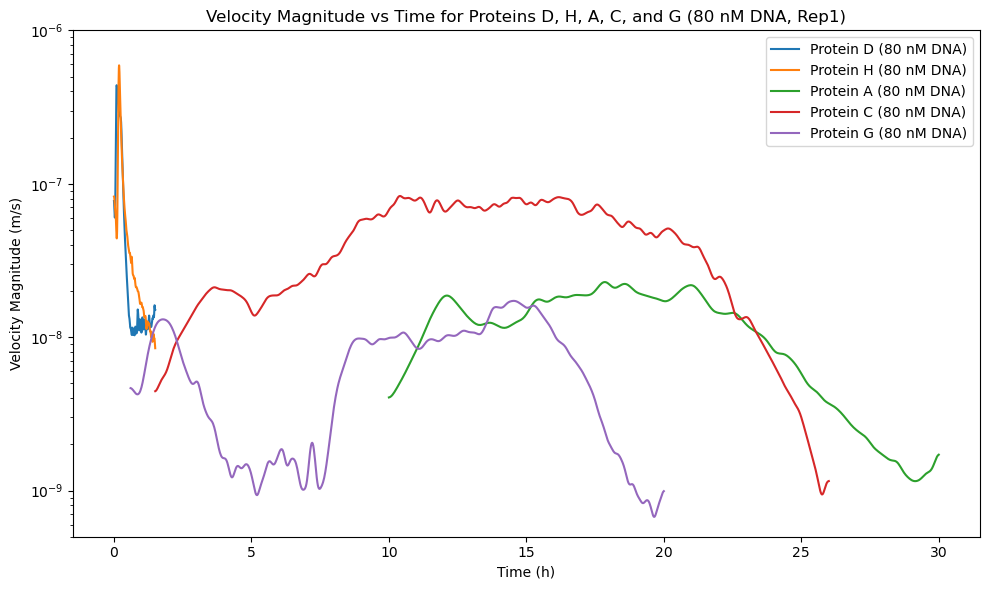

In [37]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Define the proteins to analyze
proteins_group1 = ['D', 'H']
proteins_group2 = ['A', 'C', 'G']

# Combine plots for proteins D, H, A, C, and G
plt.figure(figsize=(10, 6))

# Plot for proteins D and H
for protein in proteins_group1:
    # Filter data for the current protein, 80 nM DNA, Rep1 subcondition, and time range 0 to 1.5 hours (90 min)
    protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0) & (df['time (h)'] <= 1.5)]
    
    # Apply Gaussian filter to the velocity magnitude data
    smoothed_velocity = gaussian_filter1d(protein_80nm_data['velocity magnitude [m/s]_mean'], sigma=5)
    
    # Plot smoothed velocity magnitude vs time for the current protein with 80 nM DNA
    plt.plot(protein_80nm_data['Time_h'], smoothed_velocity, linestyle='-', label=f'Protein {protein} (80 nM DNA)')

# Plot for proteins A, C, and G
for protein in proteins_group2:
    if protein == 'A':
        # Filter data for protein A, 80 nM DNA, Rep1 subcondition, and time range 1 to 5 hours
        protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 10) & (df['time (h)'] <= 30)]
    elif protein == 'C':
        # Filter data for protein C, 80 nM DNA, Rep1 subcondition, and time range 1.5 to 5 hours
        protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 1.5) & (df['time (h)'] <= 26)]
    elif protein == 'G':
        # Filter data for protein G, 80 nM DNA, Rep1 subcondition, and time range 1.5 to 20 hours
        protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0.6) & (df['time (h)'] <= 20)]
    
    # Apply Gaussian filter to the velocity magnitude data
    smoothed_velocity = gaussian_filter1d(protein_80nm_data['velocity magnitude [m/s]_mean'], sigma=5)
    
    # Plot smoothed velocity magnitude vs time for the current protein with 80 nM DNA
    plt.plot(protein_80nm_data['Time_h'], smoothed_velocity, linestyle='-', label=f'Protein {protein} (80 nM DNA)')

plt.xlabel('Time (h)')
plt.ylabel('Velocity Magnitude (m/s)')
plt.title('Velocity Magnitude vs Time for Proteins D, H, A, C, and G (80 nM DNA, Rep1)')
plt.legend()
plt.yscale('log')  # Set y-axis to log scale
plt.ylim(5e-10, 1e-6)  # Set y-axis limits from 10^-9 to 10^-6
plt.tight_layout()
plt.show()


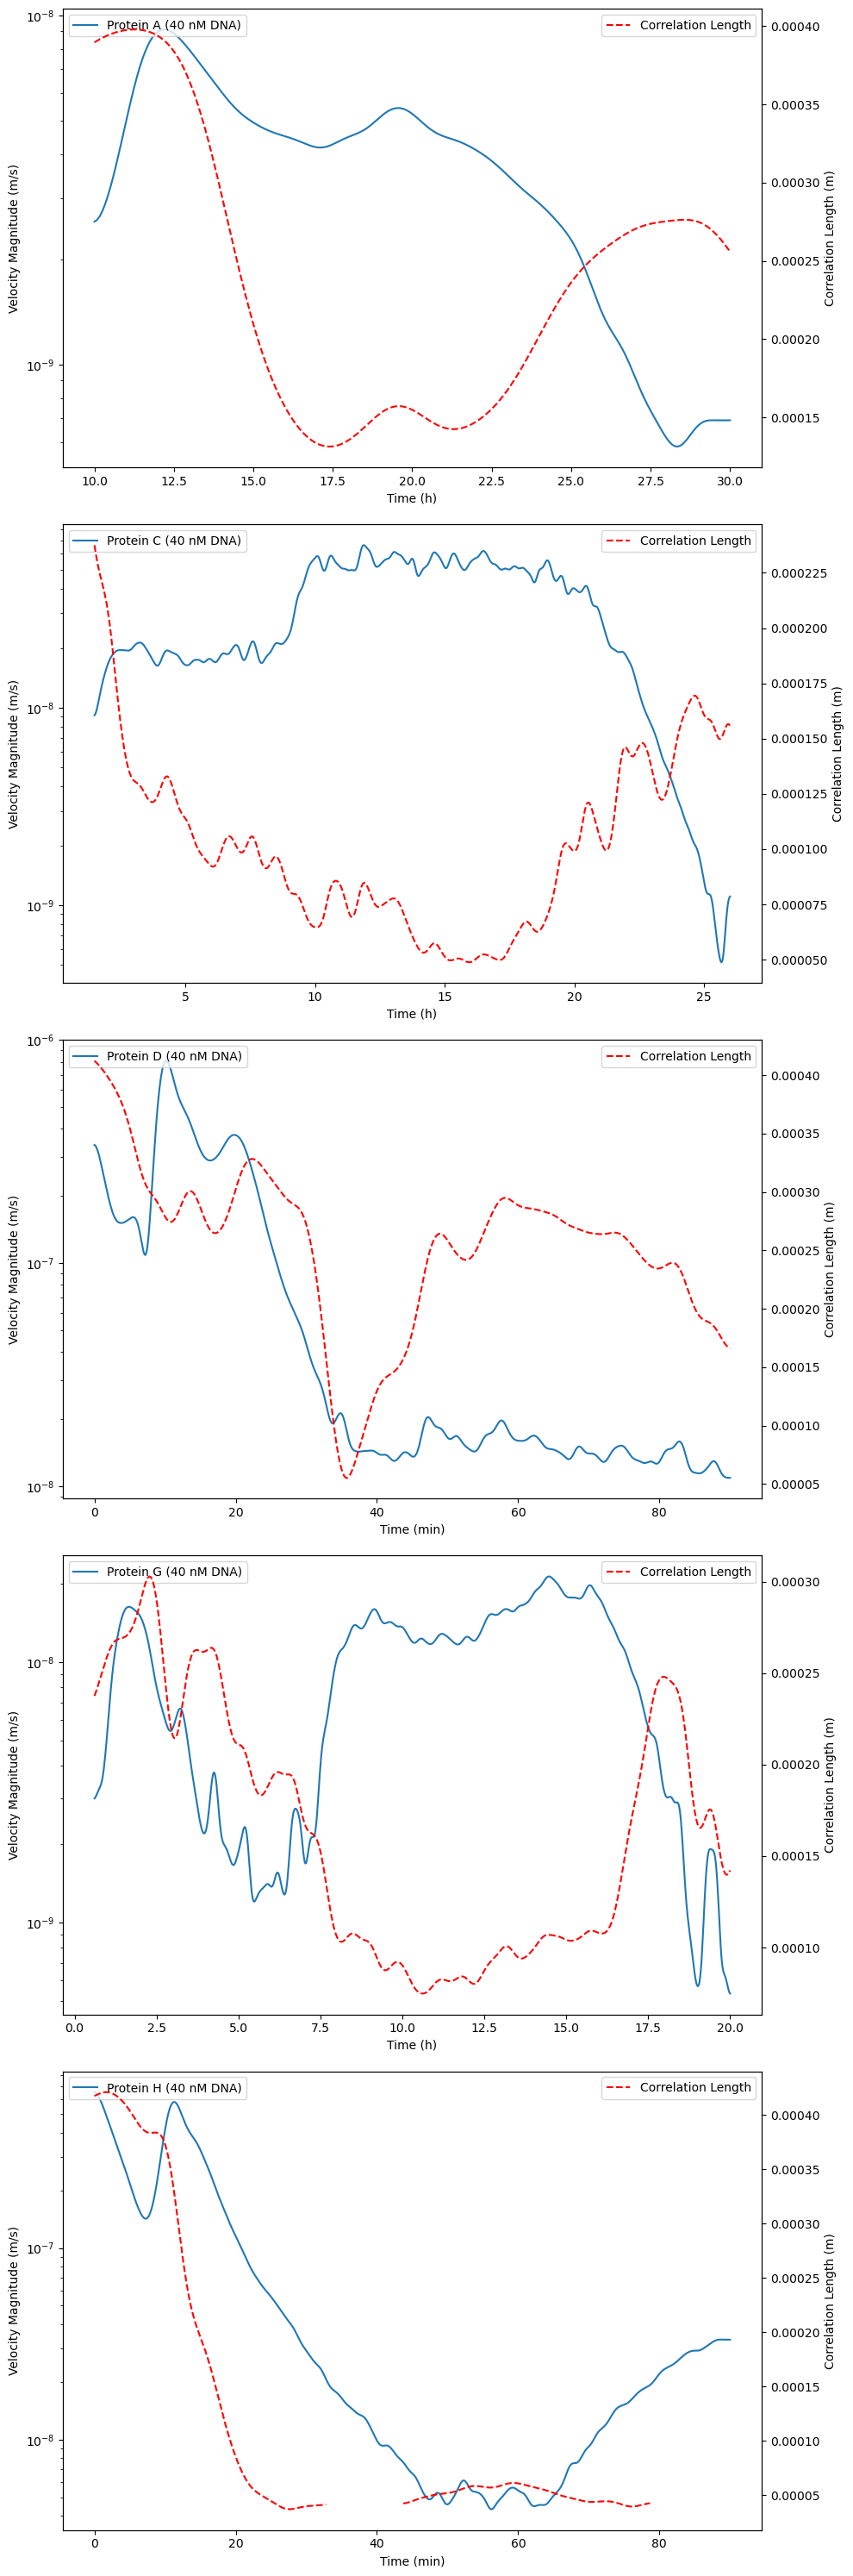

In [38]:
import matplotlib.pyplot as plt

# Define the proteins to analyze
proteins = ['A', 'C', 'D', 'G', 'H']

# Parameter to modify DNA concentration
dna_concentration = '40'  # Default value is 80 nM

# Create a figure with subplots
fig, axs = plt.subplots(len(proteins), 1, figsize=(10, 6 * len(proteins)), sharex=False)

# Plot for each protein
for i, protein in enumerate(proteins):
    if protein == 'A':
        # Filter data for protein A, specified DNA concentration, Rep1 subcondition, and time range 10 to 30 hours
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == dna_concentration) & (df['time (h)'] >= 10) & (df['time (h)'] <= 30)]
        time_data = protein_data['Time_h']
        time_label = 'Time (h)'
    elif protein == 'C':
        # Filter data for protein C, specified DNA concentration, Rep1 subcondition, and time range 1.5 to 26 hours
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == dna_concentration) & (df['time (h)'] >= 1.5) & (df['time (h)'] <= 26)]
        time_data = protein_data['Time_h']
        time_label = 'Time (h)'
    elif protein == 'D':
        # Filter data for protein D, specified DNA concentration, Rep1 subcondition, and time range 0 to 1.5 hours
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == dna_concentration) & (df['time (h)'] >= 0) & (df['time (h)'] <= 1.5)]
        time_data = protein_data['Time_min']
        time_label = 'Time (min)'
    elif protein == 'G':
        # Filter data for protein G, specified DNA concentration, Rep1 subcondition, and time range 0.6 to 20 hours
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == dna_concentration) & (df['time (h)'] >= 0.6) & (df['time (h)'] <= 20)]
        time_data = protein_data['Time_h']
        time_label = 'Time (h)'
    elif protein == 'H':
        # Filter data for protein H, specified DNA concentration, Rep1 subcondition, and time range 0 to 1.5 hours
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == dna_concentration) & (df['time (h)'] >= 0) & (df['time (h)'] <= 1.5)]
        time_data = protein_data['Time_min']
        time_label = 'Time (min)'
    
    # Apply Gaussian filter to the velocity magnitude data
    smoothed_velocity = gaussian_filter1d(protein_data['velocity magnitude [m/s]_mean'], sigma=5)
    
    # Plot smoothed velocity magnitude vs time for the current protein with specified DNA concentration
    ax1 = axs[i]
    ax1.plot(time_data, smoothed_velocity, linestyle='-', label=f'Protein {protein} ({dna_concentration} nM DNA)')
    ax1.set_ylabel('Velocity Magnitude (m/s)')
    ax1.set_yscale('log')
    ax1.legend(loc='upper left')
    
    # Create a second y-axis for the correlation length
    ax2 = ax1.twinx()
    ax2.plot(time_data, protein_data['correlation length [m]_mean'], linestyle='--', color='r', label='Correlation Length')
    ax2.set_ylabel('Correlation Length (m)')
    ax2.legend(loc='upper right')
    
    # Set x-axis label for each subplot
    ax1.set_xlabel(time_label)

plt.tight_layout()
plt.show()


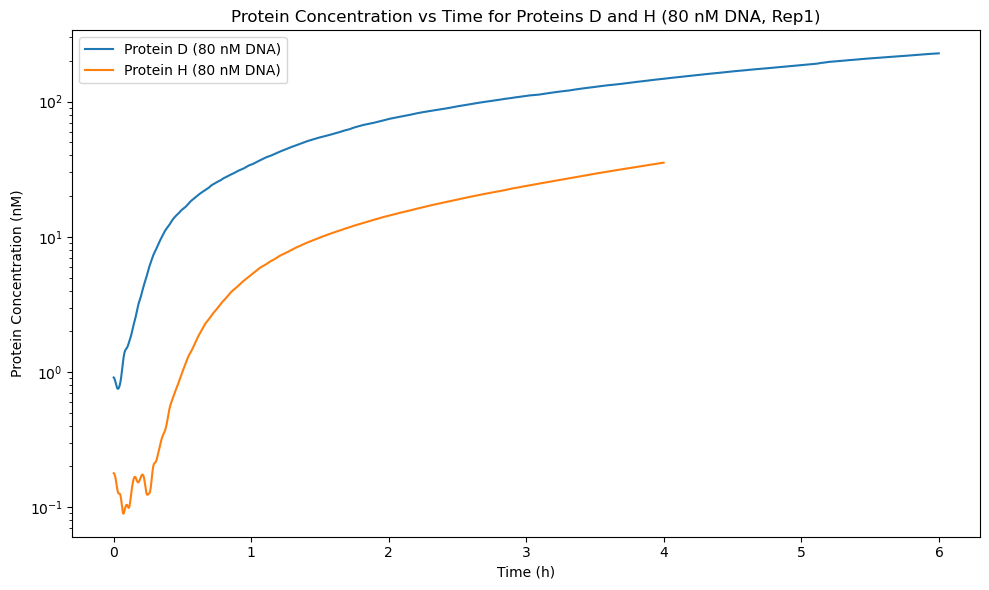

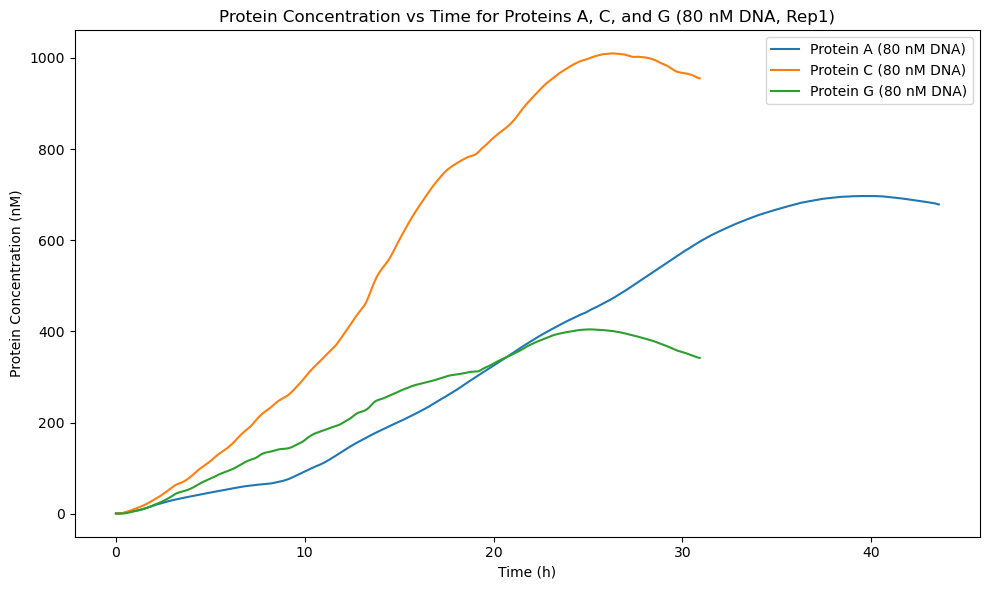

In [39]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Define the proteins to analyze
proteins_group1 = ['D', 'H']
proteins_group2 = ['A', 'C', 'G']

# Create a plot for proteins D and H
plt.figure(figsize=(10, 6))
for protein in proteins_group1:
    # Filter data for the current protein, 80 nM DNA, and Rep1 subcondition without time range
    protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80')]
    
    # Apply Gaussian filter to the protein concentration data
    smoothed_concentration = gaussian_filter1d(protein_80nm_data['Protein Concentration_nM'], sigma=5)
    
    # Plot smoothed protein concentration vs time for the current protein with 80 nM DNA
    plt.plot(protein_80nm_data['Time_h'], smoothed_concentration, linestyle='-', label=f'Protein {protein} (80 nM DNA)')

plt.xlabel('Time (h)')
plt.ylabel('Protein Concentration (nM)')
plt.title('Protein Concentration vs Time for Proteins D and H (80 nM DNA, Rep1)')
plt.legend()
plt.yscale('log')  # Set y-axis to log scale
plt.tight_layout()
plt.show()

# Create a plot for proteins A, C, and G
plt.figure(figsize=(10, 6))
for protein in proteins_group2:
    # Filter data for the current protein, 80 nM DNA, and Rep1 subcondition without time range
    protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80')]
    
    # Apply Gaussian filter to the protein concentration data
    smoothed_concentration = gaussian_filter1d(protein_80nm_data['Protein Concentration_nM'], sigma=5)
    
    # Plot smoothed protein concentration vs time for the current protein with 80 nM DNA
    plt.plot(protein_80nm_data['Time_h'], smoothed_concentration, linestyle='-', label=f'Protein {protein} (80 nM DNA)')

plt.xlabel('Time (h)')
plt.ylabel('Protein Concentration (nM)')
plt.title('Protein Concentration vs Time for Proteins A, C, and G (80 nM DNA, Rep1)')
plt.legend()
# plt.yscale('log')  # Set y-axis to log scale
plt.tight_layout()
plt.show()


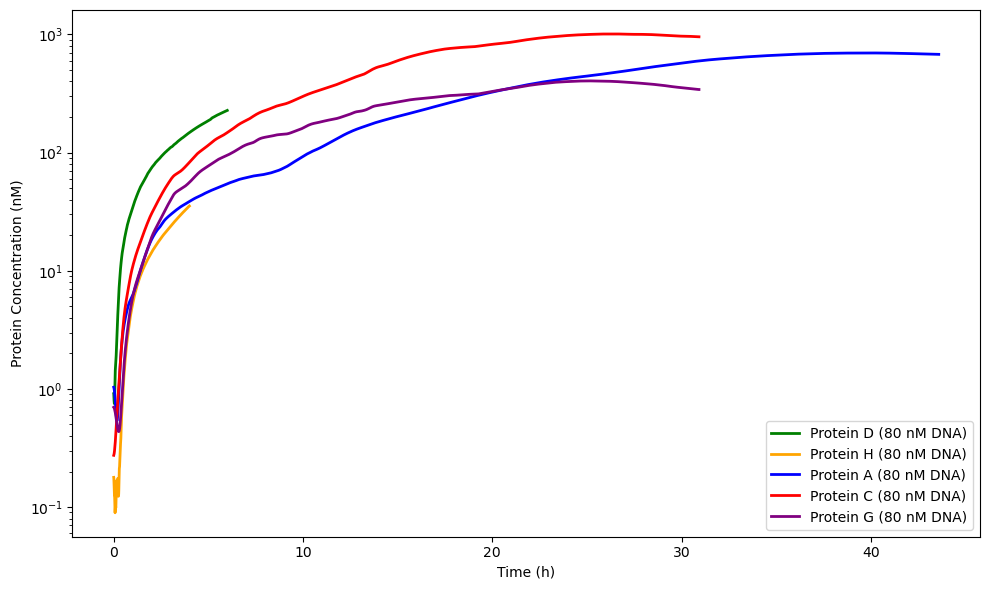

In [40]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Define the proteins to analyze
proteins_group1 = ['D', 'H']
proteins_group2 = ['A', 'C', 'G']

# Combine both plots into a single one
plt.figure(figsize=(10, 6))

# Plot for proteins D and H
for protein in proteins_group1:
    # Filter data for the current protein, 80 nM DNA, and Rep1 subcondition without time range
    protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80')]
    
    # Apply Gaussian filter to the protein concentration data
    smoothed_concentration = gaussian_filter1d(protein_80nm_data['Protein Concentration_nM'], sigma=5)
    
    # Determine color based on protein
    color = 'green' if protein == 'D' else 'orange'
    
    # Plot smoothed protein concentration vs time for the current protein with 80 nM DNA
    plt.plot(protein_80nm_data['Time_h'], smoothed_concentration, linestyle='-', linewidth=2, color=color, label=f'Protein {protein} (80 nM DNA)')

# Plot for proteins A, C, and G
for protein in proteins_group2:
    # Filter data for the current protein, 80 nM DNA, and Rep1 subcondition without time range
    protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80')]
    
    # Apply Gaussian filter to the protein concentration data
    smoothed_concentration = gaussian_filter1d(protein_80nm_data['Protein Concentration_nM'], sigma=5)
    
    # Determine color based on protein
    color = 'blue' if protein == 'A' else 'red' if protein == 'C' else 'purple'
    
    # Plot smoothed protein concentration vs time for the current protein with 80 nM DNA
    plt.plot(protein_80nm_data['Time_h'], smoothed_concentration, linestyle='-', linewidth=2, color=color, label=f'Protein {protein} (80 nM DNA)')

plt.xlabel('Time (h)')
plt.ylabel('Protein Concentration (nM)')
# plt.title('Protein Concentration vs Time for Proteins D, H, A, C, and G (80 nM DNA, Rep1)')
plt.legend()
plt.yscale('log')  # Set y-axis to log scale
plt.tight_layout()

plt.savefig('../../../../Downloads/proteinc_vs_time.svg', format='svg')

plt.show()


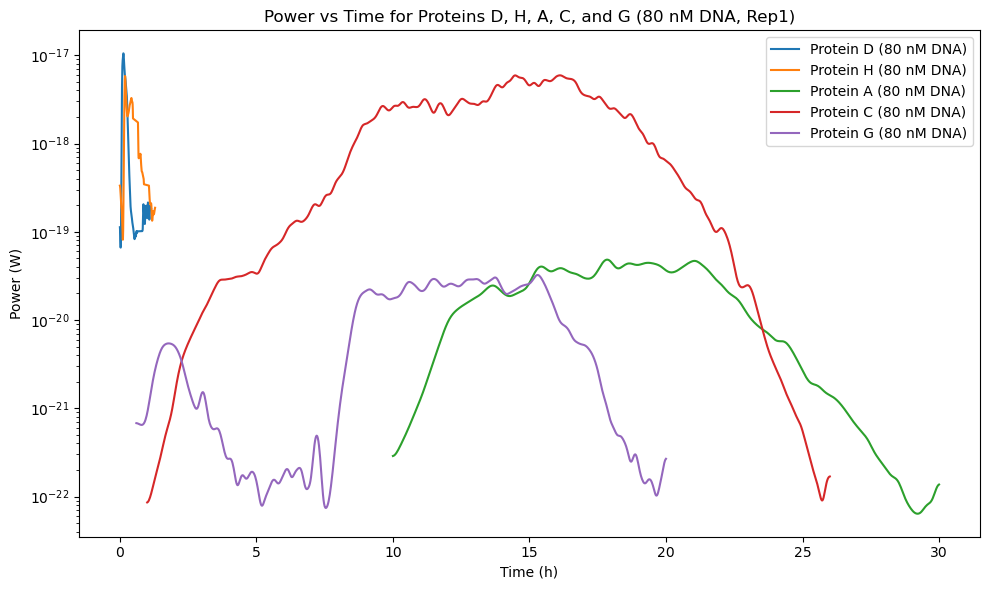

In [41]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Define the proteins to analyze
proteins_group1 = ['D', 'H']
proteins_group2 = ['A', 'C', 'G']

# Combine plots for proteins D, H, A, C, and G
plt.figure(figsize=(10, 6))

# Plot for proteins D and H
for protein in proteins_group1:
    # Filter data for the current protein, 80 nM DNA, Rep1 subcondition, and time range 0 to 1.5 hours (90 min)
    protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0) & (df['time (h)'] <= 1.5)]
    
    # Drop NaN values in the power data
    protein_80nm_data = protein_80nm_data.dropna(subset=['power [W]_mean'])
    
    # Apply Gaussian filter to the power data
    smoothed_power = gaussian_filter1d(protein_80nm_data['power [W]_mean'], sigma=5)
    
    # Plot smoothed power vs time for the current protein with 80 nM DNA
    plt.plot(protein_80nm_data['Time_h'], smoothed_power, linestyle='-', label=f'Protein {protein} (80 nM DNA)')

# Plot for proteins A, C, and G
for protein in proteins_group2:
    if protein == 'A':
        # Filter data for protein A, 80 nM DNA, Rep1 subcondition, and time range 1 to 5 hours
        protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 10) & (df['time (h)'] <= 30)]
    elif protein == 'C':
        # Filter data for protein C, 80 nM DNA, Rep1 subcondition, and time range 1.5 to 5 hours
        protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 1) & (df['time (h)'] <= 26)]
    elif protein == 'G':
        # Filter data for protein G, 80 nM DNA, Rep1 subcondition, and time range 1.5 to 20 hours
        protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0.6) & (df['time (h)'] <= 20)]
    
    # Drop NaN values in the power data
    protein_80nm_data = protein_80nm_data.dropna(subset=['power [W]_mean'])
    
    # Apply Gaussian filter to the power data
    smoothed_power = gaussian_filter1d(protein_80nm_data['power [W]_mean'], sigma=5)
    
    # Plot smoothed power vs time for the current protein with 80 nM DNA
    plt.plot(protein_80nm_data['Time_h'], smoothed_power, linestyle='-', label=f'Protein {protein} (80 nM DNA)')

plt.xlabel('Time (h)')
plt.ylabel('Power (W)')
plt.title('Power vs Time for Proteins D, H, A, C, and G (80 nM DNA, Rep1)')
plt.legend()
plt.yscale('log')  # Set y-axis to log scale
plt.tight_layout()
plt.show()


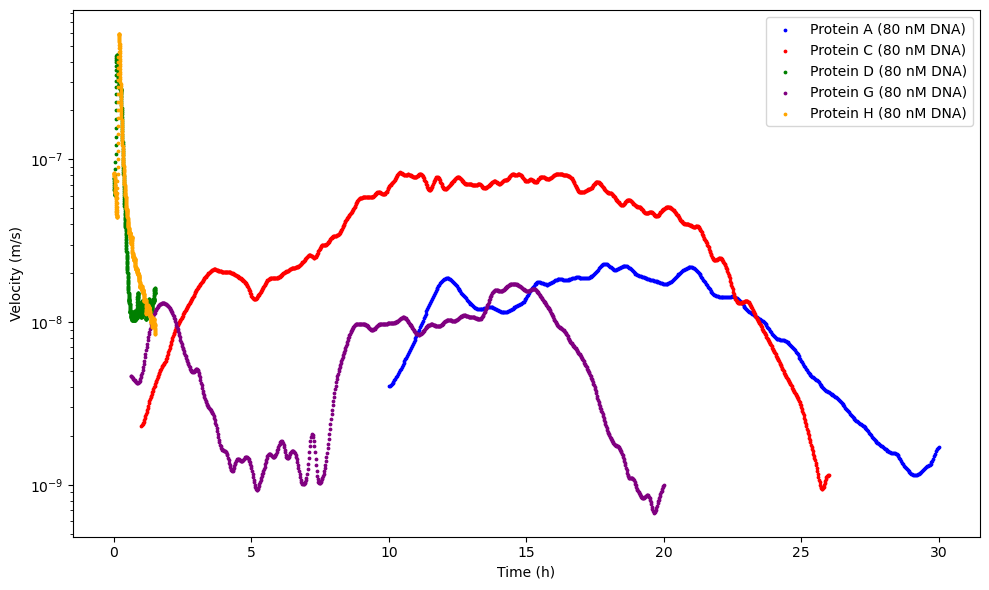

In [42]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Define the proteins to analyze, sorted in alphabetical order
proteins = ['A', 'C', 'D', 'G', 'H']

# Combine plots for proteins A, C, D, G, and H
plt.figure(figsize=(10, 6))

# Plot for each protein
for protein in proteins:
    if protein == 'A':
        # Filter data for protein A, 80 nM DNA, Rep1 subcondition, and time range 10 to 30 hours
        protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 10) & (df['time (h)'] <= 30)]
        color = 'blue'
    elif protein == 'C':
        # Filter data for protein C, 80 nM DNA, Rep1 subcondition, and time range 1.5 to 5 hours
        protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 1) & (df['time (h)'] <= 26)]
        color = 'red'
    elif protein == 'D':
        # Filter data for protein D, 80 nM DNA, Rep1 subcondition, and time range 0 to 1.5 hours
        protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0) & (df['time (h)'] <= 1.5)]
        color = 'green'
    elif protein == 'G':
        # Filter data for protein G, 80 nM DNA, Rep1 subcondition, and time range 0.6 to 20 hours
        protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0.6) & (df['time (h)'] <= 20)]
        color = 'purple'
    elif protein == 'H':
        # Filter data for protein H, 80 nM DNA, Rep1 subcondition, and time range 0 to 1.5 hours
        protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0) & (df['time (h)'] <= 1.5)]
        color = 'orange'
    
    # Drop NaN values in the velocity data
    protein_80nm_data = protein_80nm_data.dropna(subset=['velocity magnitude [m/s]_mean'])
    
    # Apply Gaussian filter to the velocity data
    smoothed_velocity = gaussian_filter1d(protein_80nm_data['velocity magnitude [m/s]_mean'], sigma=5)
    
    # Scatter plot smoothed velocity vs time for the current protein with 80 nM DNA
    plt.scatter(protein_80nm_data['Time_h'], smoothed_velocity, label=f'Protein {protein} (80 nM DNA)', color=color, s=3)

plt.xlabel('Time (h)')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.yscale('log')  # Set y-axis to log scale
plt.tight_layout()

# Save the plot as an SVG file
plt.savefig('../../../../Downloads/velocity_vs_time_proteins.svg', format='svg')

plt.show()


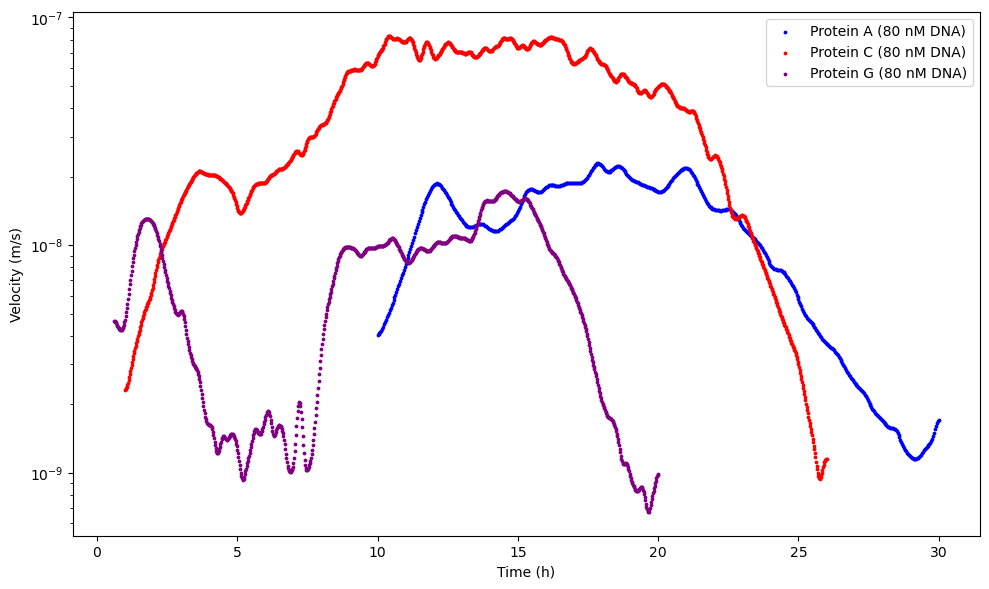

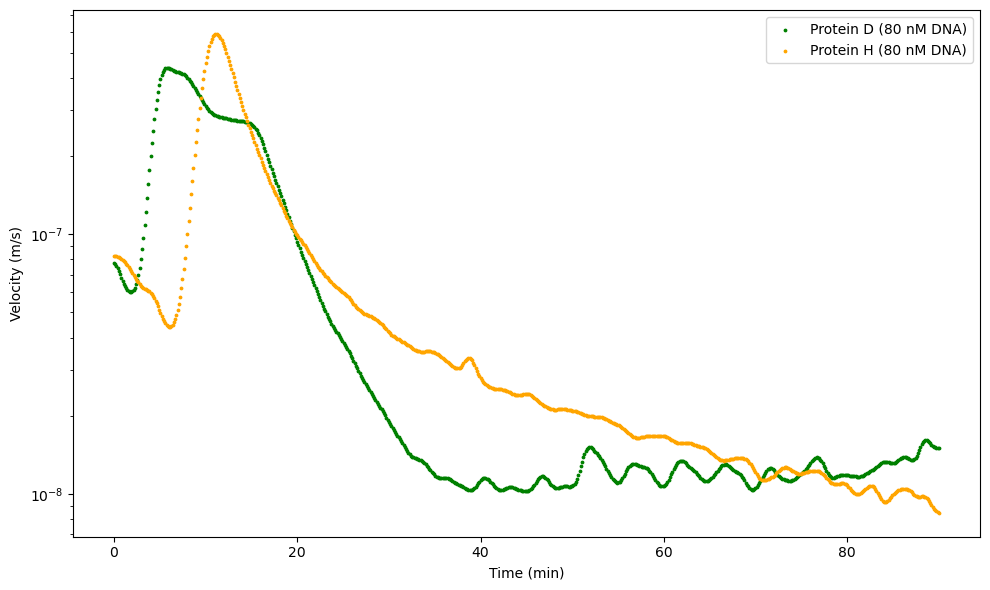

In [43]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Define the proteins to analyze, sorted in alphabetical order
proteins_hours = ['A', 'C', 'G']
proteins_minutes = ['D', 'H']

# Plot for proteins A, C, and G in hours
plt.figure(figsize=(10, 6))
for protein in proteins_hours:
    if protein == 'A':
        # Filter data for protein A, 80 nM DNA, Rep1 subcondition, and time range 10 to 30 hours
        protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 10) & (df['time (h)'] <= 30)]
        color = 'blue'
    elif protein == 'C':
        # Filter data for protein C, 80 nM DNA, Rep1 subcondition, and time range 1.5 to 26 hours
        protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 1) & (df['time (h)'] <= 26)]
        color = 'red'
    elif protein == 'G':
        # Filter data for protein G, 80 nM DNA, Rep1 subcondition, and time range 0.6 to 20 hours
        protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0.6) & (df['time (h)'] <= 20)]
        color = 'purple'
    
    # Drop NaN values in the velocity data
    protein_80nm_data = protein_80nm_data.dropna(subset=['velocity magnitude [m/s]_mean'])
    
    # Apply Gaussian filter to the velocity data
    smoothed_velocity = gaussian_filter1d(protein_80nm_data['velocity magnitude [m/s]_mean'], sigma=5)
    
    # Scatter plot smoothed velocity vs time for the current protein with 80 nM DNA
    plt.scatter(protein_80nm_data['Time_h'], smoothed_velocity, label=f'Protein {protein} (80 nM DNA)', color=color, s=3)

plt.xlabel('Time (h)')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.yscale('log')  # Set y-axis to log scale
plt.tight_layout()

# Save the plot as an SVG file
plt.savefig('../../../../Downloads/velocity_vs_time_proteins_hours.svg', format='svg')

plt.show()

# Plot for proteins D and H in minutes
plt.figure(figsize=(10, 6))
for protein in proteins_minutes:
    if protein == 'D':
        # Filter data for protein D, 80 nM DNA, Rep1 subcondition, and time range 0 to 1.5 hours
        protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0) & (df['time (h)'] <= 1.5)]
        color = 'green'
    elif protein == 'H':
        # Filter data for protein H, 80 nM DNA, Rep1 subcondition, and time range 0 to 1.5 hours
        protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0) & (df['time (h)'] <= 1.5)]
        color = 'orange'
    
    # Drop NaN values in the velocity data
    protein_80nm_data = protein_80nm_data.dropna(subset=['velocity magnitude [m/s]_mean'])
    
    # Apply Gaussian filter to the velocity data
    smoothed_velocity = gaussian_filter1d(protein_80nm_data['velocity magnitude [m/s]_mean'], sigma=5)
    
    # Scatter plot smoothed velocity vs time for the current protein with 80 nM DNA
    plt.scatter(protein_80nm_data['Time_min'], smoothed_velocity, label=f'Protein {protein} (80 nM DNA)', color=color, s=3)

plt.xlabel('Time (min)')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.yscale('log')  # Set y-axis to log scale
plt.tight_layout()

# Save the plot as an SVG file
plt.savefig('../../../../Downloads/velocity_vs_time_proteins_minutes.svg', format='svg')

plt.show()


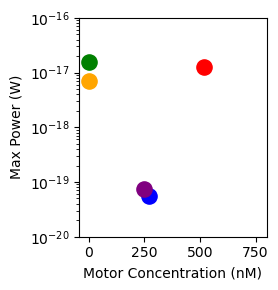

In [44]:
import matplotlib.pyplot as plt

# Define the proteins to analyze, sorted in alphabetical order
proteins = ['A', 'C', 'D', 'G', 'H']

# Prepare a dictionary to store the maximum power and corresponding concentration for each protein
max_power_data = {}

# Analyze each protein
for protein in proteins:
    if protein == 'A':
        # Filter data for protein A, 80 nM DNA, Rep1 subcondition, and time range 10 to 30 hours
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 10) & (df['time (h)'] <= 30)]
    elif protein == 'C':
        # Filter data for protein C, 80 nM DNA, Rep1 subcondition, and time range 1 to 26 hours
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 1) & (df['time (h)'] <= 26)]
    elif protein == 'D':
        # Filter data for protein D, 80 nM DNA, Rep1 subcondition, and time range 0 to 1.5 hours
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0) & (df['time (h)'] <= 1.5)]
    elif protein == 'G':
        # Filter data for protein G, 80 nM DNA, Rep1 subcondition, and time range 0.6 to 20 hours
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0.6) & (df['time (h)'] <= 20)]
    elif protein == 'H':
        # Filter data for protein H, 80 nM DNA, Rep1 subcondition, and time range 0 to 1.5 hours
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0) & (df['time (h)'] <= 1.5)]
    
    # Drop NaN values in the power data
    protein_data = protein_data.dropna(subset=['power [W]_mean'])
    
    # Find the maximum power and corresponding concentration
    max_power = protein_data['power [W]_mean'].max()
    max_concentration = protein_data.loc[protein_data['power [W]_mean'].idxmax(), 'Protein Concentration_nM']
    
    # Store the results
    max_power_data[protein] = (max_concentration, max_power)

# Plot the maximum power vs motor concentration for each protein
plt.figure(figsize=(3, 3))
colors = {'A': 'blue', 'C': 'red', 'D': 'green', 'G': 'purple', 'H': 'orange'}
for protein, (concentration, power) in max_power_data.items():
    plt.scatter(concentration, power, label=f'Protein {protein}', s=120, color=colors[protein])  # Use specified colors

plt.xlabel('Motor Concentration (nM)')
plt.ylabel('Max Power (W)')
plt.xlim(-45, 800)  # Set x-axis limits from 0 to 800 nM
plt.ylim(1e-20, 1e-16)  # Set y-axis limits from 10^-20 to 10^-16
# plt.legend()
# plt.xscale('log')  # Set x-axis to log scale if needed
plt.yscale('log')  # Set y-axis to log scale
plt.tight_layout()

# Save the plot as an SVG file
plt.savefig('../../../../Downloads/max_power_vs_concentration.svg', format='svg')

plt.show()


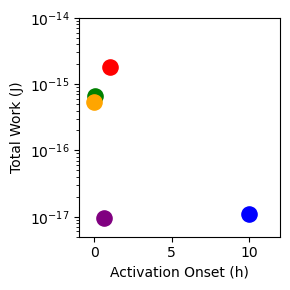

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Define the proteins to analyze, sorted alphabetically
proteins_group1 = ['D', 'H']
proteins_group2 = ['A', 'C', 'G']

# Prepare a dictionary to store the activation onset and total work for each protein
activation_onset_data = {}

# Function to determine activation onset based on velocity magnitude
def find_activation_onset(protein_data):
    # Calculate the difference in velocity magnitude to find the slope
    velocity_diff = np.diff(protein_data['velocity magnitude [m/s]_mean'])
    # Find the index where the slope first becomes positive
    onset_index = np.where(velocity_diff > 0)[0]
    if len(onset_index) > 0:
        return protein_data.iloc[onset_index[0]]['time (h)']
    else:
        return None

# Analyze proteins D and H
for protein in proteins_group1:
    # Filter data for the current protein, 80 nM DNA, Rep1 subcondition, and time range 0 to 1.5 hours (90 min)
    protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0) & (df['time (h)'] <= 1.5)]
    
    # Drop NaN values in the power data
    protein_data = protein_data.dropna(subset=['power [W]_mean'])
    
    # Find the activation onset
    activation_onset = find_activation_onset(protein_data)
    
    # Calculate total work as the sum of power
    total_work = protein_data['power [W]_mean'].sum()
    
    # Store the results
    if activation_onset is not None:
        activation_onset_data[protein] = (activation_onset, total_work)

# Analyze proteins A, C, and G
for protein in proteins_group2:
    if protein == 'A':
        # Filter data for protein A, 80 nM DNA, Rep1 subcondition, and time range 10 to 30 hours
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 10) & (df['time (h)'] <= 30)]
    elif protein == 'C':
        # Filter data for protein C, 80 nM DNA, Rep1 subcondition, and time range 1 to 26 hours
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 1) & (df['time (h)'] <= 26)]
    elif protein == 'G':
        # Filter data for protein G, 80 nM DNA, Rep1 subcondition, and time range 0.6 to 20 hours
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0.6) & (df['time (h)'] <= 20)]
    
    # Drop NaN values in the power data
    protein_data = protein_data.dropna(subset=['power [W]_mean'])
    
    # Find the activation onset
    activation_onset = find_activation_onset(protein_data)
    
    # Calculate total work as the sum of power
    total_work = protein_data['power [W]_mean'].sum()
    
    # Store the results
    if activation_onset is not None:
        activation_onset_data[protein] = (activation_onset, total_work)

# Plot the activation onset vs total work for each protein
plt.figure(figsize=(3, 3))
colors = {'A': 'blue', 'C': 'red', 'D': 'green', 'G': 'purple', 'H': 'orange'}
for protein, (onset, work) in activation_onset_data.items():
    plt.scatter(onset, work, label=f'Protein {protein}', s=120, color=colors[protein])  # Use specified colors

plt.xlabel('Activation Onset (h)')
plt.ylabel('Total Work (J)')
# plt.title('Activation Onset vs Total Work for Proteins A, C, D, G, and H')
plt.xlim(-1, 12)  # Set x-axis limits from 0 to 800 nM
plt.ylim(5e-18, 1e-14)  # Set y-axis limits from 10^-20 to 10^-16
# plt.legend()
plt.yscale('log')  # Set y-axis to log scale
plt.savefig('../../../../Downloads/work_vs_onset.svg', format='svg')

plt.tight_layout()
plt.show()


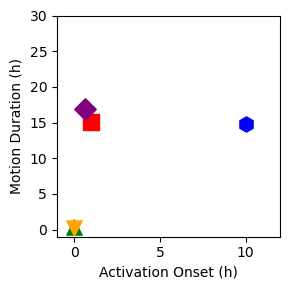

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Define the proteins to analyze, sorted alphabetically
proteins_group1 = ['D', 'H']
proteins_group2 = ['A', 'C', 'G']

# Prepare a dictionary to store the activation onset and motion duration for each protein
motion_duration_data = {}

# Function to determine activation onset based on velocity magnitude
def find_activation_onset(protein_data):
    velocity_diff = np.diff(protein_data['velocity magnitude [m/s]_mean'])
    onset_index = np.where(velocity_diff > 0)[0]
    if len(onset_index) > 0:
        return protein_data.iloc[onset_index[0]]['time (h)']
    else:
        return None

# Function to calculate motion duration
def calculate_motion_duration(protein_data):
    max_velocity = protein_data['velocity magnitude [m/s]_mean'].max()
    threshold_velocity = 0.2 * max_velocity
    above_threshold = protein_data[protein_data['velocity magnitude [m/s]_mean'] >= threshold_velocity]
    if not above_threshold.empty:
        return above_threshold['time (h)'].max() - above_threshold['time (h)'].min()
    else:
        return None

# Analyze proteins D and H
for protein in proteins_group1:
    protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0) & (df['time (h)'] <= 1.5)]
    protein_data = protein_data.dropna(subset=['velocity magnitude [m/s]_mean'])
    
    activation_onset = find_activation_onset(protein_data)
    motion_duration = calculate_motion_duration(protein_data)
    
    if activation_onset is not None and motion_duration is not None:
        motion_duration_data[protein] = (activation_onset, motion_duration)

# Analyze proteins A, C, and G
for protein in proteins_group2:
    if protein == 'A':
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 10) & (df['time (h)'] <= 30)]
    elif protein == 'C':
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 1) & (df['time (h)'] <= 26)]
    elif protein == 'G':
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0.6) & (df['time (h)'] <= 20)]
    
    protein_data = protein_data.dropna(subset=['velocity magnitude [m/s]_mean'])
    
    activation_onset = find_activation_onset(protein_data)
    motion_duration = calculate_motion_duration(protein_data)
    
    if activation_onset is not None and motion_duration is not None:
        motion_duration_data[protein] = (activation_onset, motion_duration)

# Plot the motion duration vs activation onset for each protein
plt.figure(figsize=(3, 3))
colors = {'A': 'blue', 'C': 'red', 'D': 'green', 'G': 'purple', 'H': 'orange'}
markers = {'A': 'h', 'C': 's', 'D': '^', 'G': 'D', 'H': 'v'}  # Different shapes for each protein, 'h' for hexagon
for protein, (onset, duration) in motion_duration_data.items():
    plt.scatter(onset, duration, label=f'Protein {protein}', s=120, color=colors[protein], marker=markers[protein])

plt.xlabel('Activation Onset (h)')
plt.ylabel('Motion Duration (h)')
plt.xlim(-1, 12)
plt.ylim(-1, 30)  # Adjust y-axis limits as needed
plt.tight_layout()
plt.savefig('../../../../Downloads/motion_duration_vs_onset.svg', format='svg')
plt.show()

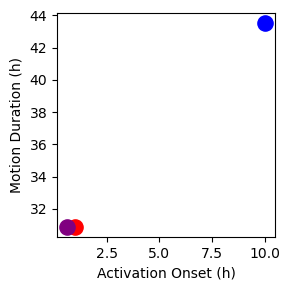

In [47]:
# Plot the motion duration for each protein at 80 nM DNA vs activation onset
plt.figure(figsize=(3, 3))
for protein in proteins_group2:
    if protein in activation_onset_data:
        onset, _ = activation_onset_data[protein]
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80')]
        motion_duration = protein_data['time (h)'].max() - protein_data['time (h)'].min()
        plt.scatter(onset, motion_duration, label=f'Protein {protein}', s=120, color=colors[protein])  # Use specified colors

plt.xlabel('Activation Onset (h)')
plt.ylabel('Motion Duration (h)')

plt.yscale('linear')  # Set y-axis to linear scale
plt.savefig('../../../../Downloads/motion_duration_vs_onset.svg', format='svg')

plt.tight_layout()
plt.show()

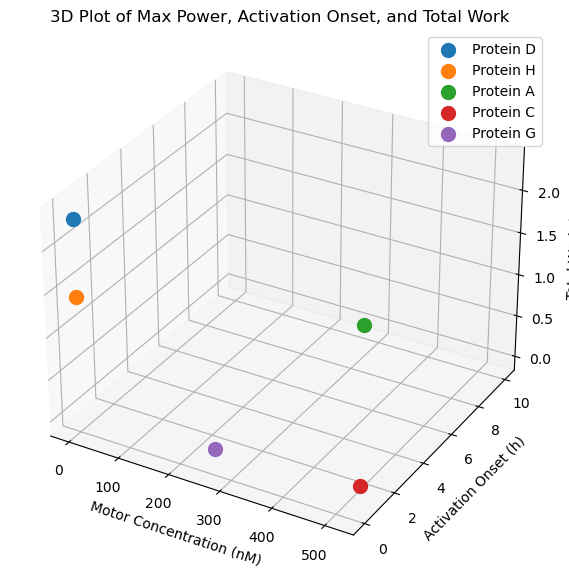

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define the proteins to analyze
proteins_group1 = ['D', 'H']
proteins_group2 = ['A', 'C', 'G']

# Prepare dictionaries to store the data
max_power_data = {}
activation_onset_data = {}

# Function to determine activation onset based on velocity magnitude
def find_activation_onset(protein_data):
    velocity_diff = np.diff(protein_data['velocity magnitude [m/s]_mean'])
    onset_index = np.where(velocity_diff > 0)[0]
    if len(onset_index) > 0:
        return protein_data.iloc[onset_index[0]]['time (h)']
    else:
        return None

# Analyze proteins D and H
for protein in proteins_group1:
    protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0) & (df['time (h)'] <= 1.5)]
    protein_data = protein_data.dropna(subset=['power [W]_mean', 'velocity magnitude [m/s]_mean'])
    
    # Max power and concentration
    max_power = protein_data['power [W]_mean'].max()
    max_concentration = protein_data.loc[protein_data['power [W]_mean'].idxmax(), 'Protein Concentration_nM']
    max_power_data[protein] = (max_concentration, max_power)
    
    # Activation onset and total work
    activation_onset = find_activation_onset(protein_data)
    total_work = protein_data['work [J]_mean'].sum()
    if activation_onset is not None:
        activation_onset_data[protein] = (activation_onset, total_work)

# Analyze proteins A, C, and G
for protein in proteins_group2:
    if protein == 'A':
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 10) & (df['time (h)'] <= 30)]
    elif protein == 'C':
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 1) & (df['time (h)'] <= 26)]
    elif protein == 'G':
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0.6) & (df['time (h)'] <= 20)]
    
    protein_data = protein_data.dropna(subset=['power [W]_mean', 'velocity magnitude [m/s]_mean'])
    
    # Max power and concentration
    max_power = protein_data['power [W]_mean'].max()
    max_concentration = protein_data.loc[protein_data['power [W]_mean'].idxmax(), 'Protein Concentration_nM']
    max_power_data[protein] = (max_concentration, max_power)
    
    # Activation onset and total work
    activation_onset = find_activation_onset(protein_data)
    total_work = protein_data['power [W]_mean'].sum()
    if activation_onset is not None:
        activation_onset_data[protein] = (activation_onset, total_work)

# Create 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot data
for protein in max_power_data.keys():
    concentration, max_power = max_power_data[protein]
    onset, total_work = activation_onset_data.get(protein, (None, None))
    if onset is not None:
        ax.scatter(concentration, onset, total_work, label=f'Protein {protein}', s=100)

ax.set_xlabel('Motor Concentration (nM)')
ax.set_ylabel('Activation Onset (h)')
ax.set_zlabel('Total Work (J)')
ax.set_title('3D Plot of Max Power, Activation Onset, and Total Work')
# ax.set_yscale('log')  # Set total work axis to log scale
ax.legend()
plt.show()

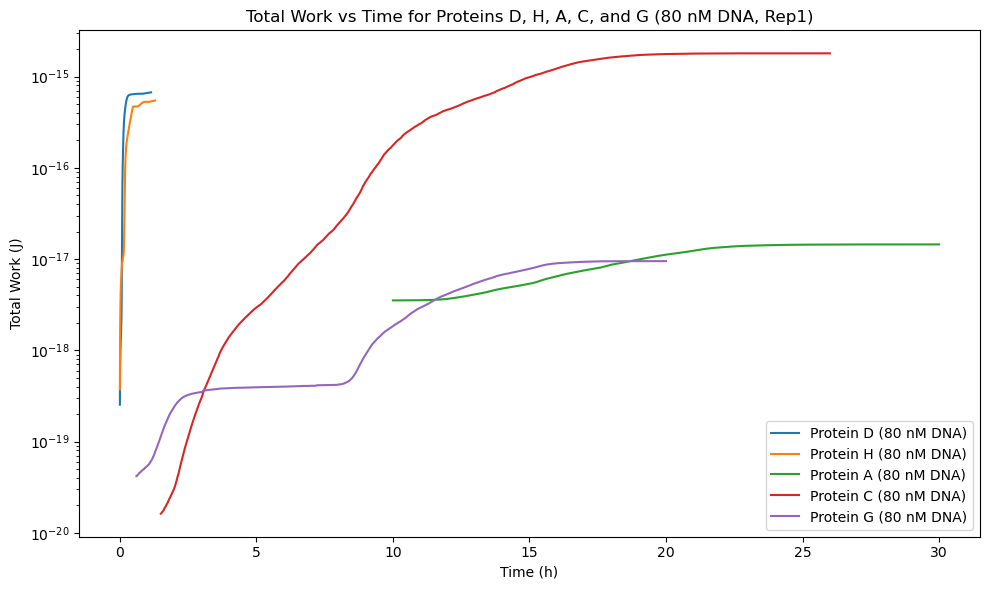

In [49]:
import matplotlib.pyplot as plt

# Define the proteins to analyze
proteins_group1 = ['D', 'H']
proteins_group2 = ['A', 'C', 'G']

# Combine plots for proteins D, H, A, C, and G
plt.figure(figsize=(10, 6))

# Plot for proteins D and H
for protein in proteins_group1:
    # Filter data for the current protein, 80 nM DNA, Rep1 subcondition, and time range 0 to 1.5 hours (90 min)
    protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0) & (df['time (h)'] <= 1.5)]
    
    # Drop NaN values in the work data
    protein_80nm_data = protein_80nm_data.dropna(subset=['work [J]_mean'])
    
    # Plot total work vs time for the current protein with 80 nM DNA
    plt.plot(protein_80nm_data['Time_h'], protein_80nm_data['work [J]_mean'], linestyle='-', label=f'Protein {protein} (80 nM DNA)')

# Plot for proteins A, C, and G
for protein in proteins_group2:
    if protein == 'A':
        # Filter data for protein A, 80 nM DNA, Rep1 subcondition, and time range 1 to 5 hours
        protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 10) & (df['time (h)'] <= 30)]
    elif protein == 'C':
        # Filter data for protein C, 80 nM DNA, Rep1 subcondition, and time range 1.5 to 5 hours
        protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 1.5) & (df['time (h)'] <= 26)]
    elif protein == 'G':
        # Filter data for protein G, 80 nM DNA, Rep1 subcondition, and time range 1.5 to 20 hours
        protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0.6) & (df['time (h)'] <= 20)]
    
    # Drop NaN values in the work data
    protein_80nm_data = protein_80nm_data.dropna(subset=['work [J]_mean'])
    
    # Plot total work vs time for the current protein with 80 nM DNA
    plt.plot(protein_80nm_data['Time_h'], protein_80nm_data['work [J]_mean'], linestyle='-', label=f'Protein {protein} (80 nM DNA)')

plt.xlabel('Time (h)')
plt.ylabel('Total Work (J)')
plt.title('Total Work vs Time for Proteins D, H, A, C, and G (80 nM DNA, Rep1)')
plt.legend()
plt.yscale('log')  # Set y-axis to log scale
plt.tight_layout()
plt.show()


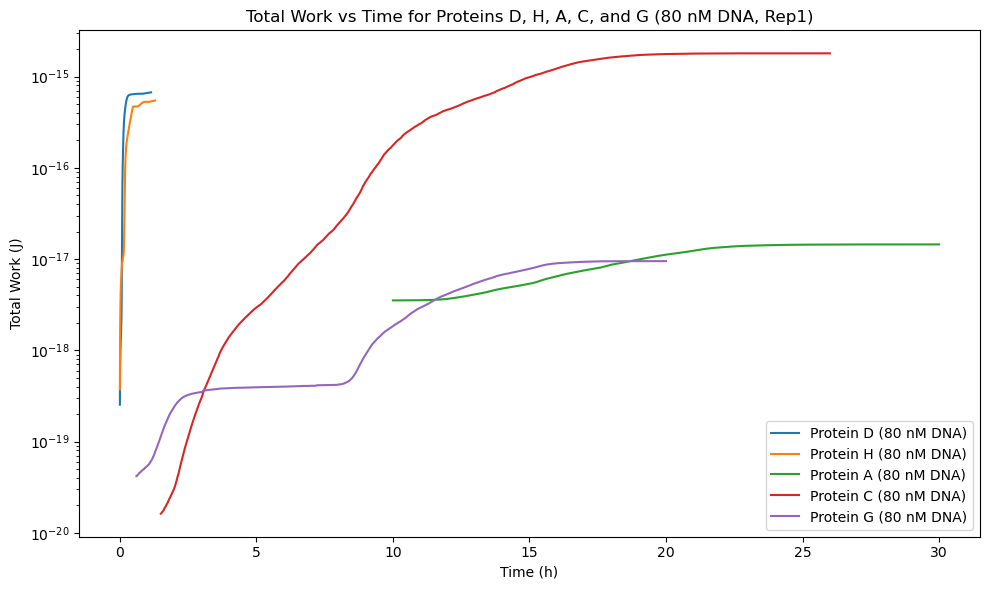

In [50]:
import matplotlib.pyplot as plt

# Define the proteins to analyze
proteins_group1 = ['D', 'H']
proteins_group2 = ['A', 'C', 'G']

# Combine plots for proteins D, H, A, C, and G
plt.figure(figsize=(10, 6))

# Plot for proteins D and H
for protein in proteins_group1:
    # Filter data for the current protein, 80 nM DNA, Rep1 subcondition, and time range 0 to 1.5 hours (90 min)
    protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0) & (df['time (h)'] <= 1.5)]
    
    # Drop NaN values in the work data
    protein_80nm_data = protein_80nm_data.dropna(subset=['work [J]_mean'])
    
    # Plot total work vs time for the current protein with 80 nM DNA
    plt.plot(protein_80nm_data['Time_h'], protein_80nm_data['work [J]_mean'], linestyle='-', label=f'Protein {protein} (80 nM DNA)')

# Plot for proteins A, C, and G
for protein in proteins_group2:
    if protein == 'A':
        # Filter data for protein A, 80 nM DNA, Rep1 subcondition, and time range 1 to 5 hours
        protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 10) & (df['time (h)'] <= 30)]
    elif protein == 'C':
        # Filter data for protein C, 80 nM DNA, Rep1 subcondition, and time range 1.5 to 5 hours
        protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 1.5) & (df['time (h)'] <= 26)]
    elif protein == 'G':
        # Filter data for protein G, 80 nM DNA, Rep1 subcondition, and time range 1.5 to 20 hours
        protein_80nm_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0.6) & (df['time (h)'] <= 20)]
    
    # Drop NaN values in the work data
    protein_80nm_data = protein_80nm_data.dropna(subset=['work [J]_mean'])
    
    # Plot total work vs time for the current protein with 80 nM DNA
    plt.plot(protein_80nm_data['Time_h'], protein_80nm_data['work [J]_mean'], linestyle='-', label=f'Protein {protein} (80 nM DNA)')

plt.xlabel('Time (h)')
plt.ylabel('Total Work (J)')
plt.title('Total Work vs Time for Proteins D, H, A, C, and G (80 nM DNA, Rep1)')
plt.legend()
plt.yscale('log')  # Set y-axis to log scale
plt.tight_layout()
plt.show()


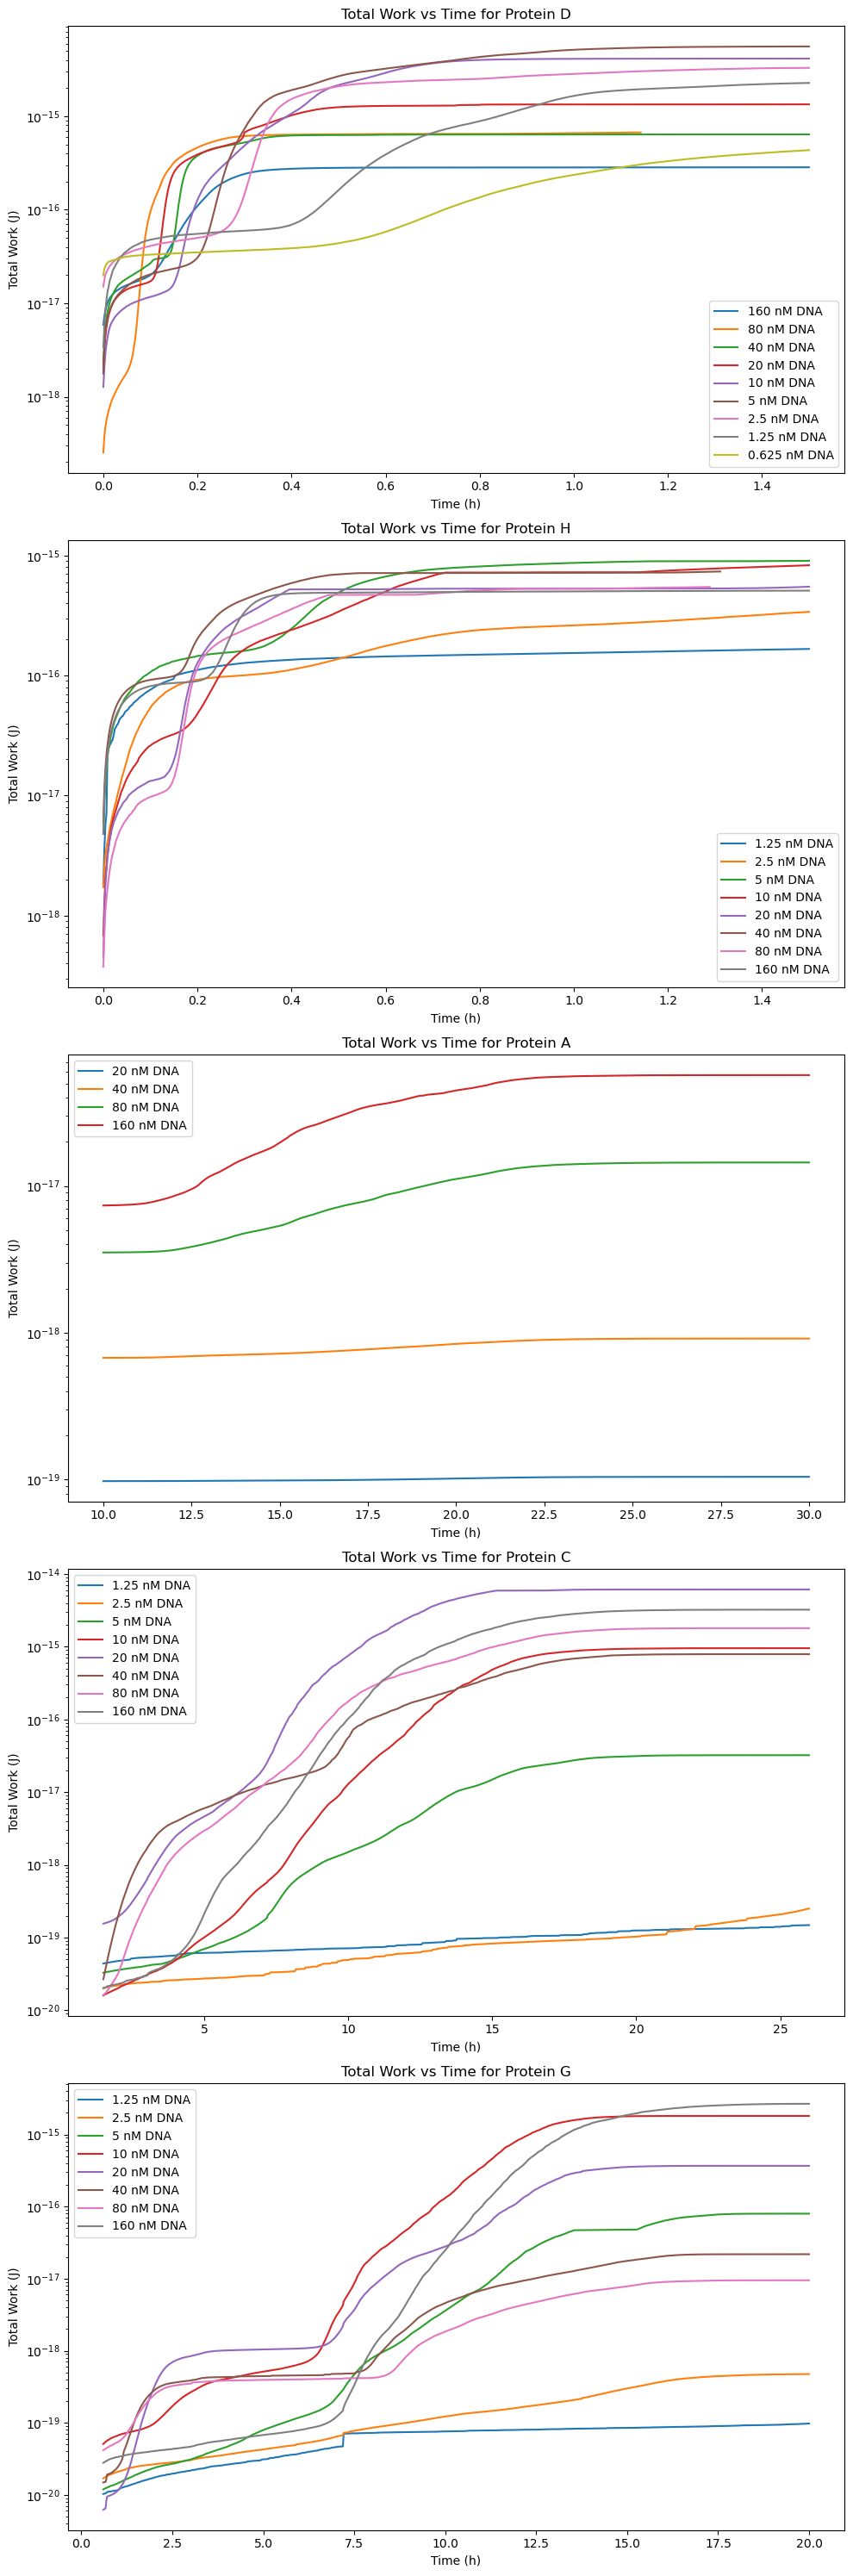

In [51]:
import matplotlib.pyplot as plt

# Define the proteins to analyze
proteins = ['D', 'H', 'A', 'C', 'G']

# Create 5 subplots for each protein
fig, axs = plt.subplots(5, 1, figsize=(10, 30))

# Iterate over each protein and create a subplot
for i, protein in enumerate(proteins):
    ax = axs[i]
    
    # Filter data for the current protein, specific time range, and drop NaN values in the work data
    if protein == 'D' or protein == 'H':
        protein_data = df[(df['protein'] == protein) & (df['time (h)'] >= 0) & (df['time (h)'] <= 1.5)].dropna(subset=['work [J]_mean'])
    elif protein == 'A':
        protein_data = df[(df['protein'] == protein) & (df['time (h)'] >= 10) & (df['time (h)'] <= 30)].dropna(subset=['work [J]_mean'])
    elif protein == 'C':
        protein_data = df[(df['protein'] == protein) & (df['time (h)'] >= 1.5) & (df['time (h)'] <= 26)].dropna(subset=['work [J]_mean'])
    elif protein == 'G':
        protein_data = df[(df['protein'] == protein) & (df['time (h)'] >= 0.6) & (df['time (h)'] <= 20)].dropna(subset=['work [J]_mean'])
    
    # Plot total work vs time for all DNA concentrations
    for dna_concentration in protein_data['DNA nM'].unique():
        dna_data = protein_data[protein_data['DNA nM'] == dna_concentration]
        ax.plot(dna_data['Time_h'], dna_data['work [J]_mean'], linestyle='-', label=f'{dna_concentration} nM DNA')
    
    ax.set_xlabel('Time (h)')
    ax.set_ylabel('Total Work (J)')
    ax.set_title(f'Total Work vs Time for Protein {protein}')
    ax.legend()
    ax.set_yscale('log')  # Set y-axis to log scale

plt.tight_layout()
plt.show()


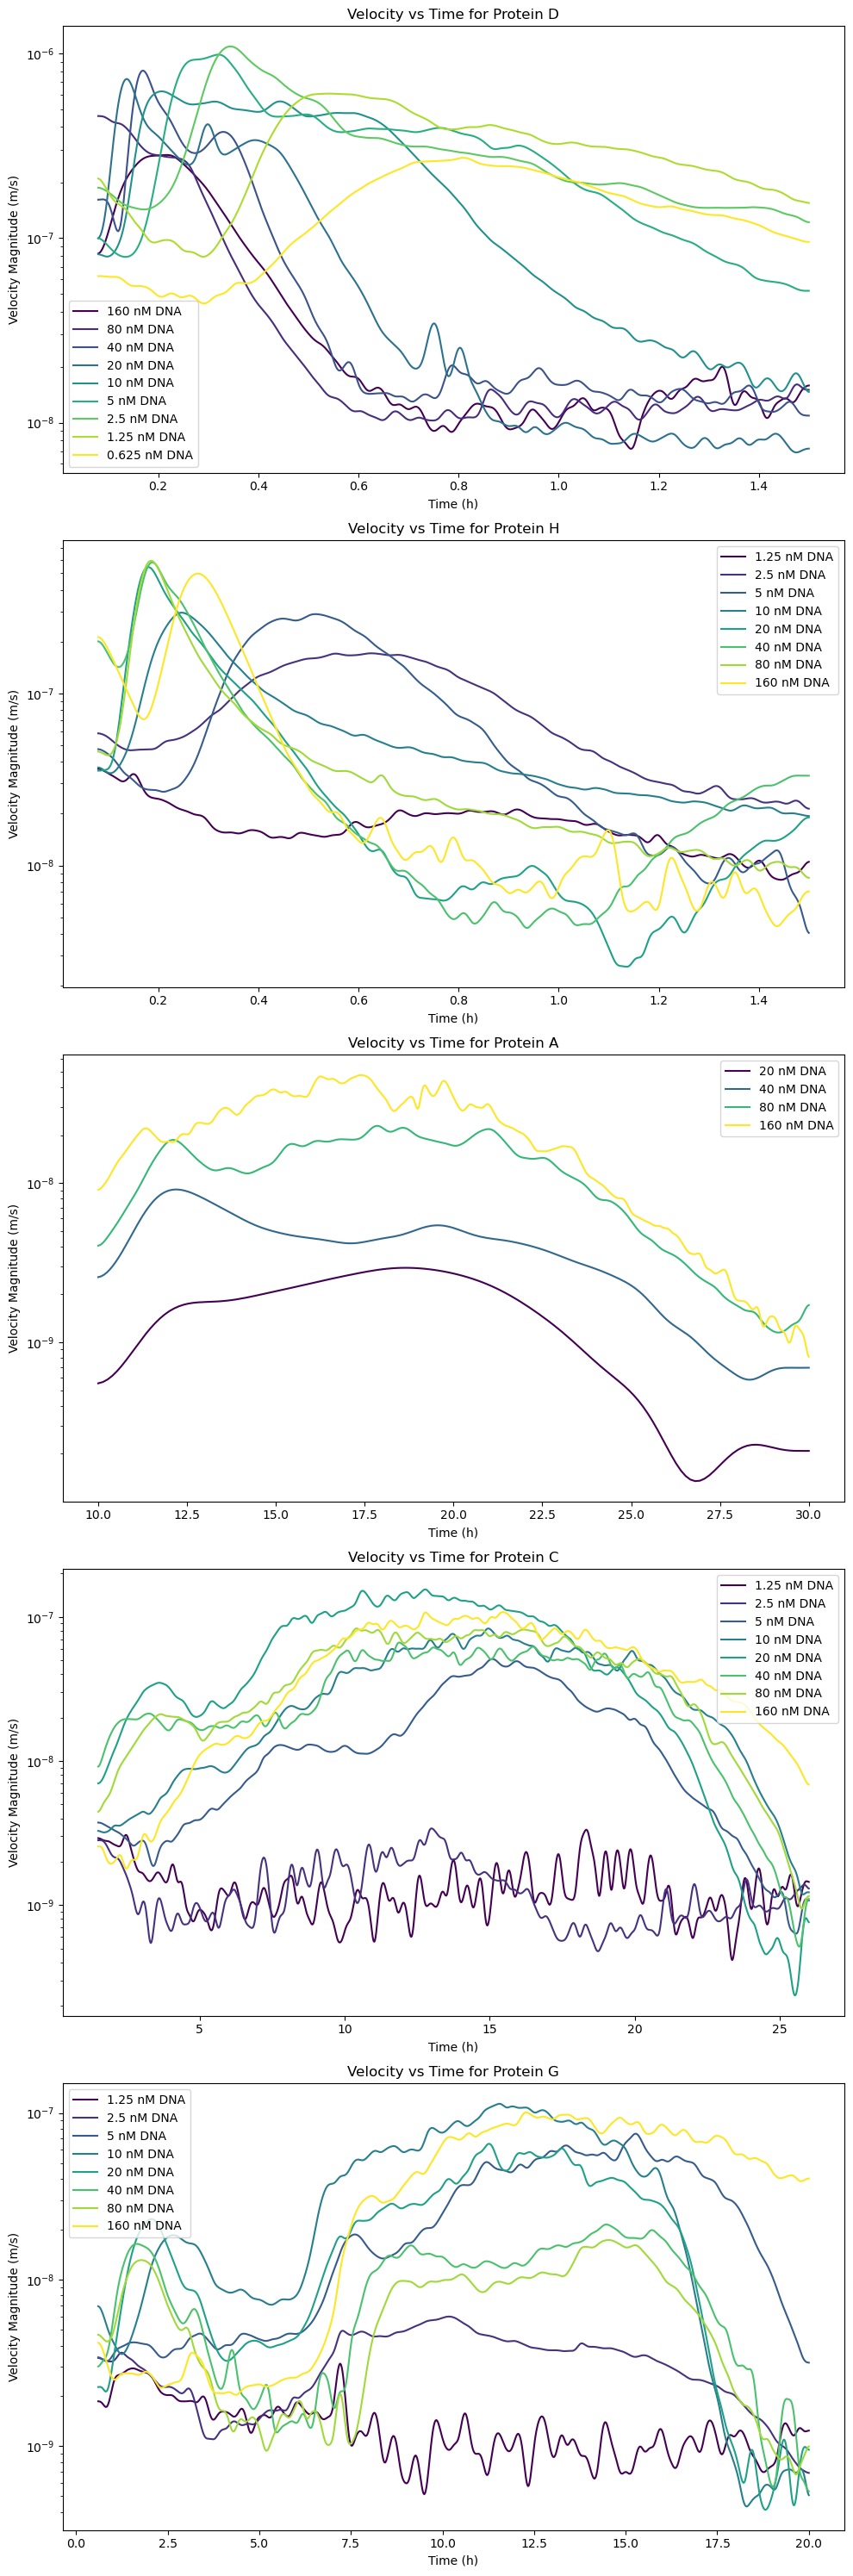

In [52]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import matplotlib.cm as cm

# Define the proteins to analyze
proteins = ['D', 'H', 'A', 'C', 'G']

# Create 5 subplots for each protein
fig, axs = plt.subplots(5, 1, figsize=(10, 30))

# Iterate over each protein and create a subplot
for i, protein in enumerate(proteins):
    ax = axs[i]
    
    # Filter data for the current protein, specific time range, and drop NaN values in the velocity data
    if protein == 'D' or protein == 'H':
        protein_data = df[(df['protein'] == protein) & (df['time (h)'] >= 0.08) & (df['time (h)'] <= 1.5)].dropna(subset=['velocity magnitude [m/s]_mean'])
    elif protein == 'A':
        protein_data = df[(df['protein'] == protein) & (df['time (h)'] >= 10) & (df['time (h)'] <= 30)].dropna(subset=['velocity magnitude [m/s]_mean'])
    elif protein == 'C':
        protein_data = df[(df['protein'] == protein) & (df['time (h)'] >= 1.5) & (df['time (h)'] <= 26)].dropna(subset=['velocity magnitude [m/s]_mean'])
    elif protein == 'G':
        protein_data = df[(df['protein'] == protein) & (df['time (h)'] >= 0.6) & (df['time (h)'] <= 20)].dropna(subset=['velocity magnitude [m/s]_mean'])
    
    # Plot velocity vs time for all DNA concentrations
    unique_dna_concentrations = protein_data['DNA nM'].unique()
    colors = cm.viridis(np.linspace(0, 1, len(unique_dna_concentrations)))
    
    for color, dna_concentration in zip(colors, unique_dna_concentrations):
        dna_data = protein_data[protein_data['DNA nM'] == dna_concentration]
        # Apply Gaussian filter with sigma=5
        smoothed_velocity = gaussian_filter1d(dna_data['velocity magnitude [m/s]_mean'], sigma=5)
        ax.plot(dna_data['Time_h'], smoothed_velocity, linestyle='-', label=f'{dna_concentration} nM DNA', color=color)
    
    ax.set_xlabel('Time (h)')
    ax.set_ylabel('Velocity Magnitude (m/s)')
    ax.set_title(f'Velocity vs Time for Protein {protein}')
    ax.legend()
    ax.set_yscale('log')  # Set y-axis to log scale

plt.tight_layout()
plt.show()


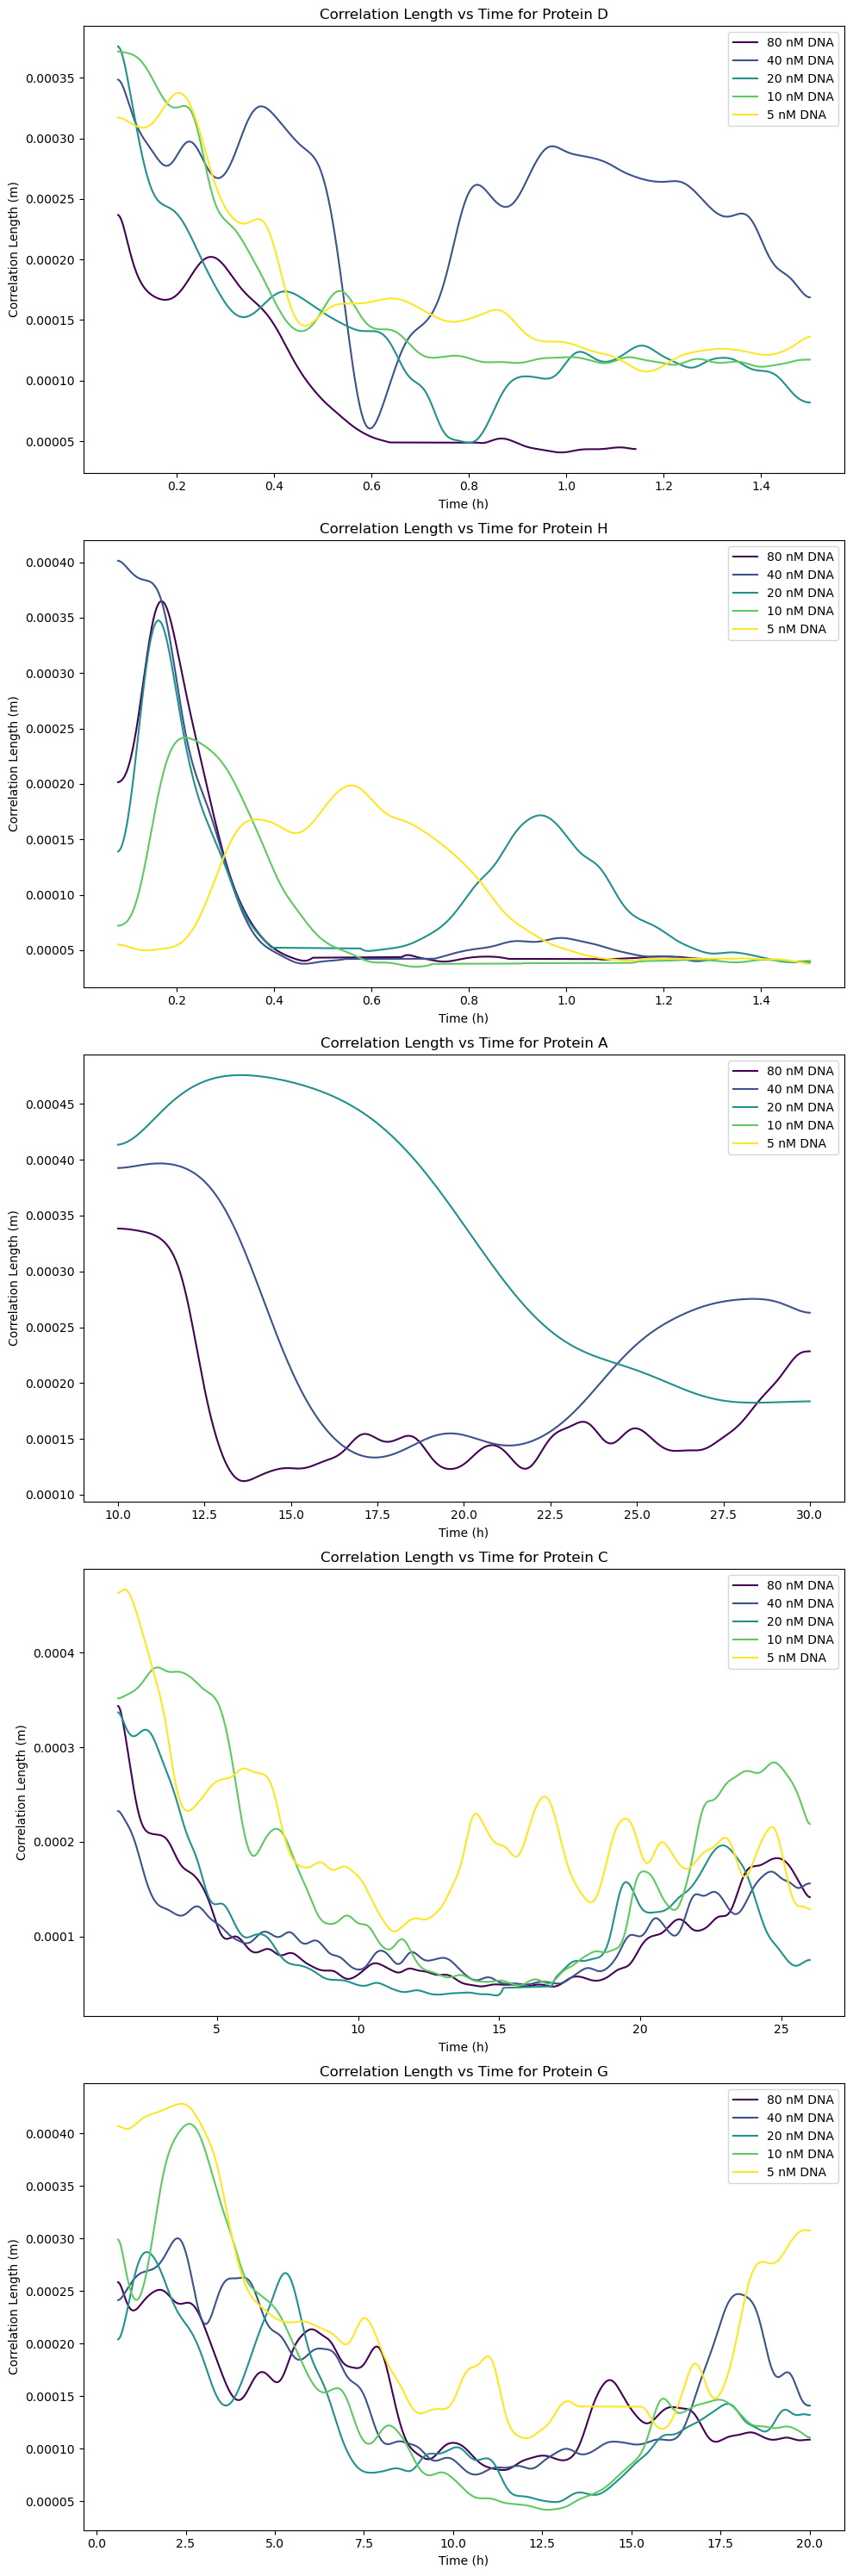

In [53]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import matplotlib.cm as cm

# Define the proteins to analyze
proteins = ['D', 'H', 'A', 'C', 'G']

# Create 5 subplots for each protein
fig, axs = plt.subplots(5, 1, figsize=(10, 30))

# Iterate over each protein and create a subplot
for i, protein in enumerate(proteins):
    ax = axs[i]
    
    # Filter data for the current protein, specific time range, and drop NaN values in the correlation length data
    if protein == 'D' or protein == 'H':
        protein_data = df[(df['protein'] == protein) & (df['time (h)'] >= 0.08) & (df['time (h)'] <= 1.5)].dropna(subset=['correlation length [m]_mean'])
    elif protein == 'A':
        protein_data = df[(df['protein'] == protein) & (df['time (h)'] >= 10) & (df['time (h)'] <= 30)].dropna(subset=['correlation length [m]_mean'])
    elif protein == 'C':
        protein_data = df[(df['protein'] == protein) & (df['time (h)'] >= 1.5) & (df['time (h)'] <= 26)].dropna(subset=['correlation length [m]_mean'])
    elif protein == 'G':
        protein_data = df[(df['protein'] == protein) & (df['time (h)'] >= 0.6) & (df['time (h)'] <= 20)].dropna(subset=['correlation length [m]_mean'])
    
    # Plot correlation length vs time for specific DNA concentrations (20, 10, and 5 nM)
    specific_dna_concentrations = ['80', '40','20', '10', '5']
    colors = cm.viridis(np.linspace(0, 1, len(specific_dna_concentrations)))
    
    for color, dna_concentration in zip(colors, specific_dna_concentrations):
        dna_data = protein_data[protein_data['DNA nM'] == dna_concentration]
        # Apply Gaussian filter with sigma=5
        smoothed_correlation_length = gaussian_filter1d(dna_data['correlation length [m]_mean'], sigma=5)
        ax.plot(dna_data['Time_h'], smoothed_correlation_length, linestyle='-', label=f'{dna_concentration} nM DNA', color=color)
    
    ax.set_xlabel('Time (h)')
    ax.set_ylabel('Correlation Length (m)')
    ax.set_title(f'Correlation Length vs Time for Protein {protein}')
    ax.legend()
    # ax.set_yscale('log')  # Set y-axis to log scale

plt.tight_layout()
plt.show()


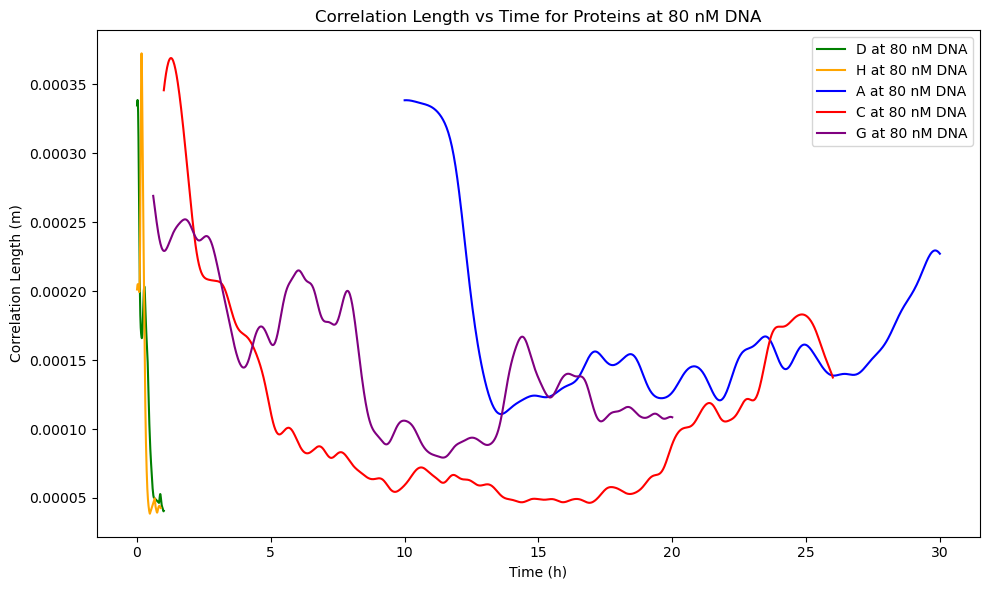

In [54]:
# Plot correlation length for each protein at 80nM DNA concentration over time in a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for each protein
protein_colors = {
    'A': 'blue',
    'C': 'red',
    'D': 'green',
    'G': 'purple',
    'H': 'orange'
}

for protein in proteins:
    # Filter data for the current protein, 80 nM DNA concentration, and specific time range
    if protein == 'A':
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 10) & (df['time (h)'] <= 30)]
    elif protein == 'C':
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 1) & (df['time (h)'] <= 26)]
    elif protein == 'D':
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0) & (df['time (h)'] <= 1)]
    elif protein == 'G':
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0.6) & (df['time (h)'] <= 20)]
    elif protein == 'H':
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0) & (df['time (h)'] <= 1)]
    
    # Drop NaN values in the correlation length data
    protein_data = protein_data.dropna(subset=['correlation length [m]_mean'])
    
    # Plot correlation length vs time
    ax.plot(protein_data['Time_h'], protein_data['correlation length [m]_mean'], linestyle='-', color=protein_colors[protein], label=f'{protein} at 80 nM DNA')

ax.set_xlabel('Time (h)')
ax.set_ylabel('Correlation Length (m)')
ax.set_title('Correlation Length vs Time for Proteins at 80 nM DNA')
ax.legend()
# x
plt.tight_layout()
plt.show()


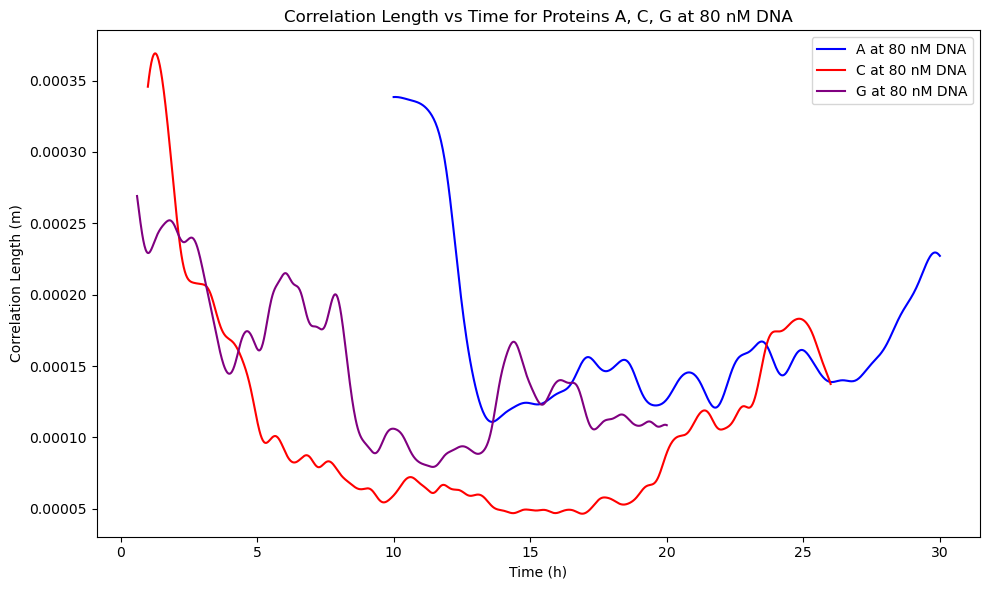

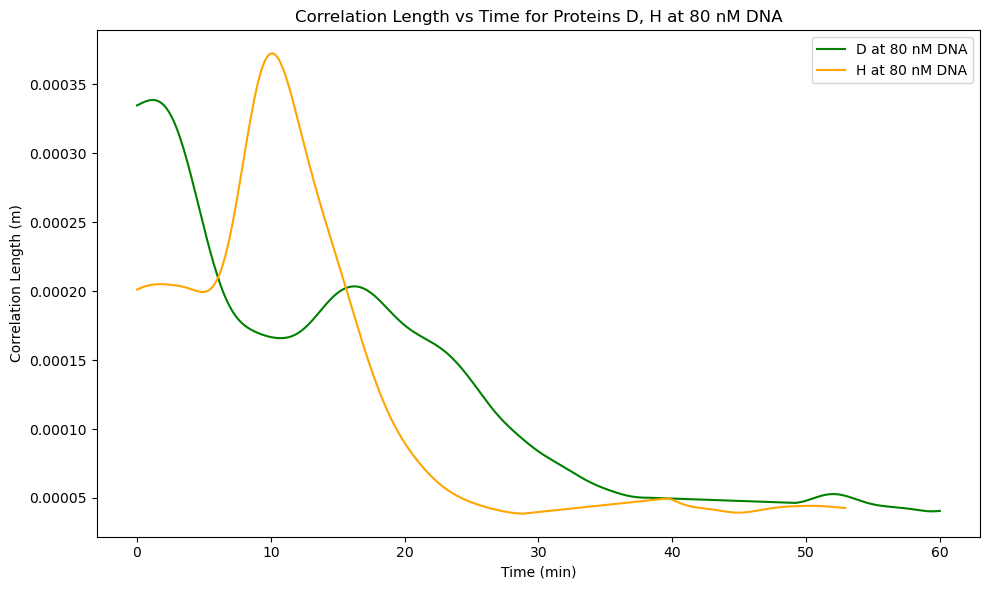

In [55]:
# Plot correlation length for proteins A, C, G at 80nM DNA concentration over time in hours
fig, ax1 = plt.subplots(figsize=(10, 6))

# Define colors for each protein
protein_colors = {
    'A': 'blue',
    'C': 'red',
    'D': 'green',
    'G': 'purple',
    'H': 'orange'
}

# Plot for proteins A, C, G
for protein in ['A', 'C', 'G']:
    # Filter data for the current protein, 80 nM DNA concentration, and specific time range
    if protein == 'A':
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 10) & (df['time (h)'] <= 30)]
    elif protein == 'C':
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 1) & (df['time (h)'] <= 26)]
    elif protein == 'G':
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0.6) & (df['time (h)'] <= 20)]
    
    # Drop NaN values in the correlation length data
    protein_data = protein_data.dropna(subset=['correlation length [m]_mean'])
    
    # Plot correlation length vs time
    ax1.plot(protein_data['Time_h'], protein_data['correlation length [m]_mean'], linestyle='-', color=protein_colors[protein], label=f'{protein} at 80 nM DNA')

ax1.set_xlabel('Time (h)')
ax1.set_ylabel('Correlation Length (m)')
ax1.set_title('Correlation Length vs Time for Proteins A, C, G at 80 nM DNA')
ax1.legend()
plt.tight_layout()
plt.savefig('../../../../Downloads/correlation_length_proteins_A_C_G.svg', format='svg')
plt.show()

# Plot correlation length for proteins D, H at 80nM DNA concentration over time in minutes
fig, ax2 = plt.subplots(figsize=(10, 6))

# Plot for proteins D, H
for protein in ['D', 'H']:
    # Filter data for the current protein, 80 nM DNA concentration, and specific time range
    if protein == 'D':
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0) & (df['time (h)'] <= 1)]
    elif protein == 'H':
        protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80') & (df['time (h)'] >= 0) & (df['time (h)'] <= 1)]
    
    # Convert time from hours to minutes
    protein_data['Time_min'] = protein_data['Time_h'] * 60
    
    # Drop NaN values in the correlation length data
    protein_data = protein_data.dropna(subset=['correlation length [m]_mean'])
    
    # Plot correlation length vs time
    ax2.plot(protein_data['Time_min'], protein_data['correlation length [m]_mean'], linestyle='-', color=protein_colors[protein], label=f'{protein} at 80 nM DNA')

ax2.set_xlabel('Time (min)')
ax2.set_ylabel('Correlation Length (m)')
ax2.set_title('Correlation Length vs Time for Proteins D, H at 80 nM DNA')
ax2.legend()
plt.tight_layout()
plt.savefig('../../../../Downloads/correlation_length_proteins_D_H.svg', format='svg')
plt.show()


In [220]:
df

condition subcondition  time (s)  Time_min     Time_h  \
0       K401_0p625nM-RT         Rep1         0      0.00   0.000000   
1       K401_0p625nM-RT         Rep1        60      1.00   0.016667   
2       K401_0p625nM-RT         Rep1       120      2.00   0.033333   
3       K401_0p625nM-RT         Rep1       180      3.00   0.050000   
4       K401_0p625nM-RT         Rep1       240      4.00   0.066667   
...                 ...          ...       ...       ...        ...   
128080         negative         Rep1    111000   1850.00  30.833333   
128081         negative         Rep1    111075   1851.25  30.854167   
128082         negative         Rep1    111150   1852.50  30.875000   
128083         negative         Rep1    111225   1853.75  30.895833   
128084         negative         Rep1    111300   1855.00  30.916667   

        Mean Intensity  Protein Concentration_ng_ul  Protein Concentration_nM  \
0            10.795248                     1.376854                 30.630794   
1            10.763086                     1.372752                 30.539536   
2            10.526032                     1.342518                 29.866912   
3            10.755514                     1.371786                 30.518051   
4            10.683785                     1.362638                 30.314526   
...                ...                          ...                       ...   
128080        0.000000                     0.000000                  0.000000   
128081        0.000000                     0.000000                  0.000000   
128082        0.000000                     0.000000                  0.000000   
128083        0.000000                     0.000000                  0.000000   
128084        0.000000                     0.000000                  0.000000   

        Number of Protein Molecules  \
0                      3.675695e+10   
1                      3.664744e+10   
2                      3.584029e+10   
3                      3.662166e+10   
4                      3.637743e+10   
...                             ...   
128080                 0.000000e+00   
128081                 0.000000e+00   
128082                 0.000000e+00   
128083                 0.000000e+00   
128084                 0.000000e+00   

        Rate of Change of Protein Molecules per Second  ...  \
0                                                  NaN  ...   
1                                                  NaN  ...   
2                                                  NaN  ...   
3                                                  NaN  ...   
4                                                  NaN  ...   
...                                                ...  ...   
128080                                             0.0  ...   
128081                                             0.0  ...   
128082                                             0.0  ...   
128083                                             0.0  ...   
128084                                             0.0  ...   

        strain [1/s]_mean  vector direction [degrees]_mean  \
0                     NaN                              NaN   
1                     NaN                              NaN   
2                     NaN                              NaN   
3                     NaN                              NaN   
4                     NaN                              NaN   
...                   ...                              ...   
128080                NaN                              NaN   
128081                NaN                              NaN   
128082                NaN                              NaN   
128083                NaN                              NaN   
128084                NaN                              NaN   

        correlation length [m]_mean  distance [m]_mean  power [W]_mean  \
0                               NaN                NaN             NaN   
1                               NaN                NaN             Na

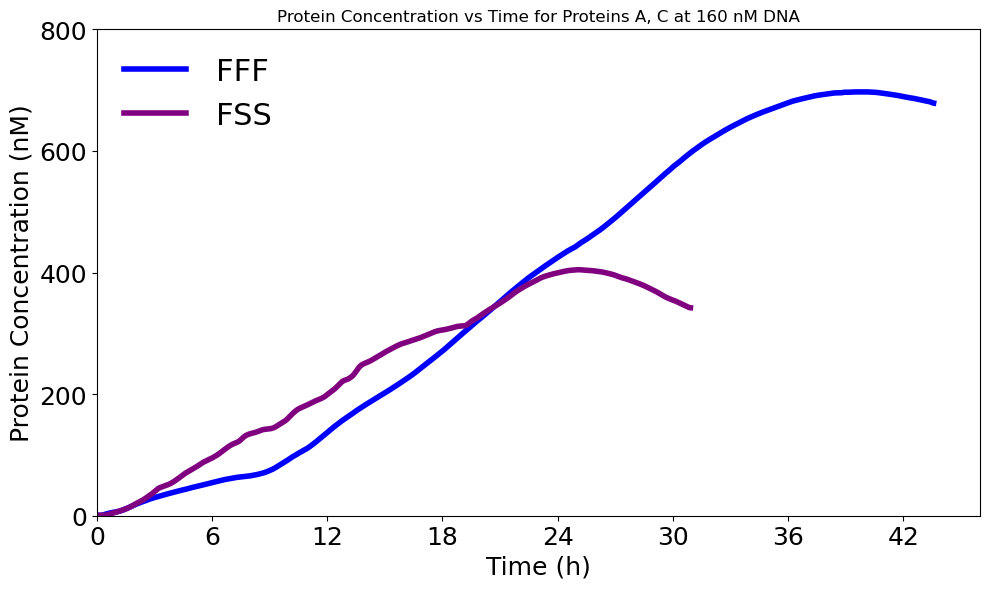

In [314]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Create a new figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))  # Ensure this size is consistent across both plots

# Plot for proteins A and C at 160 nM DNA concentration
for protein in ['A', 'G']:
    # Filter data for the current protein and 160 nM DNA concentration
    protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80')]
    
    # Drop NaN values in the protein concentration data
    protein_data = protein_data.dropna(subset=['Protein Concentration_nM'])
    
    # Apply Gaussian filter with sigma=5 to the protein concentration data
    smoothed_concentration = gaussian_filter1d(protein_data['Protein Concentration_nM'], sigma=5)
    
    # Plot smoothed protein concentration vs time with increased line width
    color = 'blue' if protein == 'A' else 'purple'
    label = 'FFF' if color == 'blue' else 'FSS'
    ax.plot(protein_data['Time_h'], smoothed_concentration, linestyle='-', linewidth=4, color=color, label=label)

ax.set_xlabel('Time (h)', fontsize=18)
ax.set_ylabel('Protein Concentration (nM)', fontsize=18)
ax.set_title('Protein Concentration vs Time for Proteins A, C at 160 nM DNA')
ax.set_ylim(0, 800)  # Set y-axis limits from 0 to 800
ax.set_yticks(range(0, 801, 200))  # Add ticks every 200 nM
ax.set_xlim(0, 46)  # Ensure x-axis starts at 0
ax.set_xticks(range(0, int(df['Time_h'].max()) + 1, 6))  # Set x ticks every 6 hours
ax.tick_params(axis='both', which='major', labelsize=18)
ax.legend(fontsize=22, frameon=False, handletextpad=1, handlelength=2)  # Removed linewidth argument
plt.tight_layout()
plt.savefig('../../../../Downloads/protein_concentration_A_G_160nM_DNA.svg', format='svg')
plt.show()


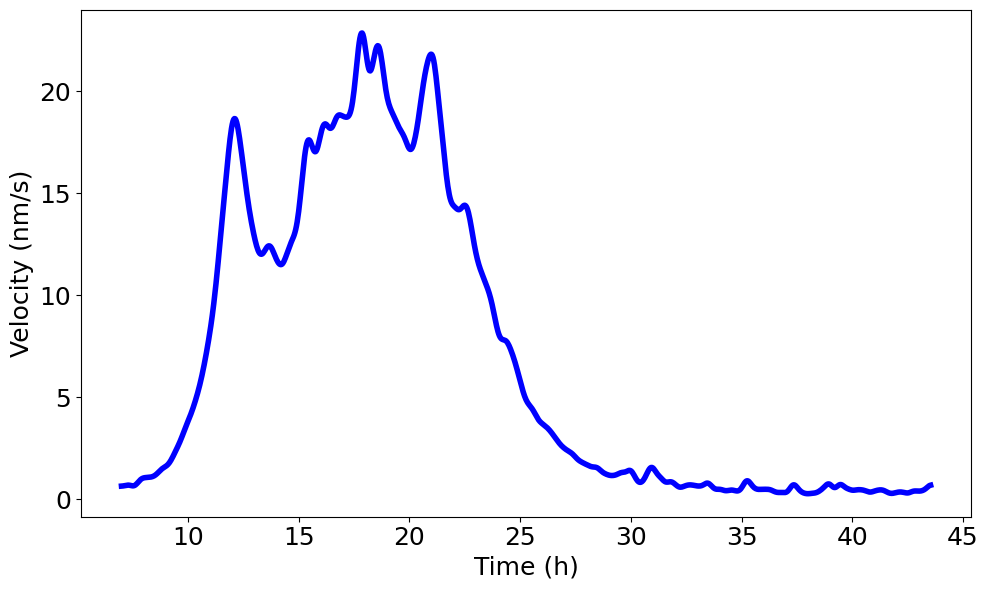

In [317]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Create a new figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))  # Ensure this size is consistent across both plots

# Plot for proteins A and G at 80 nM DNA concentration
for protein in ['A', ]:
    # Filter data for the current protein and 80 nM DNA concentration
    protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80')]
    
    # Start the datapoints from hour 7 for A and hour 0.7 for G
    if protein == 'A':
        protein_data = protein_data[protein_data['Time_h'] >= 7]
    else:
        protein_data = protein_data[protein_data['Time_h'] >= 0.8]
    
    # Drop NaN values in the velocity data
    protein_data = protein_data.dropna(subset=['velocity magnitude [m/s]_mean'])
    
    # Convert velocity from m/s to nm/s
    protein_data['velocity magnitude [nm/s]_mean'] = protein_data['velocity magnitude [m/s]_mean'] * 1e9
    
    # Apply Gaussian filter with sigma=5 to the velocity data
    smoothed_velocity = gaussian_filter1d(protein_data['velocity magnitude [nm/s]_mean'], sigma=5)
    
    # Plot smoothed velocity vs time with increased line width
    color = 'blue' if protein == 'A' else 'purple'
    label = 'FFF' if color == 'blue' else 'FSS'
    ax.plot(protein_data['Time_h'], smoothed_velocity, linestyle='-', linewidth=4, color=color, label=label)

ax.set_xlabel('Time (h)', fontsize=18)
ax.set_ylabel('Velocity (nm/s)', fontsize=18)
# ax.set_title('Velocity vs Time for Proteins A, G at 80 nM DNA')
# ax.set_ylim(0, 0.1)  # Adjust y-axis limits as needed
# ax.set_xlim(0, 46)  # Ensure x-axis starts at 0
# ax.set_xticks(range(0, int(df['Time_h'].max()) + 1, 6))  # Set x ticks every 6 hours
ax.tick_params(axis='both', which='major', labelsize=18)
# ax.legend(fontsize=22, frameon=False, handletextpad=1, handlelength=2)  # Removed linewidth argument
plt.tight_layout()
plt.savefig('../../../../Downloads/velocity_A_G_80nM_DNA.svg', format='svg')
plt.show()


In [176]:
# import matplotlib.pyplot as plt
# from scipy.ndimage import gaussian_filter1d

# # Create a new figure for the plot
# fig, ax = plt.subplots(figsize=(10, 6))  # Ensure this size is consistent across both plots

# # Plot for proteins A and C at 160 nM DNA concentration
# for protein in ['A', 'C']:
#     # Filter data for the current protein and 160 nM DNA concentration
#     protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '160')]
    
#     # Start the datapoints from the hour 7 for A and hour 2 for C, and end at hour 30 for both
#     if protein == 'A':
#         protein_data = protein_data[(protein_data['Time_h'] >= 7) & (protein_data['Time_h'] <= 30)]
#     else:
#         protein_data = protein_data[(protein_data['Time_h'] >= 2) & (protein_data['Time_h'] <= 30)]
    
#     # Drop NaN values in the velocity data
#     protein_data = protein_data.dropna(subset=['velocity magnitude [m/s]_mean'])
    
#     # Apply Gaussian filter with sigma=5 to the velocity data
#     smoothed_velocity = gaussian_filter1d(protein_data['velocity magnitude [m/s]_mean'], sigma=5)
    
#     # Plot smoothed velocity vs protein concentration with increased line width
#     color = 'blue' if protein == 'A' else 'red'
#     label = 'FFF' if color == 'blue' else 'FSF'
#     ax.plot(protein_data['Protein Concentration_nM'], smoothed_velocity, linestyle='-', linewidth=4, color=color, label=label)

# ax.set_xlabel('Protein Concentration (nM)', fontsize=18)
# ax.set_ylabel('Velocity (m/s)', fontsize=18)
# ax.set_title('Velocity vs Protein Concentration for Proteins A, C at 160 nM DNA')
# plt.yscale('log')
# ax.tick_params(axis='both', which='major', labelsize=18)

# ax.legend(fontsize=22, frameon=False, handletextpad=1, handlelength=2)  # Removed linewidth argument
# plt.tight_layout()
# plt.savefig('../../../../Downloads/velocity_A_C_160nM_DNA.svg', format='svg')
# plt.show()


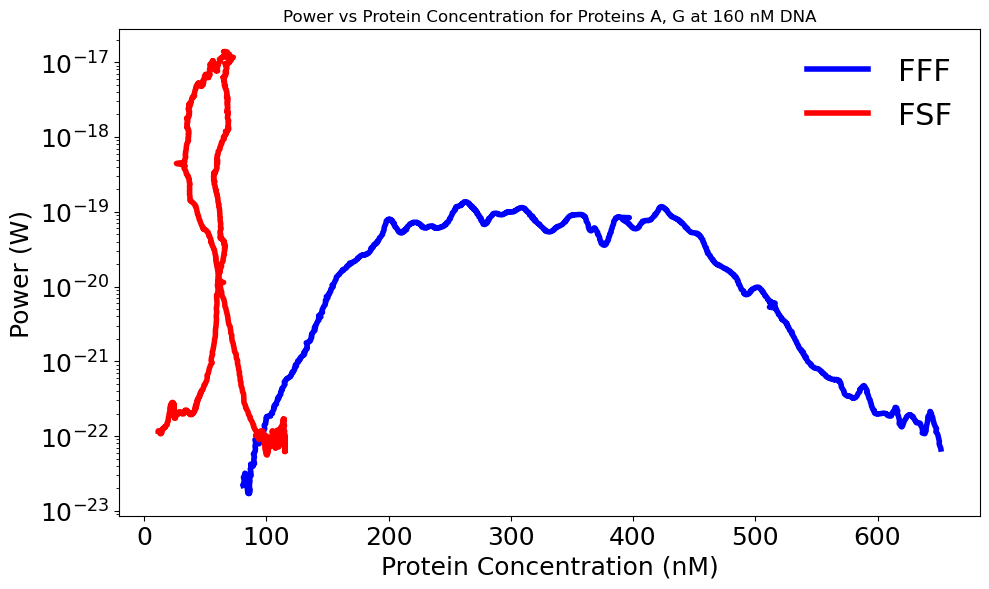

In [ ]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Create a new figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))  # Ensure this size is consistent across both plots

# Plot for proteins A and G at 160 nM DNA concentration
for protein in ['A', 'G']:
    # Filter data for the current protein and 160 nM DNA concentration
    protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '160')]
    
    # Start the datapoints from the hour 7 for A and hour 2 for G, and end at hour 30 for both
    if protein == 'A':
        protein_data = protein_data[(protein_data['Time_h'] >= 7) & (protein_data['Time_h'] <= 30)]
    else:
        protein_data = protein_data[(protein_data['Time_h'] >= 2) & (protein_data['Time_h'] <= 30)]
    
    # Drop NaN values in the power data
    protein_data = protein_data.dropna(subset=['power [W]_mean'])
    
    # Apply Gaussian filter with sigma=5 to the power data
    smoothed_power = gaussian_filter1d(protein_data['power [W]_mean'], sigma=5)
    
    # Plot smoothed power vs protein concentration with increased line width
    color = 'blue' if protein == 'A' else 'purple'
    label = 'FFF' if color == 'blue' else 'FSF'
    ax.plot(protein_data['Protein Concentration_nM'], smoothed_power, linestyle='-', linewidth=4, color=color, label=label)

ax.set_xlabel('Protein Concentration (nM)', fontsize=18)
ax.set_ylabel('Power (W)', fontsize=18)
ax.set_title('Power vs Protein Concentration for Proteins A, G at 160 nM DNA')
plt.yscale('log')
ax.tick_params(axis='both', which='major', labelsize=18)

ax.legend(fontsize=22, frameon=False, handletextpad=1, handlelength=2)  # Removed linewidth argument
plt.tight_layout()
plt.savefig('../../../../Downloads/power_A_G_160nM_DNA.svg', format='svg')
plt.show()


In [ ]:
df_heat['Protein Concentration_ng_ul'] = 7.84 * df_heat['Mean Intensity'] + 101.6
# df_heat['Protein Concentration_ng_ul'] = 31.34 * df_heat['Mean Intensity'] + 95.41 # recent
# df_heat['Protein Concentration_ng_ul'] = 27.41 * df_heat['Mean Intensity'] +
# 97.69

In [296]:
df_heat = pd.read_csv('../../../../Thomson Lab Dropbox/David Larios/activedrops/main/090124-chimeras100nM-29C/2p5ul_TMBmix-1ulDNA100nM_/output_data/merged_expression_PIV.csv')

# Split condition column and extract components
df_heat['protein'] = df_heat['condition'].str.split('_').str[0]

# Replace protein names
df_heat['protein'] = df_heat['protein'].replace({'K401': 'A', 'Kif3': 'H'})



# # Transform 'Mean Intensity' to 'Protein Concentration_nM' using the equation y = 7.84x + 101.6
# df_heat['Protein Concentration_ng_ul'] = (df_heat['Mean Intensity'] - 101.6) / 7.84
# # df_heat['Protein Concentration_ng_ul'] = 31.34 * df_heat['Mean Intensity'] + 95.41 # recent
# # df_heat['Protein Concentration_ng_ul'] = 27.41 * df_heat['Mean Intensity'] + 97.69

# # Transform 'Protein Concentration_ng_ul' to 'Protein Concentration_nM'
# kDa = 120
# df_heat['Protein Concentration_nM'] = df_heat['Protein Concentration_ng_ul'] * (1e6 / (kDa*1000)) 


df_heat

condition subcondition  time (s)     Time_min     Time_h  \
0         A-29C         Rep1         0     0.000000   0.000000   
1         A-29C         Rep1        40     0.666667   0.011111   
2         A-29C         Rep1        80     1.333333   0.022222   
3         A-29C         Rep1       120     2.000000   0.033333   
4         A-29C         Rep1       160     2.666667   0.044444   
...         ...          ...       ...          ...        ...   
18139  negative         Rep1     80440  1340.666667  22.344444   
18140  negative         Rep1     80480  1341.333333  22.355556   
18141  negative         Rep1     80520  1342.000000  22.366667   
18142  negative         Rep1     80560  1342.666667  22.377778   
18143  negative         Rep1     80600  1343.333333  22.388889   

       Mean Intensity  Protein Concentration_ng_ul  Protein Concentration_nM  \
0            0.839488                     0.030627                  0.688241   
1            0.000000                     0.000000                  0.000000   
2            1.004689                     0.036654                  0.823678   
3            0.875361                     0.031935                  0.717651   
4            0.947897                     0.034582                  0.777119   
...               ...                          ...                       ...   
18139        0.000000                     0.000000                  0.000000   
18140        0.000000                     0.000000                  0.000000   
18141        0.000000                     0.000000                  0.000000   
18142        0.000000                     0.000000                  0.000000   
18143        0.000000                     0.000000                  0.000000   

       Number of Protein Molecules  \
0                     8.258892e+08   
1                     0.000000e+00   
2                     9.884135e+08   
3                     8.611815e+08   
4                     9.325424e+08   
...                            ...   
18139                 0.000000e+00   
18140                 0.000000e+00   
18141                 0.000000e+00   
18142                 0.000000e+00   
18143                 0.000000e+00   

       Rate of Change of Protein Molecules per Second  ...  shear [1/s]_mean  \
0                                                 NaN  ...          0.000002   
1                                                 NaN  ...          0.000001   
2                                                 NaN  ...          0.000003   
3                                                 NaN  ...          0.000003   
4                                                 NaN  ...          0.000002   
...                                               ...  ...               ...   
18139                                             0.0  ...               NaN   
18140                                             0.0  ...               NaN   
18141                                             0.0  ...               NaN   
18142                                             0.0  ...               NaN   
18143                                             0.0  ...               NaN   

       strain [1/s]_mean  vector direction [degrees]_mean  \
0               0.000005                        17.980105   
1               0.000003                        -4.562390   
2               0.000002                       -24.170313   
3               0.000002                        40.904512   
4               0.000002                        41.345669   
...                  ...                              ...   
18139                NaN                              NaN   
18140                NaN                              NaN   
18141                NaN                              NaN   
18142                NaN                              NaN   
18143                NaN                              NaN   

       correlation length [m]_mean  distance [m]_mean  power [W]_mean  \
0                         0.

In [310]:
import pandas as pd

def calculate_protein_concentration(df, kDa_list, apply_correction=False):
    """
    Calculate protein concentration in ng/µL and nM for each condition in the DataFrame.

    Parameters:
    - df: pandas DataFrame containing the data with 'Mean Intensity' and 'condition' columns.
    - kDa_list: list of molecular weights (kDa) for each condition.
    - apply_correction: boolean indicating if a correction for GFP is needed.

    Returns:
    - df: DataFrame with added columns for 'Protein Concentration_ng_ul' and 'Protein Concentration_nM'.
    """
    # Ensure the kDa_list length matches the number of unique conditions
    unique_conditions = df['condition'].unique()
    if len(kDa_list) != len(unique_conditions):
        raise ValueError("The length of kDa_list must match the number of unique conditions in the DataFrame.")

    # Create a dictionary to map conditions to their respective kDa values
    condition_to_kDa = dict(zip(unique_conditions, kDa_list))

    # Calculate Protein Concentration in ng/µL
    df['Protein Concentration_ng_ul'] = (df['Mean Intensity'] - 97.69) / 27.41

    # Calculate Protein Concentration in nM
    df['Protein Concentration_nM'] = df.apply(
        lambda row: row['Protein Concentration_ng_ul'] * (1e6 / (condition_to_kDa[row['condition']] * 1000)),
        axis=1
    )

    # Apply correction if needed
    if apply_correction:
        df['Protein Concentration_nM'] *= df.apply(
            lambda row: 27 / (27 + condition_to_kDa[row['condition']]),
            axis=1
        )

    return df

# Example usage:
kDa_values = [120, 130, 140, 150, 160, 170, 180, 190, 200]  # Example kDa values for each condition
df_heat = calculate_protein_concentration(df_heat, kDa_values, apply_correction=True)

In [311]:
df_heat['condition'].unique()

array(['A-29C', 'B-29C', 'C-29C', 'D-29C', 'E-29C', 'F-29C', 'G-29C',
       'H-29C', 'negative'], dtype=object)

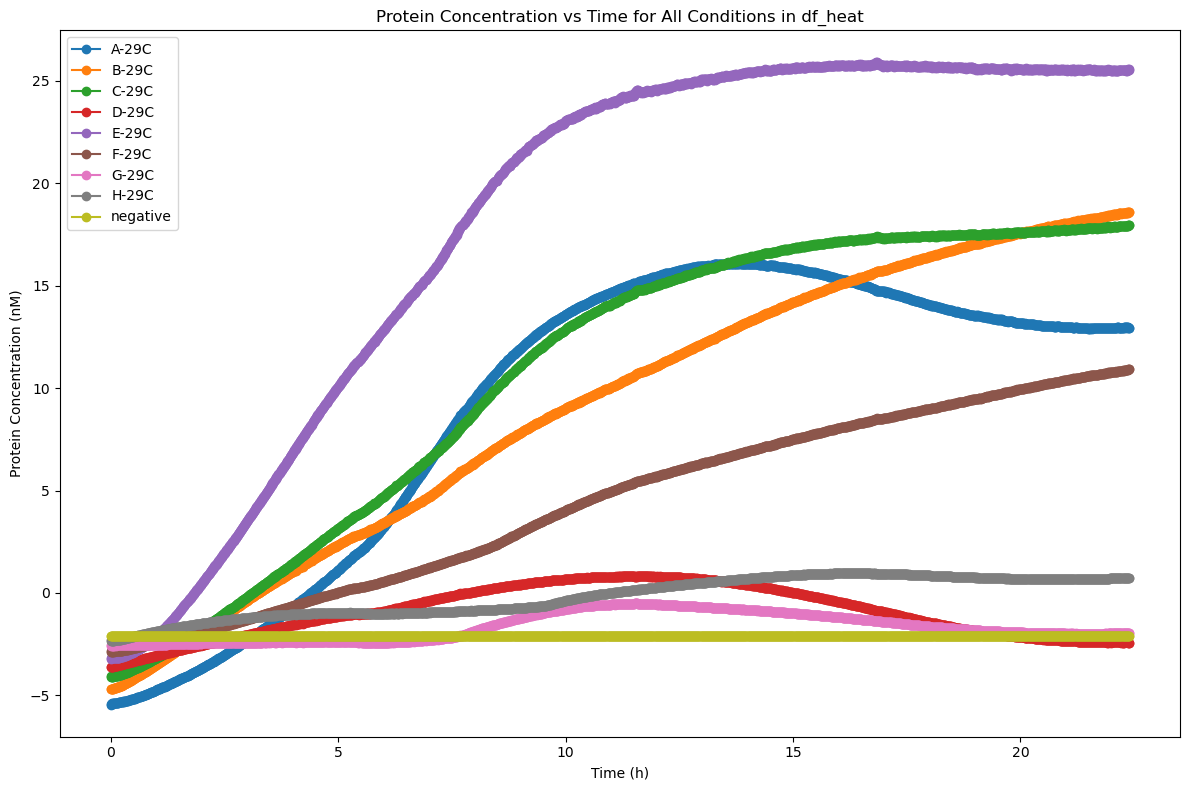

In [312]:
import matplotlib.pyplot as plt

# Get unique conditions from df_heat
conditions = df_heat['condition'].unique()

# Plot each condition
plt.figure(figsize=(12, 8))
for condition in conditions:
    condition_data = df_heat[df_heat['condition'] == condition]
    plt.plot(condition_data['Time_h'], condition_data['Protein Concentration_nM'], marker='o', linestyle='-', label=condition)

plt.xlabel('Time (h)')
plt.ylabel('Protein Concentration (nM)')
plt.title('Protein Concentration vs Time for All Conditions in df_heat')
plt.legend()
plt.tight_layout()
plt.show()


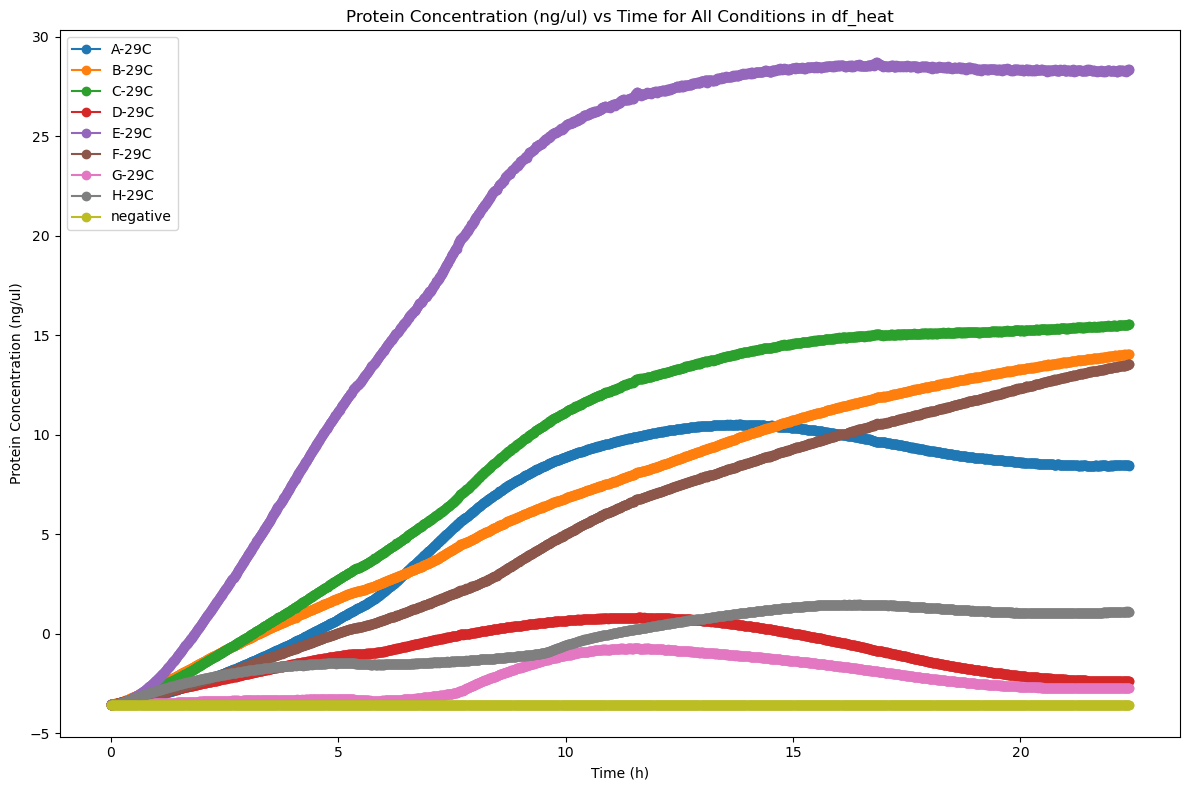

In [313]:
import matplotlib.pyplot as plt

# Get unique conditions from df_heat
conditions = df_heat['condition'].unique()

# Plot each condition
plt.figure(figsize=(12, 8))
for condition in conditions:
    condition_data = df_heat[df_heat['condition'] == condition]
    plt.plot(condition_data['Time_h'], condition_data['Protein Concentration_ng_ul'], marker='o', linestyle='-', label=condition)

plt.xlabel('Time (h)')
plt.ylabel('Protein Concentration (ng/ul)')
plt.title('Protein Concentration (ng/ul) vs Time for All Conditions in df_heat')
plt.legend()
plt.tight_layout()
plt.show()


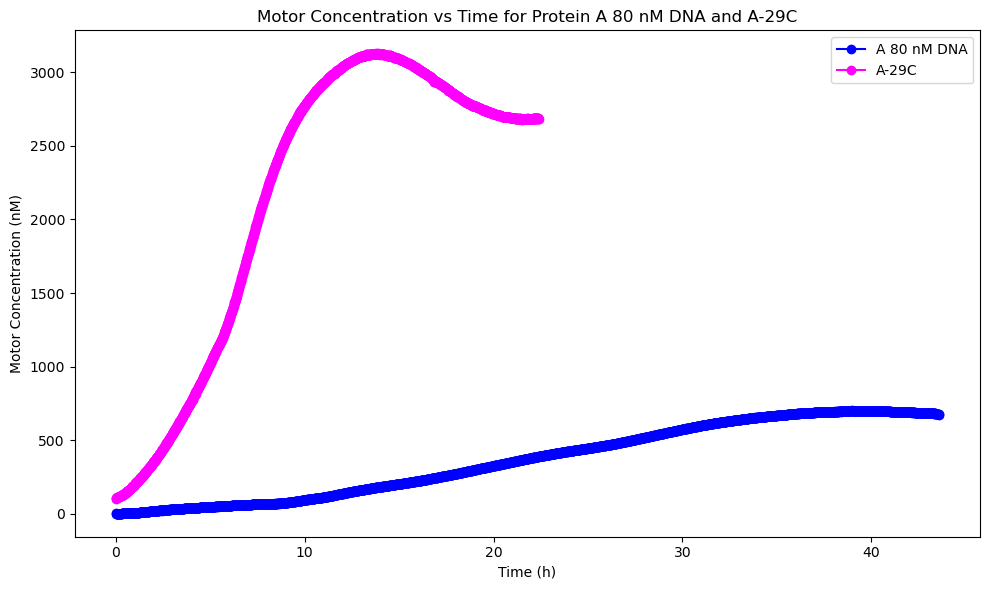

In [222]:
import matplotlib.pyplot as plt

# Filter data for protein A with 80 nM DNA from df
a_80nm_data = df[(df['protein'] == 'A') & (df['DNA nM'] == '80')]

# Filter data for protein A-29C from df_heat
a_29c_data = df_heat[df_heat['protein'] == 'A-29C']

# Plot motor concentration vs time for protein A 80 nM DNA
plt.figure(figsize=(10, 6))
plt.plot(a_80nm_data['Time_h'], a_80nm_data['Protein Concentration_nM'], marker='o', linestyle='-', color='blue', label='A 80 nM DNA')

# Plot motor concentration vs time for protein A-29C
plt.plot(a_29c_data['Time_h'], a_29c_data['Protein Concentration_nM'], marker='o', linestyle='-', color='magenta', label='A-29C')

plt.xlabel('Time (h)')
plt.ylabel('Motor Concentration (nM)')
plt.title('Motor Concentration vs Time for Protein A 80 nM DNA and A-29C')
plt.legend()
plt.tight_layout()
plt.show()


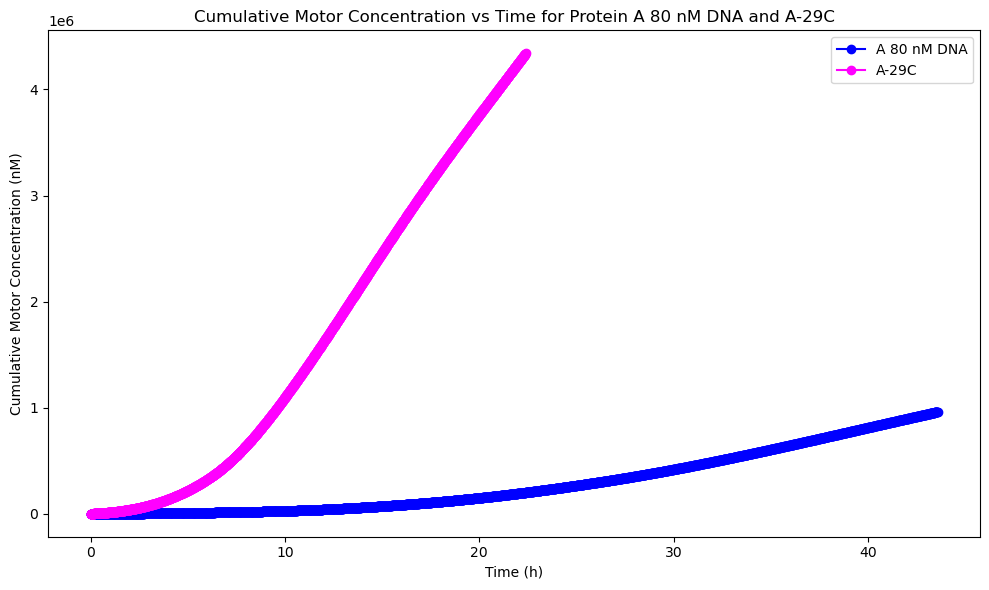

In [223]:
import matplotlib.pyplot as plt

# Filter data for protein A with 80 nM DNA from df
a_80nm_data = df[(df['protein'] == 'A') & (df['DNA nM'] == '80')]

# Filter data for protein A-29C from df_heat
a_29c_data = df_heat[df_heat['protein'] == 'A-29C']

# Calculate cumulative motor concentration for protein A 80 nM DNA
a_80nm_data['Cumulative_Protein_Concentration_nM'] = a_80nm_data['Protein Concentration_nM'].cumsum()

# Calculate cumulative motor concentration for protein A-29C
a_29c_data['Cumulative_Protein_Concentration_nM'] = a_29c_data['Protein Concentration_nM'].cumsum()

# Plot cumulative motor concentration vs time for protein A 80 nM DNA
plt.figure(figsize=(10, 6))
plt.plot(a_80nm_data['Time_h'], a_80nm_data['Cumulative_Protein_Concentration_nM'], marker='o', linestyle='-', color='blue', label='A 80 nM DNA')

# Plot cumulative motor concentration vs time for protein A-29C
plt.plot(a_29c_data['Time_h'], a_29c_data['Cumulative_Protein_Concentration_nM'], marker='o', linestyle='-', color='magenta', label='A-29C')

plt.xlabel('Time (h)')
plt.ylabel('Cumulative Motor Concentration (nM)')
plt.title('Cumulative Motor Concentration vs Time for Protein A 80 nM DNA and A-29C')
plt.legend()
plt.tight_layout()
plt.show()


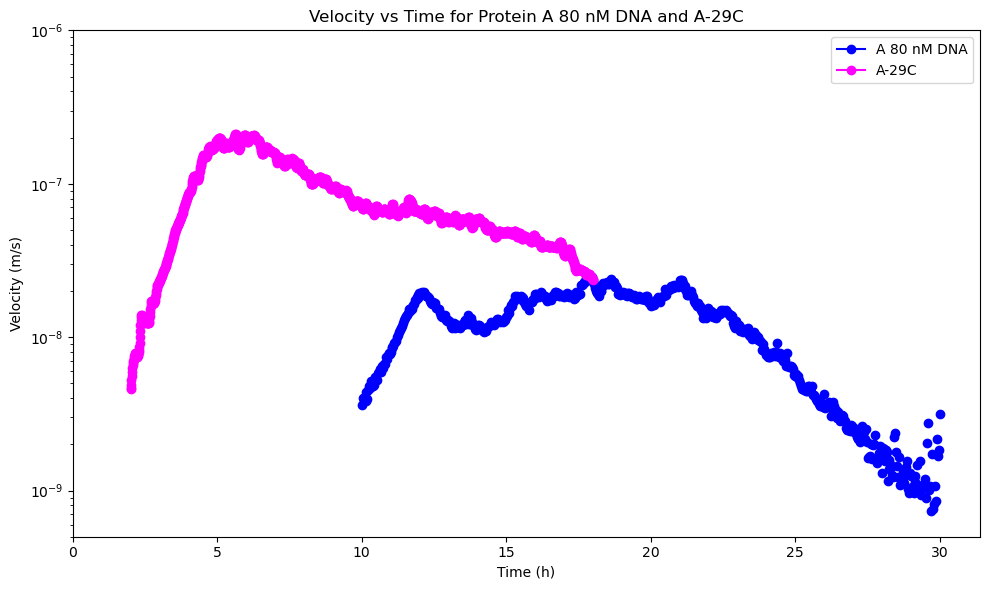

In [224]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Filter data for protein A with 80 nM DNA from df and time between 10h and 30h
a_80nm_data = df[(df['protein'] == 'A') & (df['DNA nM'] == '80') & (df['Time_h'] >= 10) & (df['Time_h'] <= 30)]

# Filter data for protein A-29C from df_heat and time between 2h and 18h
a_29c_data = df_heat[(df_heat['protein'] == 'A-29C') & (df_heat['Time_h'] >= 2) & (df_heat['Time_h'] <= 18)]

# Apply Gaussian filter to smooth the velocity data
a_80nm_velocity_smoothed = gaussian_filter1d(a_80nm_data['velocity magnitude [m/s]_mean'], sigma=0.1)
a_29c_velocity_smoothed = gaussian_filter1d(a_29c_data['velocity magnitude [m/s]_mean'], sigma=3)

# Plot velocity vs time for protein A 80 nM DNA
plt.figure(figsize=(10, 6))
plt.plot(a_80nm_data['Time_h'], a_80nm_velocity_smoothed, marker='o', linestyle='-', color='blue', label='A 80 nM DNA')

# Plot velocity vs time for protein A-29C
plt.plot(a_29c_data['Time_h'], a_29c_velocity_smoothed, marker='o', linestyle='-', color='magenta', label='A-29C')

plt.xlabel('Time (h)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time for Protein A 80 nM DNA and A-29C')
plt.yscale('log')
plt.ylim(5e-10, 1e-6)
plt.xlim(left=0)  # Ensure the tick for 0 is included
plt.legend()
plt.tight_layout()
plt.show()


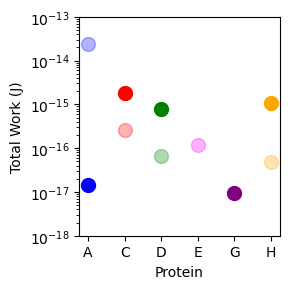

In [225]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df and df_heat are already defined and loaded with data
# Example: df = pd.read_csv('your_data.csv')

# Define proteins and their colors
proteins = ['A', 'C', 'D', 'E', 'G', 'H']
colors = ['blue', 'red', 'green', 'magenta', 'purple', 'orange']

# Initialize lists to store total work for each protein
total_work_df = []
total_work_df_heat = []

# Calculate total work for each protein from df and df_heat
for protein in proteins:
    # Filter data for protein with 80 nM DNA from df
    protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80')].dropna(subset=['power [W]_mean', 'Time_h'])
    # Calculate total work as the sum of power over time intervals
    total_work = protein_data['power [W]_mean'].sum() 
    total_work_df.append(total_work)
    
    # Filter data for protein-29C from df_heat
    protein_29c_data = df_heat[(df_heat['protein'] == f'{protein}-29C')].dropna(subset=['power [W]_mean', 'Time_h'])
    # Calculate total work as the sum of power over time intervals
    total_work_29c = protein_29c_data['power [W]_mean'].sum() 
    total_work_df_heat.append(total_work_29c)

# Plot total work for each protein
plt.figure(figsize=(3, 3))
for i, protein in enumerate(proteins):
    # Plot total work for df with larger dots
    plt.scatter(protein, total_work_df[i], color=colors[i], s=100, label=f'{protein} 80 nM DNA')
    # Plot total work for df_heat with transparency and larger dots
    plt.scatter(protein, total_work_df_heat[i], color=colors[i], alpha=0.3, s=100, label=f'{protein}-29C')

plt.xlabel('Protein')
plt.ylabel('Total Work (J)')
# plt.title('Total Work for Proteins A, C, D, E, G, and H with 80 nM DNA and 29C Variants')
plt.yscale('log')  # Set y-axis to log scale
# set limit from 1e-18 to 1e-13
plt.ylim(1e-18, 1e-13)
# plt.legend()
plt.tight_layout()

# Save the plot as an SVG file
plt.savefig('../../../../Downloads/total_work_proteins.svg', format='svg')

plt.show()

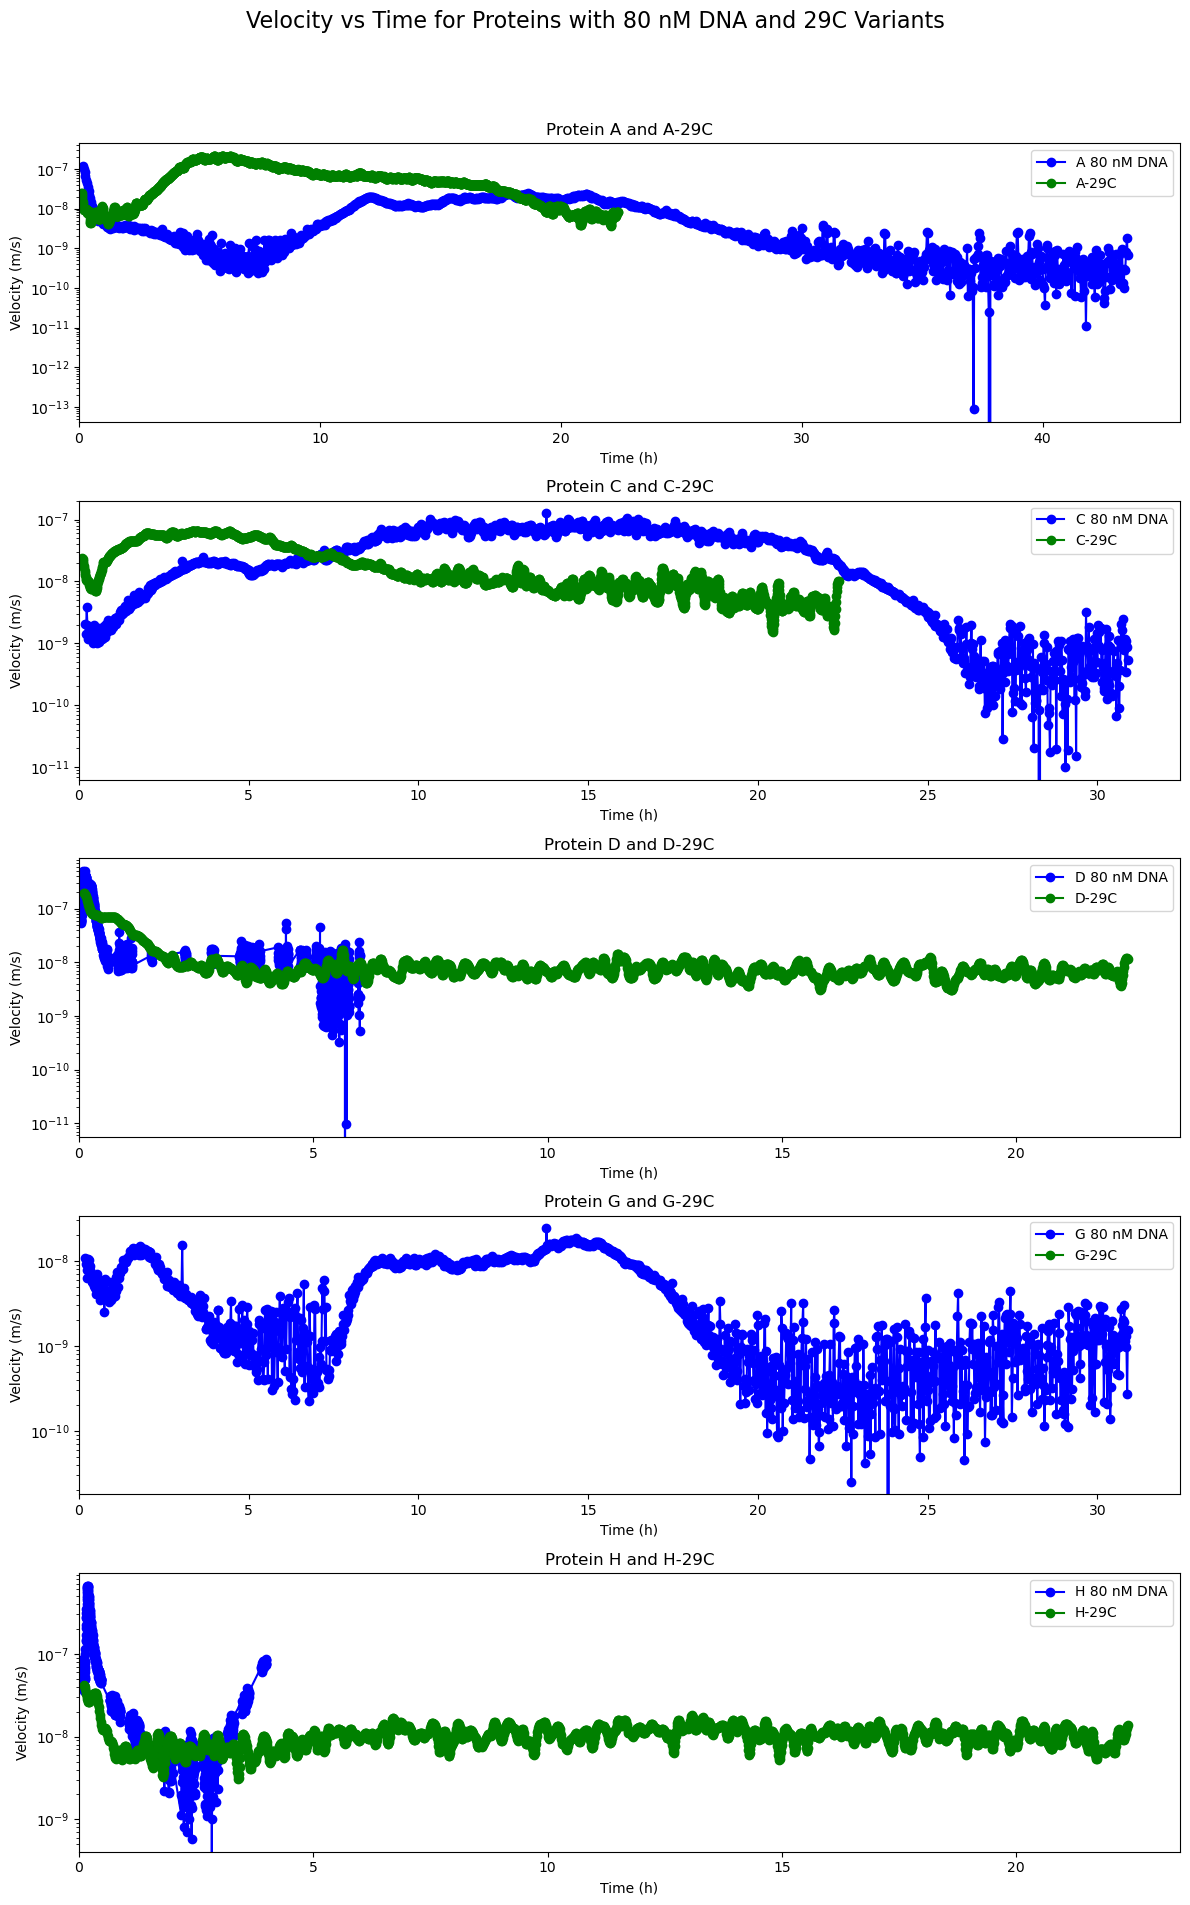

In [226]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Define proteins to compare
proteins = ['A', 'C', 'D', 'G', 'H']
proteins_29c = ['A-29C', 'C-29C', 'D-29C', 'G-29C', 'H-29C']

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 20))
fig.suptitle('Velocity vs Time for Proteins with 80 nM DNA and 29C Variants', fontsize=16)

# Iterate over proteins and plot
for i, (protein, protein_29c) in enumerate(zip(proteins, proteins_29c)):
    # Filter data for protein with 80 nM DNA from df and drop NaNs
    protein_data = df[(df['protein'] == protein) & (df['DNA nM'] == '80')].dropna()
    # Filter data for protein-29C from df_heat and drop NaNs
    protein_29c_data = df_heat[(df_heat['protein'] == protein_29c)].dropna()
    
    # Apply Gaussian filter to smooth the velocity data
    protein_velocity_smoothed = gaussian_filter1d(protein_data['velocity magnitude [m/s]_mean'], sigma=0.1)
    protein_29c_velocity_smoothed = gaussian_filter1d(protein_29c_data['velocity magnitude [m/s]_mean'], sigma=3)
    
    # Plot velocity vs time for both protein with 80 nM DNA and protein-29C in the same plot
    axes[i].plot(protein_data['Time_h'], protein_velocity_smoothed, marker='o', linestyle='-', color='blue', label=f'{protein} 80 nM DNA')
    axes[i].plot(protein_29c_data['Time_h'], protein_29c_velocity_smoothed, marker='o', linestyle='-', color='green', label=f'{protein_29c}')
    axes[i].set_title(f'Protein {protein} and {protein_29c}')
    axes[i].set_xlabel('Time (h)')
    axes[i].set_ylabel('Velocity (m/s)')
    axes[i].set_yscale('log')
    axes[i].set_xlim(left=0)
    axes[i].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


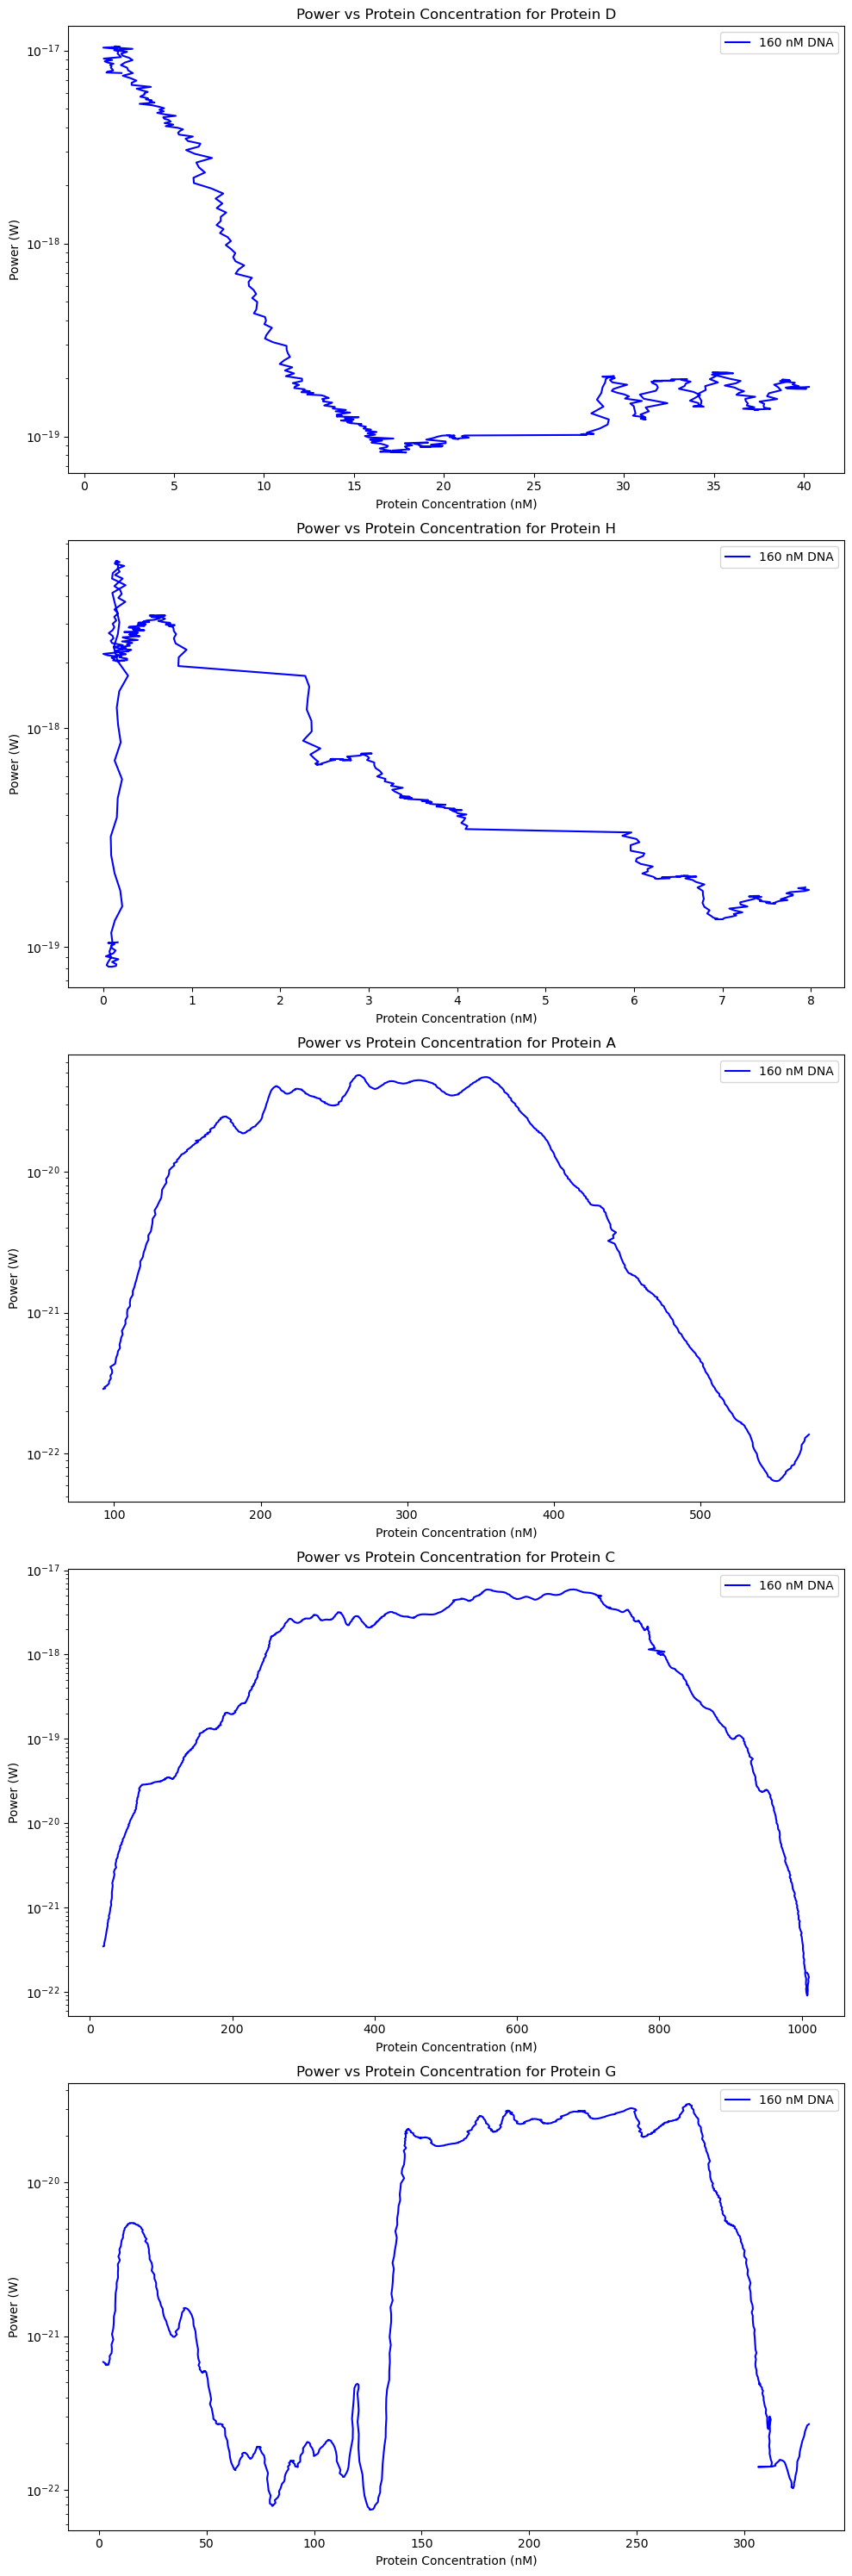

In [134]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage import gaussian_filter1d

# Define the proteins to analyze
proteins = ['D', 'H', 'A', 'C', 'G']

# Create 5 subplots for each protein
fig, axs = plt.subplots(5, 1, figsize=(10, 30))

# Iterate over each protein and create a subplot
for i, protein in enumerate(proteins):
    ax = axs[i]
    
    # Filter data for the current protein, specific time range, and drop NaN values in the power data
    if protein == 'D' or protein == 'H':
        protein_data = df[(df['protein'] == protein) & (df['time (h)'] >= 0.08) & (df['time (h)'] <= 1.5)].dropna(subset=['power [W]_mean'])
    elif protein == 'A':
        protein_data = df[(df['protein'] == protein) & (df['time (h)'] >= 10) & (df['time (h)'] <= 30)].dropna(subset=['power [W]_mean'])
    elif protein == 'C':
        protein_data = df[(df['protein'] == protein) & (df['time (h)'] >= 1.5) & (df['time (h)'] <= 26)].dropna(subset=['power [W]_mean'])
    elif protein == 'G':
        protein_data = df[(df['protein'] == protein) & (df['time (h)'] >= 0.6) & (df['time (h)'] <= 20)].dropna(subset=['power [W]_mean'])
    
    # Filter data for only 160 nM DNA concentration
    dna_data = protein_data[protein_data['DNA nM'] == '80']
    # Apply Gaussian filter with sigma=5
    smoothed_power = gaussian_filter1d(dna_data['power [W]_mean'], sigma=5)
    ax.plot(dna_data['Protein Concentration_nM'], smoothed_power, linestyle='-', label='160 nM DNA', color='blue')
    
    ax.set_xlabel('Protein Concentration (nM)')
    ax.set_ylabel('Power (W)')
    ax.set_title(f'Power vs Protein Concentration for Protein {protein}')
    ax.legend()
    ax.set_yscale('log')  # Set y-axis to log scale

plt.tight_layout()
plt.show()


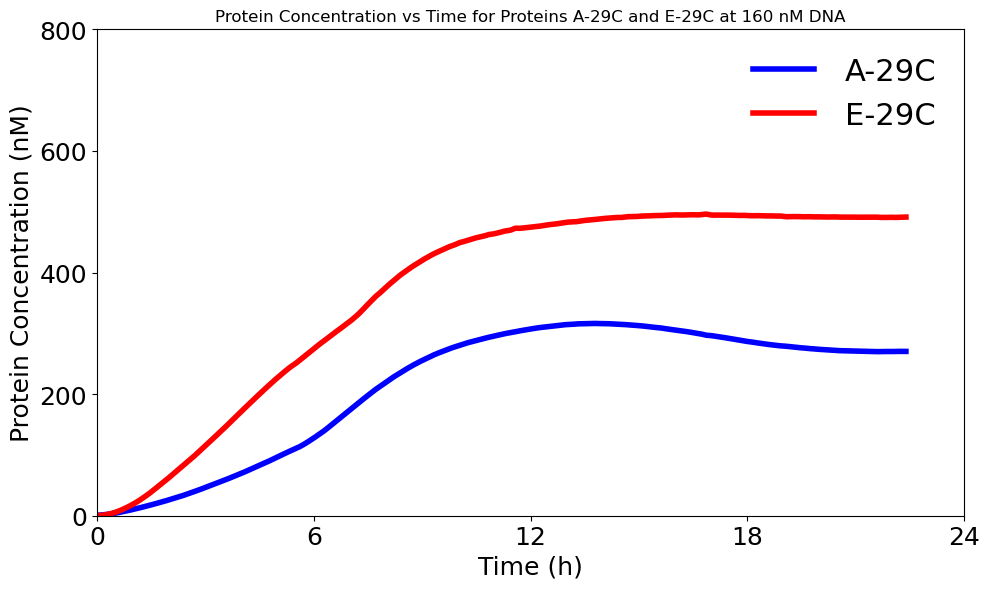

In [185]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Create a new figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))  # Ensure this size is consistent across both plots

# Plot for proteins A-29C and E-29C at 160 nM DNA concentration
# Filter data for protein A-29C from df_heat
protein_data_A_29C = df_heat[(df_heat['protein'] == 'A-29C')]
protein_data_A_29C = protein_data_A_29C.dropna(subset=['Protein Concentration_nM'])
smoothed_concentration_A_29C = gaussian_filter1d(protein_data_A_29C['Protein Concentration_nM'], sigma=5)
ax.plot(protein_data_A_29C['Time_h'], smoothed_concentration_A_29C, linestyle='-', linewidth=4, color='blue', label='A-29C')

# Filter data for protein E-29C from df_heat
protein_data_E_29C = df_heat[(df_heat['protein'] == 'E-29C')]
protein_data_E_29C = protein_data_E_29C.dropna(subset=['Protein Concentration_nM'])
smoothed_concentration_E_29C = gaussian_filter1d(protein_data_E_29C['Protein Concentration_nM'], sigma=5)
ax.plot(protein_data_E_29C['Time_h'], smoothed_concentration_E_29C, linestyle='-', linewidth=4, color='red', label='E-29C')

ax.set_xlabel('Time (h)', fontsize=18)
ax.set_ylabel('Protein Concentration (nM)', fontsize=18)
ax.set_title('Protein Concentration vs Time for Proteins A-29C and E-29C at 160 nM DNA')
ax.set_ylim(0, 800)  # Set y-axis limits from 0 to 800
ax.set_yticks(range(0, 1000, 200))  # Add ticks every 200 nM
ax.set_xlim(0, 24)  # Ensure x-axis starts at 0
ax.set_xticks(range(0, int(df_heat['Time_h'].max()) + 6, 6))  # Set x ticks every 6 hours
ax.tick_params(axis='both', which='major', labelsize=18)
ax.legend(fontsize=22, frameon=False, handletextpad=1, handlelength=2)  # Removed linewidth argument
plt.tight_layout()
plt.savefig('../../../../Downloads/protein_concentration_A-29C_E-29C_160nM_DNA.svg', format='svg')
plt.show()


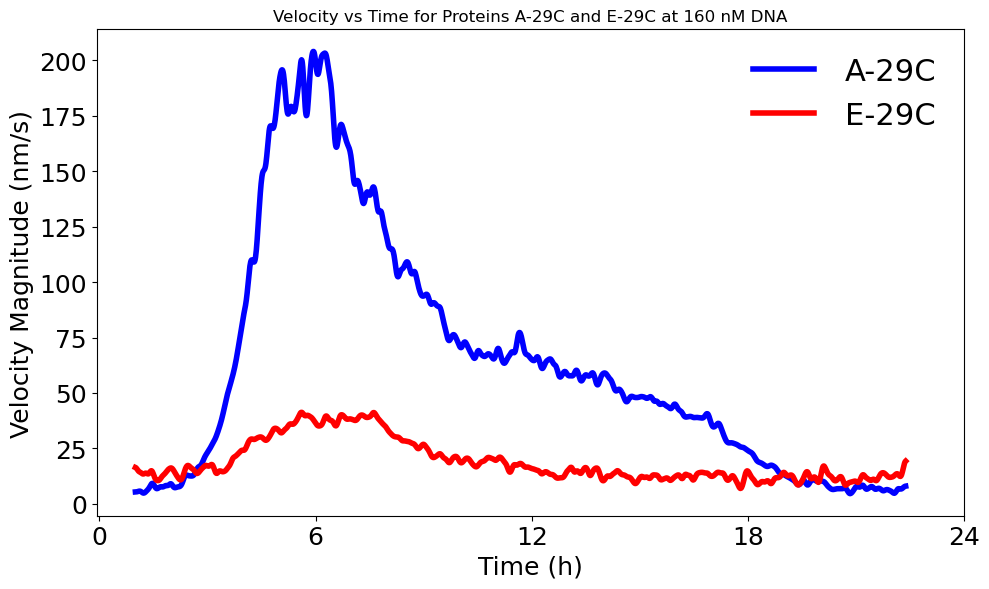

In [181]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Create a new figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))  # Ensure this size is consistent across both plots

# Plot for velocity vs time for proteins A-29C and E-29C
# Filter data for protein A-29C from df_heat
velocity_data_A_29C = df_heat[(df_heat['protein'] == 'A-29C') & (df_heat['Time_h'] >= 1)]
velocity_data_A_29C = velocity_data_A_29C.dropna(subset=['velocity magnitude [m/s]_mean'])
smoothed_velocity_A_29C = gaussian_filter1d(velocity_data_A_29C['velocity magnitude [m/s]_mean'], sigma=5)
ax.plot(velocity_data_A_29C['Time_h'], smoothed_velocity_A_29C * 1e9, linestyle='-', linewidth=4, color='blue', label='A-29C')  # Convert m/s to nm/s

# Filter data for protein E-29C from df_heat
velocity_data_E_29C = df_heat[(df_heat['protein'] == 'E-29C') & (df_heat['Time_h'] >= 1)]
velocity_data_E_29C = velocity_data_E_29C.dropna(subset=['velocity magnitude [m/s]_mean'])
smoothed_velocity_E_29C = gaussian_filter1d(velocity_data_E_29C['velocity magnitude [m/s]_mean'], sigma=5)
ax.plot(velocity_data_E_29C['Time_h'], smoothed_velocity_E_29C * 1e9, linestyle='-', linewidth=4, color='red', label='E-29C')  # Convert m/s to nm/s

ax.set_xlabel('Time (h)', fontsize=18)
ax.set_ylabel('Velocity Magnitude (nm/s)', fontsize=18)  # Update y-axis label to nm/s
ax.set_title('Velocity vs Time for Proteins A-29C and E-29C at 160 nM DNA')
ax.set_xticks(range(0, int(df_heat['Time_h'].max()) + 6, 6))  # Set x ticks every 6 hours
ax.tick_params(axis='both', which='major', labelsize=18)
ax.legend(fontsize=22, frameon=False, handletextpad=1, handlelength=2)  # Removed linewidth argument
plt.tight_layout()
plt.savefig('../../../../Downloads/velocity_A-29C_E-29C_160nM_DNA.svg', format='svg')
plt.show()


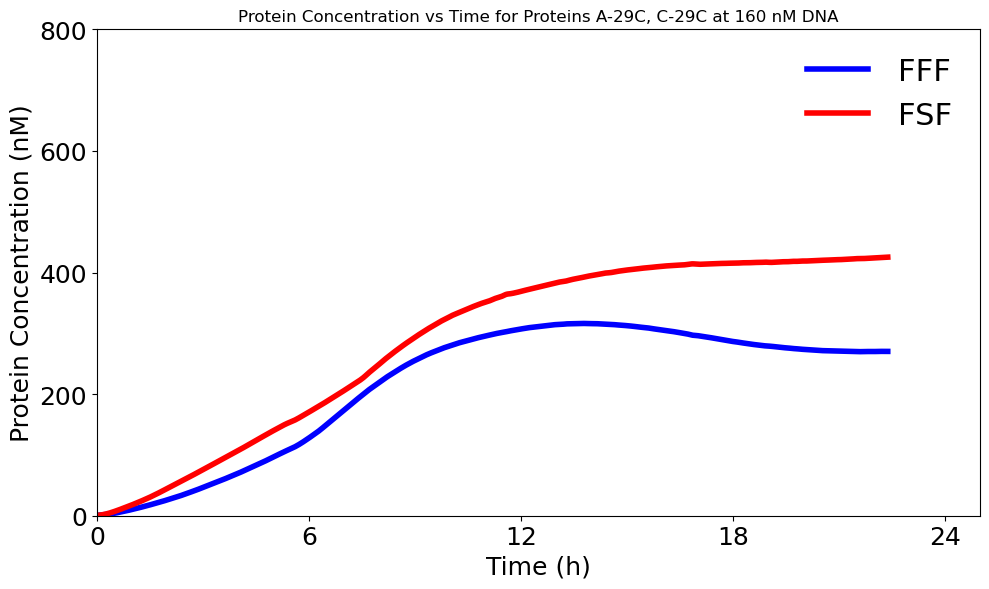

In [147]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Create a new figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))  # Ensure this size is consistent across both plots

# Plot for proteins A-29C and C-29C at 160 nM DNA concentration
for protein in ['A-29C', 'C-29C']:
    # Filter data for the current protein and 160 nM DNA concentration
    protein_data = df_heat[(df_heat['protein'] == protein) ]
    
    # Drop NaN values in the protein concentration data
    protein_data = protein_data.dropna(subset=['Protein Concentration_nM'])
    
    # Apply Gaussian filter with sigma=5 to the protein concentration data
    smoothed_concentration = gaussian_filter1d(protein_data['Protein Concentration_nM'], sigma=5)
    
    # Plot smoothed protein concentration vs time with increased line width
    color = 'blue' if protein == 'A-29C' else 'red'
    label = 'FFF' if color == 'blue' else 'FSF'
    ax.plot(protein_data['Time_h'], smoothed_concentration, linestyle='-', linewidth=4, color=color, label=label)

ax.set_xlabel('Time (h)', fontsize=18)
ax.set_ylabel('Protein Concentration (nM)', fontsize=18)
ax.set_title('Protein Concentration vs Time for Proteins A-29C, C-29C at 160 nM DNA')
ax.set_ylim(0, 800)  # Set y-axis limits from 0 to 800
ax.set_yticks(range(0, 801, 200))  # Add ticks every 200 nM
ax.set_xlim(0, 25)  # Ensure x-axis starts at 0
ax.set_xticks(range(0, int(df_heat['Time_h'].max()) + 3, 6))  # Set x ticks every 6 hours
ax.tick_params(axis='both', which='major', labelsize=18)
ax.legend(fontsize=22, frameon=False, handletextpad=1, handlelength=2)  # Removed linewidth argument
plt.tight_layout()
plt.savefig('../../../../Downloads/protein_concentration_A_C_160nM_DNA.svg', format='svg')
plt.show()
